In [29]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [30]:
df=pd.read_csv('preprocessed_datset.csv')  
df.head()

BQ  ESS        BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0   0   14  29.065927    88.0   174.0  57.5  39.0   95.5    106.5  20.0  1   
1   0    8  26.989619    78.0   170.0  57.0  36.5   90.0    100.0  20.0  1   
2   0   16  23.939481    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3   0   15  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4   0   15  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   

   status  
0       0  
1       0  
2       0  
3       0  
4       0

In [31]:
print ('Rows     : ', df.shape[0]) # helps to show total no.of rows in dataset
print ('Columns  : ', df.shape[1]) # helps to show total no.of columns(features) in dataset
print ('\nFeatures : \n', df.columns.tolist()) # helps to show the features in dataset
print ('\nMissing values :  ', df.isnull().sum().values.sum()) # help to show total no.of missing values in dataset
print ('\nUnique values :  \n', df.nunique()) # helps to show total no.of unique values in each feature of dataset

Rows     :  5208
Columns  :  12

Features : 
 ['BQ', 'ESS', 'BMI', 'Weight', 'Height', 'Head', 'Neck', 'Waist', 'Buttock', 'Age', 'M', 'status']

Missing values :   0

Unique values :  
 BQ            2
ESS          29
BMI        2076
Weight      434
Height      120
Head        113
Neck        166
Waist       256
Buttock     208
Age          63
M             2
status        4
dtype: int64


In [32]:
df.info() # helps to show datatype of ecah feature in dataset
df.isnull().sum() # helps to show total no.of null values of features in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BQ       5208 non-null   int64  
 1   ESS      5208 non-null   int64  
 2   BMI      5208 non-null   float64
 3   Weight   5208 non-null   float64
 4   Height   5208 non-null   float64
 5   Head     5208 non-null   float64
 6   Neck     5208 non-null   float64
 7   Waist    5208 non-null   float64
 8   Buttock  5208 non-null   float64
 9   Age      5208 non-null   float64
 10  M        5208 non-null   int64  
 11  status   5208 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 488.4 KB


BQ         0
ESS        0
BMI        0
Weight     0
Height     0
Head       0
Neck       0
Waist      0
Buttock    0
Age        0
M          0
status     0
dtype: int64

In [33]:
df = df.dropna() # hepls in droppind the null values in datset
df.info()
print ('\nMissing values :  ', df.isnull().sum().values.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5208 entries, 0 to 5207
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BQ       5208 non-null   int64  
 1   ESS      5208 non-null   int64  
 2   BMI      5208 non-null   float64
 3   Weight   5208 non-null   float64
 4   Height   5208 non-null   float64
 5   Head     5208 non-null   float64
 6   Neck     5208 non-null   float64
 7   Waist    5208 non-null   float64
 8   Buttock  5208 non-null   float64
 9   Age      5208 non-null   float64
 10  M        5208 non-null   int64  
 11  status   5208 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 528.9 KB

Missing values :   0


In [34]:
df.describe() # gives statstical data of the dataset

BQ          ESS          BMI       Weight       Height  \
count  5208.000000  5208.000000  5208.000000  5208.000000  5208.000000   
mean      0.228879     9.783794    26.585641    75.417800   168.040995   
std       0.420151     5.794717     5.255564    17.170054     8.154482   
min       0.000000     0.000000    14.765497    37.000000   140.000000   
25%       0.000000     6.000000    23.120624    64.000000   163.000000   
50%       0.000000    10.000000    25.795918    74.000000   169.000000   
75%       0.000000    14.000000    29.000595    85.000000   174.000000   
max       1.000000    48.000000    59.637308   161.300000   198.000000   

              Head         Neck        Waist      Buttock          Age  \
count  5208.000000  5208.000000  5208.000000  5208.000000  5208.000000   
mean     56.473109    37.681834    91.126517   100.827016    45.373771   
std       2.083129     4.154456    13.571392     9.546028    13.099994   
min      47.000000    26.000000    56.000000    70.000000    20.000000   
25%      55.000000    35.000000    83.000000    95.000000    35.000000   
50%      56.500000    37.500000    90.000000    99.500000    44.500000   
75%      58.000000    40.000000    98.500000   105.000000    55.000000   
max      66.000000    57.000000   156.000000   149.500000    80.000000   

                 M       status  
count  5208.000000  5208.000000  
mean      0.762673     1.329685  
std       0.425485     1.486572  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     3.000000  
max       1.000000     3.000000

0    2884
3    2294
1      17
2      13
Name: status, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

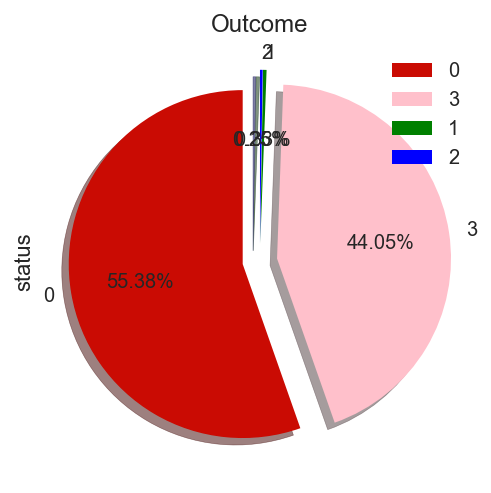

In [35]:
print(df.status.value_counts())
color=['r',"pink","green","blue"]
df['status'].value_counts().plot.pie(colors=color,startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%').set_title('Outcome')
plt.legend()
plt.show

In [36]:
df.head()

BQ  ESS        BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0   0   14  29.065927    88.0   174.0  57.5  39.0   95.5    106.5  20.0  1   
1   0    8  26.989619    78.0   170.0  57.0  36.5   90.0    100.0  20.0  1   
2   0   16  23.939481    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3   0   15  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4   0   15  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   

   status  
0       0  
1       0  
2       0  
3       0  
4       0

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:11]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

      Specs        Score
3    Weight  4771.473710
7     Waist  3199.638330
2       BMI  1189.204789
8   Buttock   809.847215
1       ESS   732.408253
6      Neck   665.322042
9       Age   390.301311
10        M   137.170498
4    Height    80.044040
5      Head    29.100049
0        BQ    10.907233


[0.01766328 0.07449477 0.12327603 0.11055875 0.07278464 0.07090799
 0.10953486 0.17220817 0.09230936 0.09270702 0.06355514]


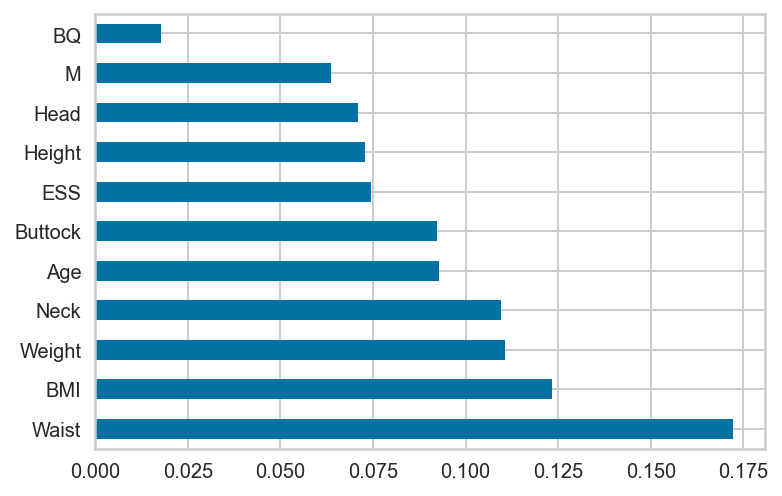

In [38]:
X = df.iloc[:,0:11]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#from sklearn.ensemble import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [39]:
X = df.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = df['status']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (4166, 11)
y_train (4166,)
X_test (1042, 11)
y_test (1042,)


In [40]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)
  #precision    = precision_score(y_test, y_pred1)
 # recall       = recall_score(y_test, y_pred1)
 # f1score      = f1_score(y_test, y_pred1) 
 # rocauc       = roc_auc_score(y_test, y_pred1)
  #logloss      = log_loss(y_test, y_pred1)
  accuracy     = accuracy_score(y_test, y_pred1)
  classification=classification_report(y_test,y_pred1)
  confusion    = confusion_matrix(y_test, y_pred1)
  df_model = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                            'classification':[classification],
                             #'precision'    : [precision],
                             #'recall'       : [recall],
                             #'f1score'      : [f1score],
                             #'rocauc'       : [rocauc],
                            # 'logloss'      : [logloss],
                             'timetaken'    : [time2],
                            'confusionmatrix' : [confusion]
                            
                                }) 
  return df_model

In [41]:
%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier(random_state=0)
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model1 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model1.timetaken[0] = time.time() - time2
print("Random Forest")
print(base_model.get_params())

model1

base model
Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Wall time: 461 ms


model  accuracy                                     classification  \
0  RandomForest  0.783109                precision    recall  f1-score   ...   

   timetaken                                    confusionmatrix  
0   0.461058  [[489, 0, 0, 103], [4, 1, 0, 1], [3, 0, 0, 0],...

In [42]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model1 = ExtraTreesClassifier(random_state=0)
base_model1.fit(X_train, y_train)
model2 = evaluate(base_model1,  X_test,  y_test, 'Extra Tree')
model2.timetaken[0] = time.time() - time2
print("Extra Tree")
print(base_model1.get_params())

base model
Extra Tree
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Wall time: 350 ms


In [43]:
%%time
time2=time.time()
print("base model")
base_model2 = LogisticRegression(random_state=0)
base_model2.fit(X_train, y_train)
model3 = evaluate(base_model2,  X_test,  y_test, 'Logistic Regression')
model3.timetaken[0] = time.time() - time2
print("Logoistic Regression")
print(base_model2.get_params())

base model
Logoistic Regression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Wall time: 143 ms


In [44]:
%%time
time2=time.time()
print("base model")
base_model3 = KNeighborsClassifier()
base_model3.fit(X_train, y_train)
model4 = evaluate(base_model3,  X_test,  y_test, 'KNN')
model4.timetaken[0] = time.time() - time2
print("KNN")
print(base_model3.get_params())
(model4)

base model
KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Wall time: 56.2 ms


model  accuracy                                     classification  \
0   KNN  0.742802                precision    recall  f1-score   ...   

   timetaken                                    confusionmatrix  
0     0.0481  [[450, 0, 0, 142], [5, 0, 0, 1], [3, 0, 0, 0],...

In [45]:
%%time
time2=time.time()
print("base model")
base_model4 = LinearSVC(random_state=0)
base_model4.fit(X_train, y_train)
model5 = evaluate(base_model4,  X_test,  y_test, 'LinearSVC')
model5.timetaken[0] = time.time() - time2
print("LinearSVC")
print(base_model4.get_params())

base model
LinearSVC
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}
Wall time: 478 ms


In [46]:
%%time
time2=time.time()
print("base model")
base_model5 = GaussianNB()
base_model5.fit(X_train, y_train)
model6 = evaluate(base_model5,  X_test,  y_test, 'GaussianNB')
model6.timetaken[0] = time.time() - time2
print("GaussianNB")
print(base_model5.get_params())

base model
GaussianNB
{'priors': None, 'var_smoothing': 1e-09}
Wall time: 9.21 ms


In [47]:
%%time
time2=time.time()
print("base model")
base_model6=SVC(random_state=0)
base_model6.fit(X_train, y_train)
model7 = evaluate(base_model6,  X_test,  y_test, 'SVC')
model7.timetaken[0] = time.time() - time2
print("SVC")
print(base_model6.get_params())

base model
SVC
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Wall time: 538 ms


In [48]:
%%time
time2=time.time()
print("base model")
base_model7=DecisionTreeClassifier(random_state=0)
base_model7.fit(X_train, y_train)
model8 = evaluate(base_model7,  X_test,  y_test, 'Decision Tree')
model8.timetaken[0] = time.time() - time2
print("Decision Tree")
print(base_model7.get_params())


base model
Decision Tree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
Wall time: 22.3 ms


In [49]:
df_base= pd.concat([model1,model2,model3,model4,model5,model6,model7,model8],axis = 0).reset_index()
df_base.drop('index', axis=1, inplace=True)
df_base

model  accuracy  \
0         RandomForest  0.783109   
1           Extra Tree  0.782150   
2  Logistic Regression  0.740883   
3                  KNN  0.742802   
4            LinearSVC  0.728407   
5           GaussianNB  0.726488   
6                  SVC  0.752399   
7        Decision Tree  0.726488   

                                      classification  timetaken  \
0                precision    recall  f1-score   ...   0.461058   
1                precision    recall  f1-score   ...   0.349618   
2                precision    recall  f1-score   ...   0.142867   
3                precision    recall  f1-score   ...   0.048100   
4                precision    recall  f1-score   ...   0.478394   
5                precision    recall  f1-score   ...   0.009208   
6                precision    recall  f1-score   ...   0.538304   
7                precision    recall  f1-score   ...   0.022310   

                                     confusionmatrix  
0  [[489, 0, 0, 103], [4, 1, 0, 1], [3, 0, 0, 0],...  
1  [[493, 0, 0, 99], [4, 1, 0, 1], [3, 0, 0, 0], ...  
2  [[456, 0, 0, 136], [5, 0, 0, 1], [3, 0, 0, 0],...  
3  [[450, 0, 0, 142], [5, 0, 0, 1], [3, 0, 0, 0],...  
4  [[380, 0, 0, 212], [5, 0, 0, 1], [3, 0, 0, 0],...  
5  [[438, 0, 0, 154], [5, 0, 0, 1], [3, 0, 0, 0],...  
6  [[463, 0, 0, 129], [5, 0, 0, 1], [3, 0, 0, 0],...  
7  [[451, 1, 1, 139], [3, 1, 0, 2], [2, 0, 0, 1],...

In [50]:
df_base['confusionmatrix']
df_base.to_csv("D:\MAJOR PROJECT\datasets\imbalanced_data_performance_metrics.csv")

In [51]:
# libraries 
#!pip install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [56]:
classes = ["Normal", "Mild","Moderate","Severe"]
classes

['Normal', 'Mild', 'Moderate', 'Severe']

In [57]:
classifiers=[
DecisionTreeClassifier(random_state=0),
SVC(random_state=0),
LinearSVC(random_state=0),
GaussianNB(),
KNeighborsClassifier(),
LogisticRegression(random_state=0),
RandomForestClassifier(random_state=0),
ExtraTreesClassifier(random_state=0)]


In [58]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        visualizer.score(X_test, y_test)
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test,  x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


In [59]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

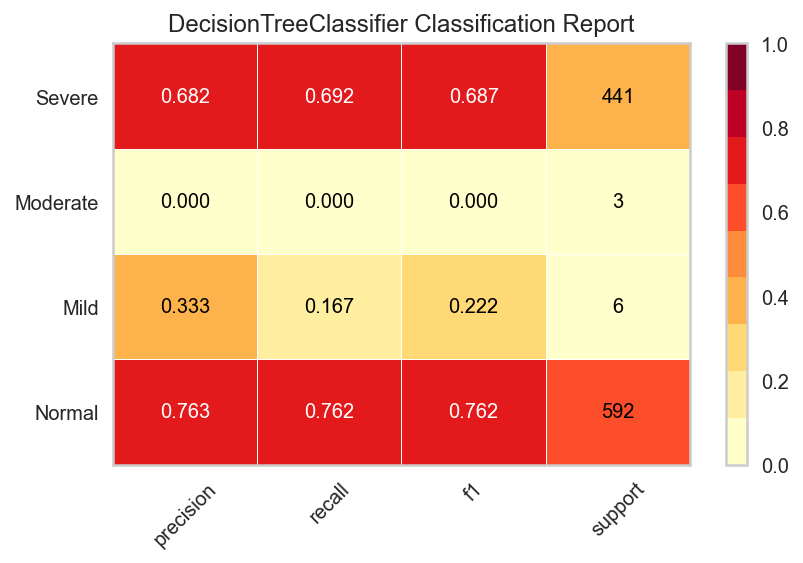

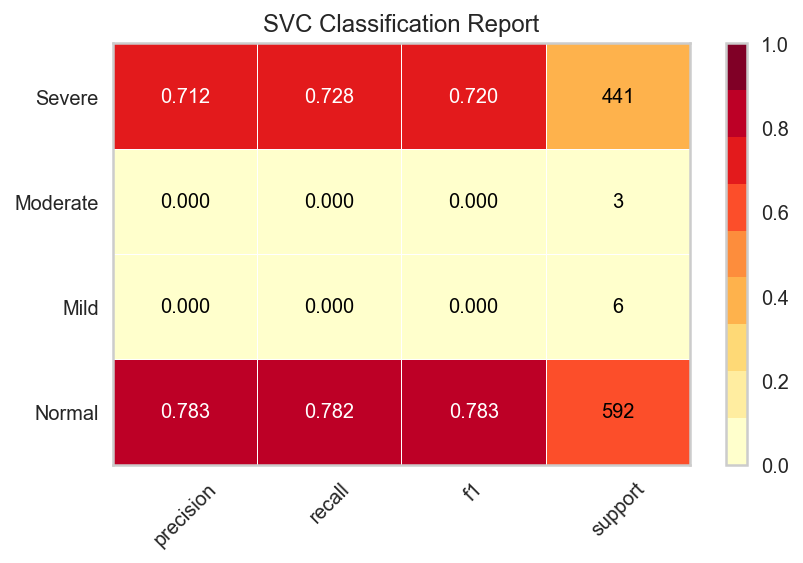

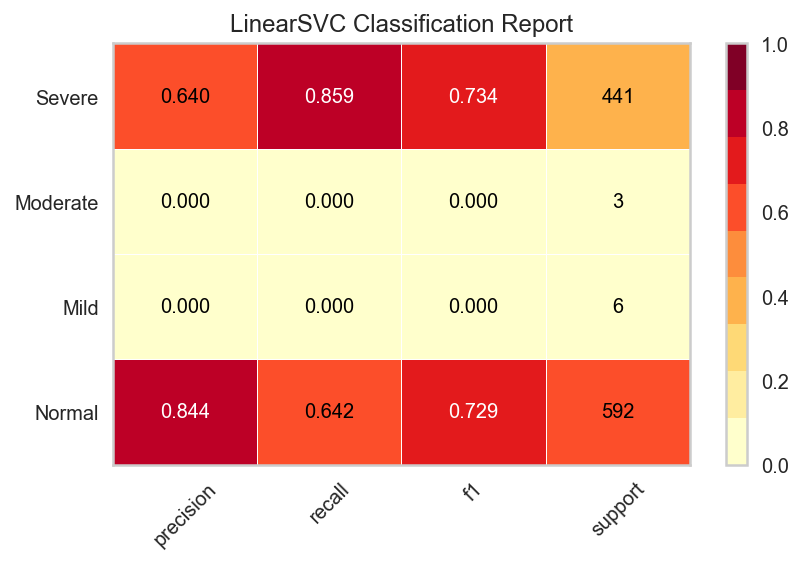

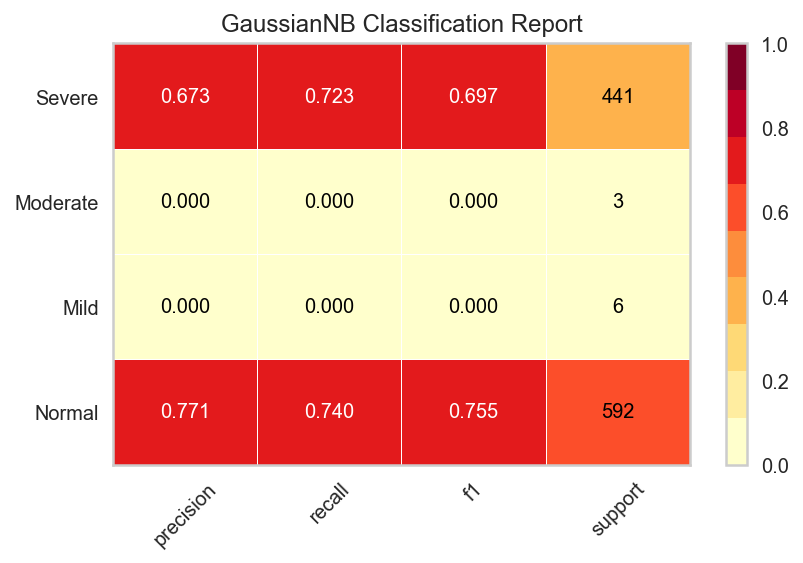

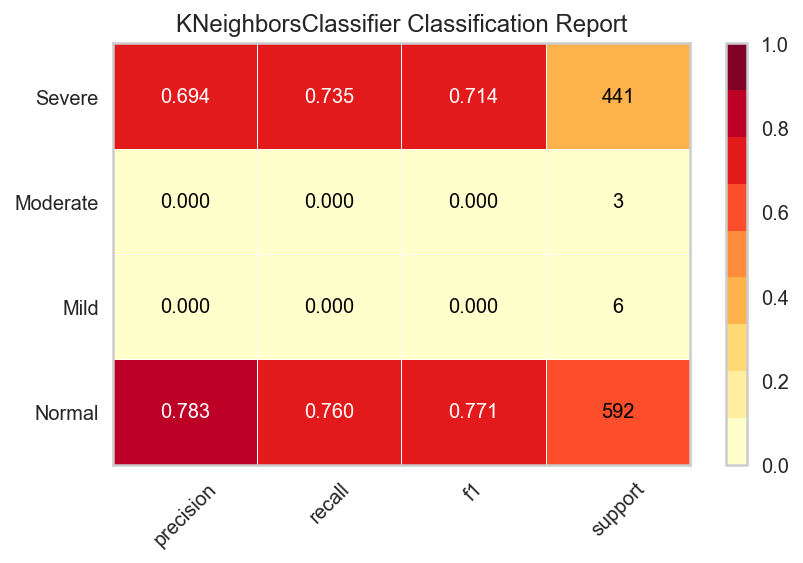

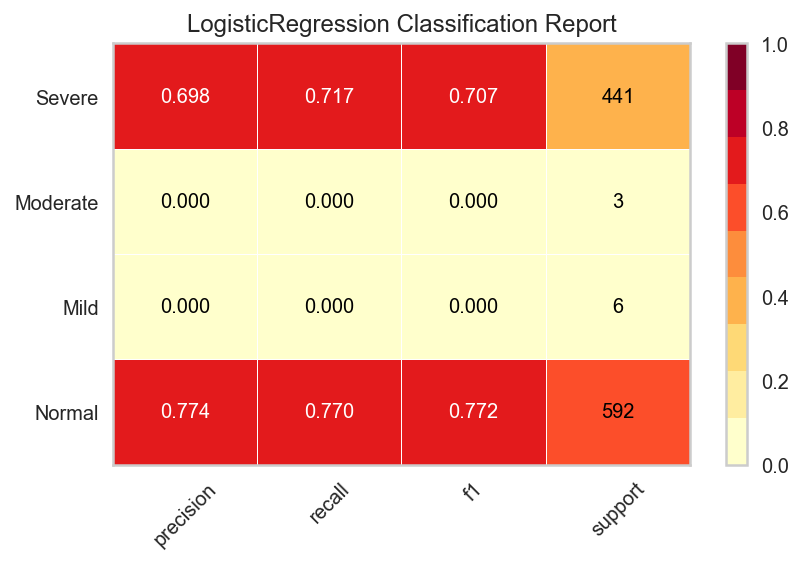

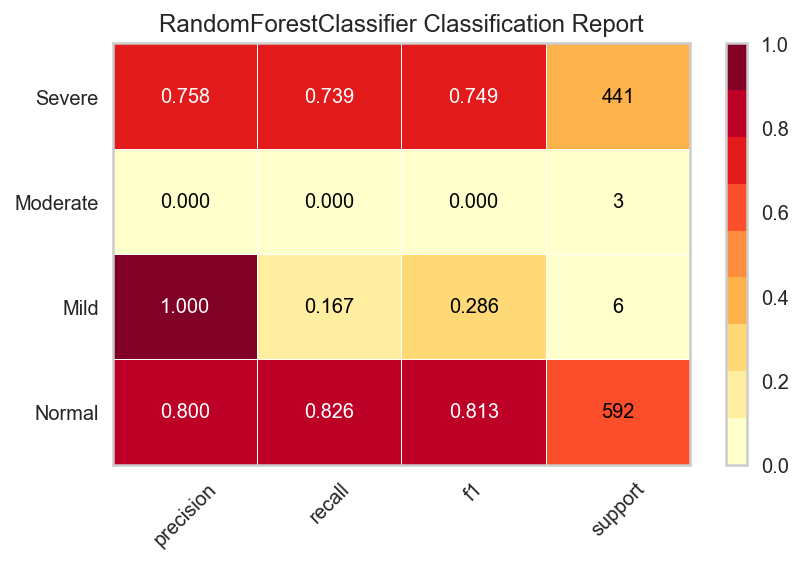

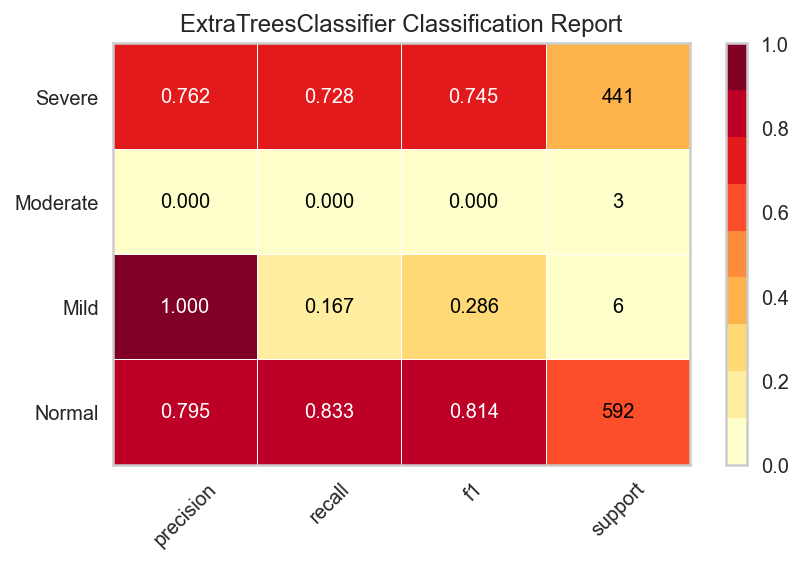

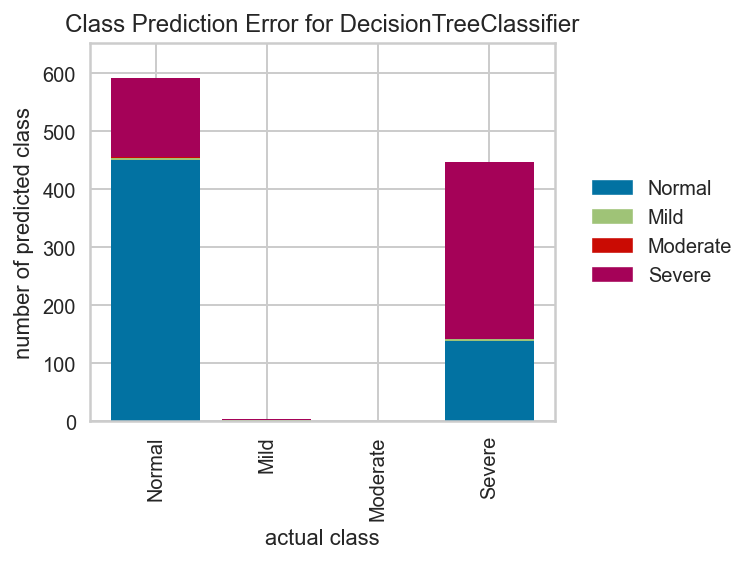

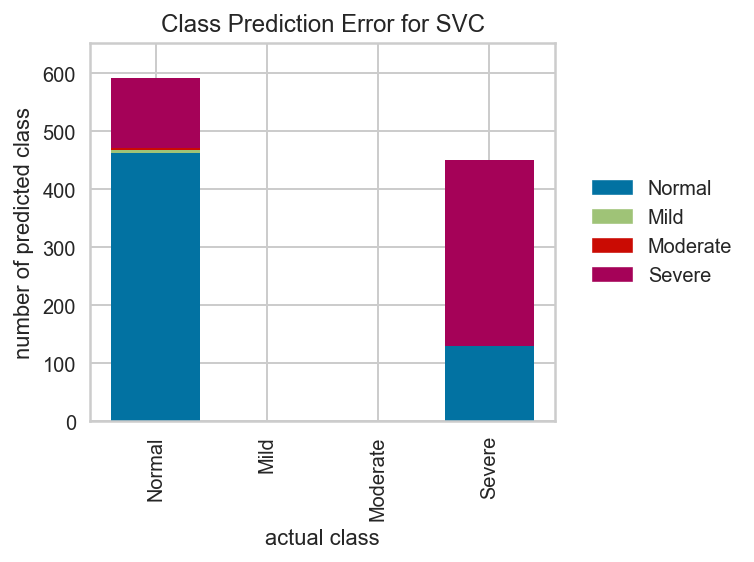

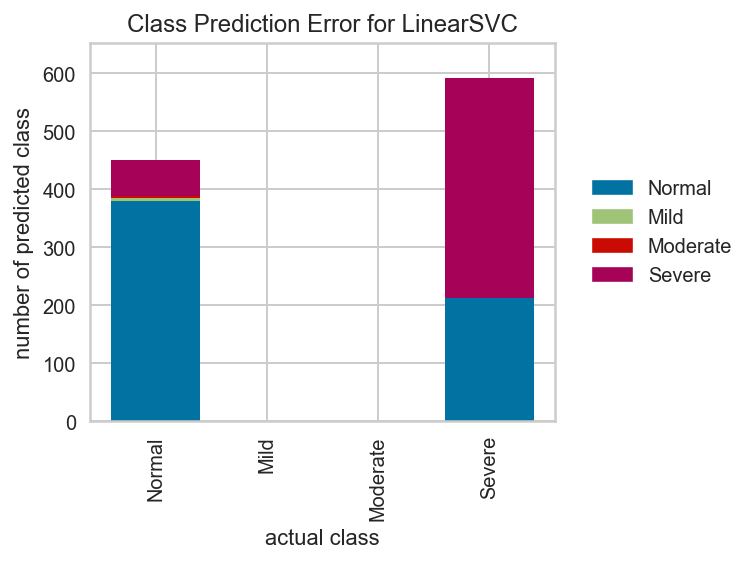

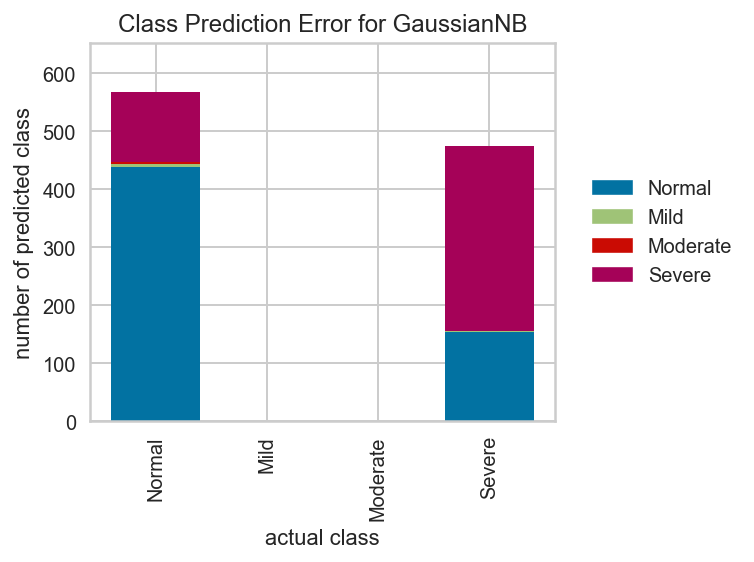

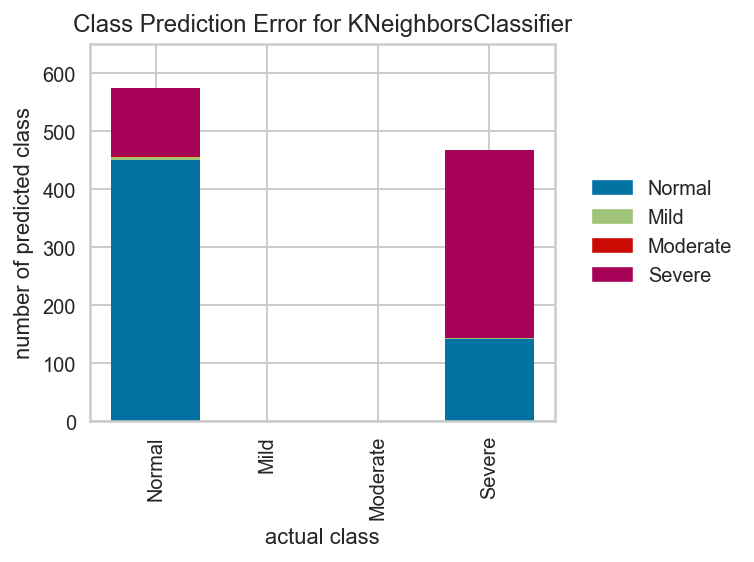

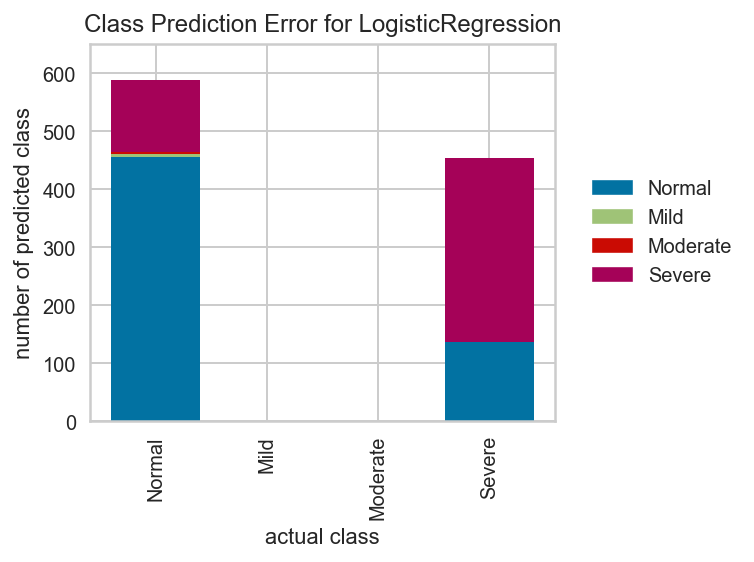

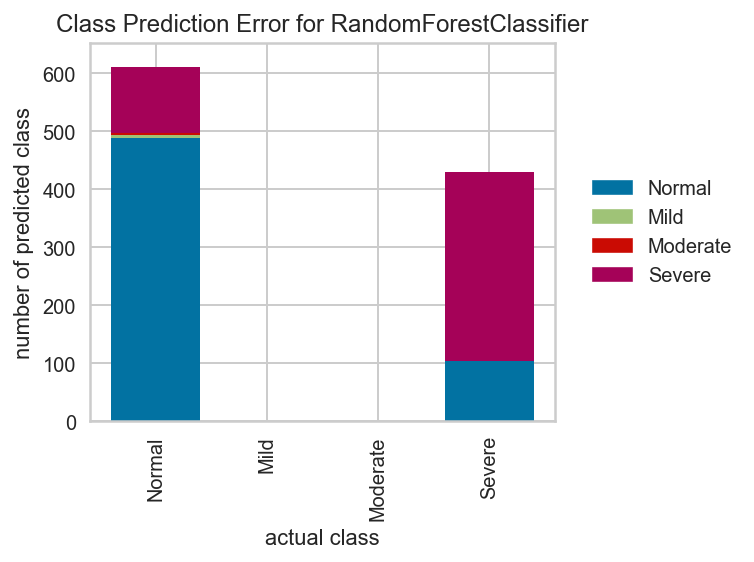

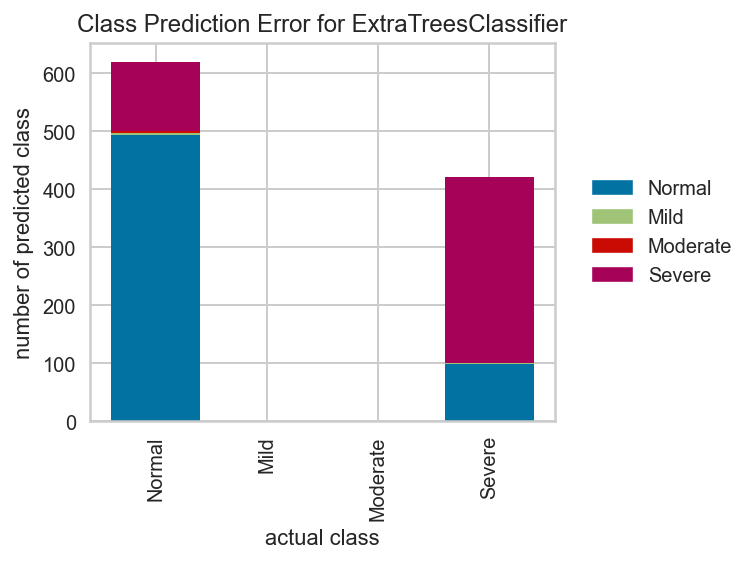

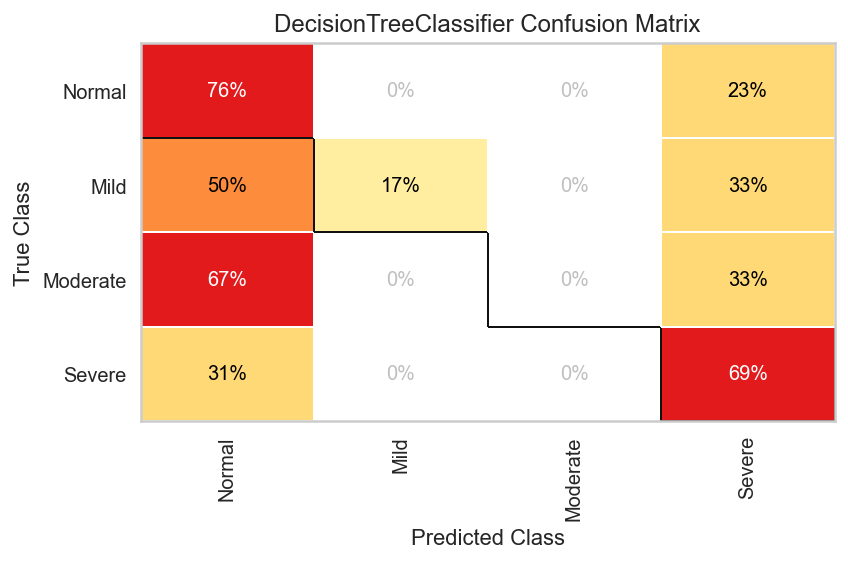

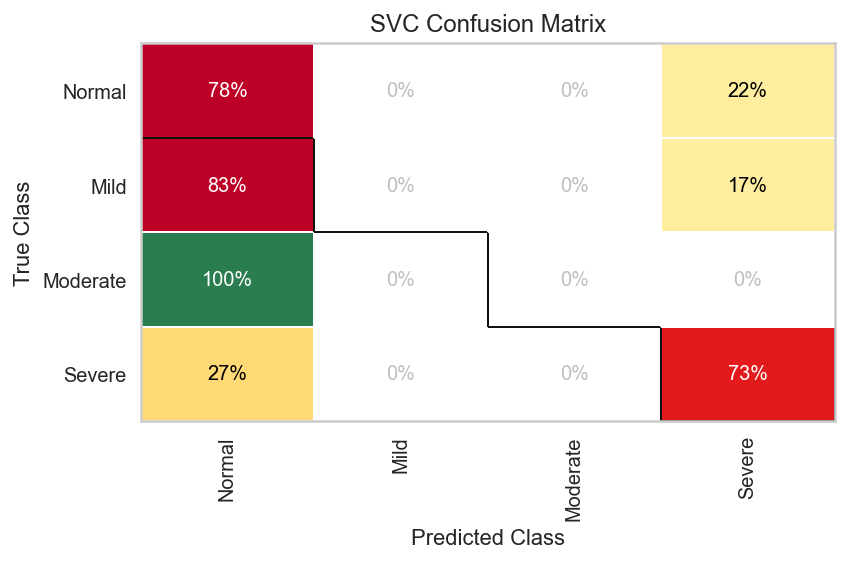

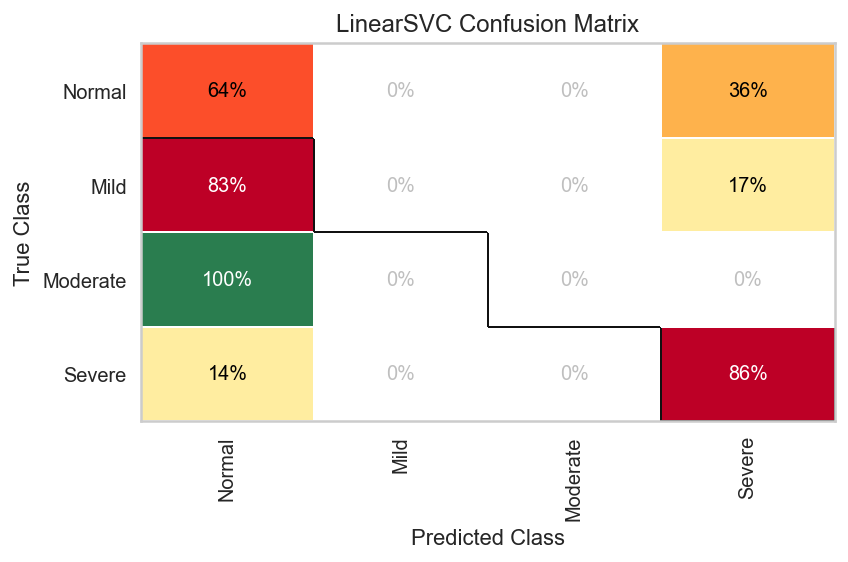

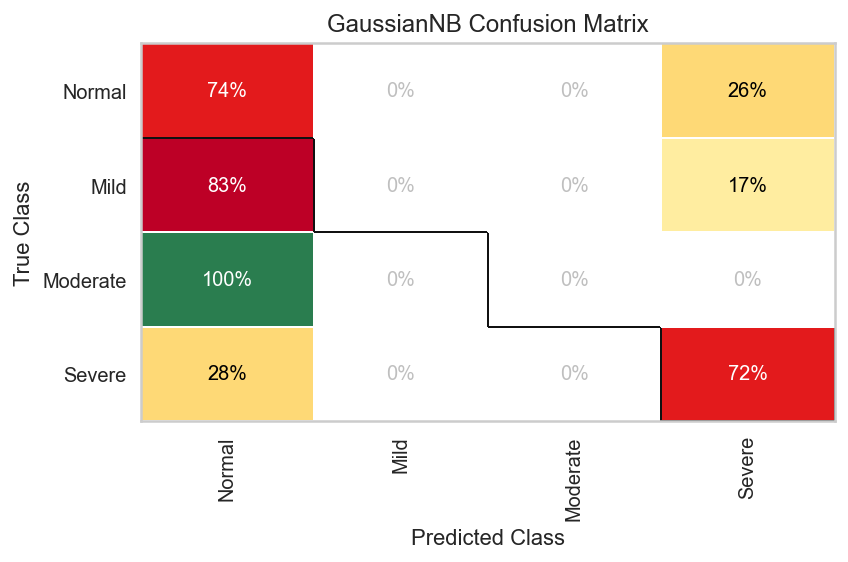

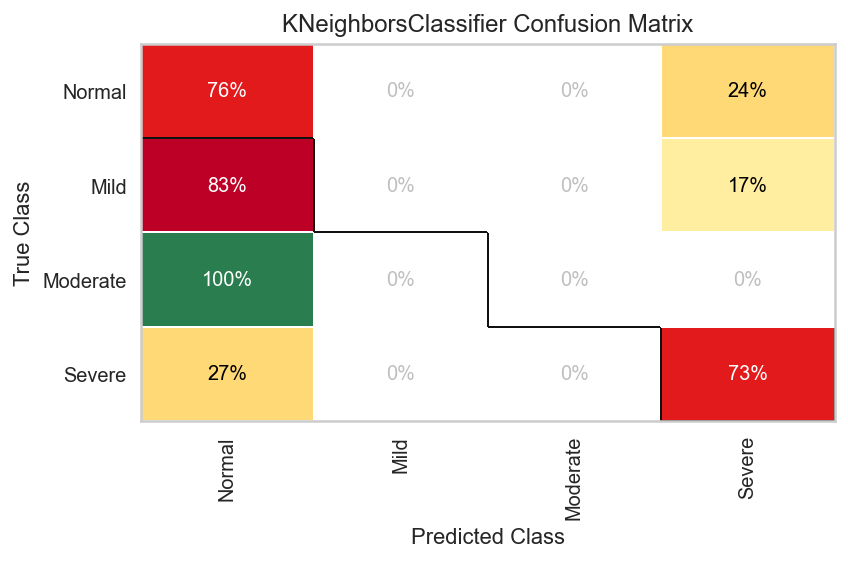

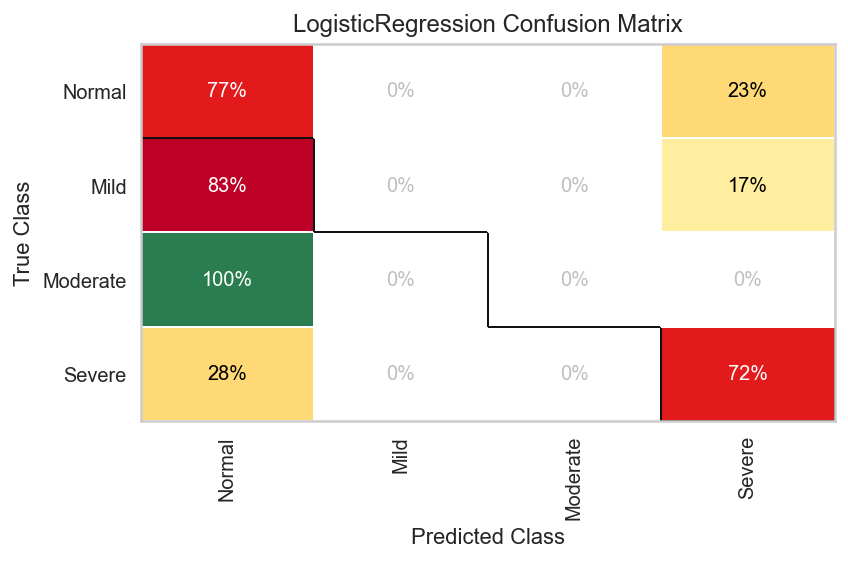

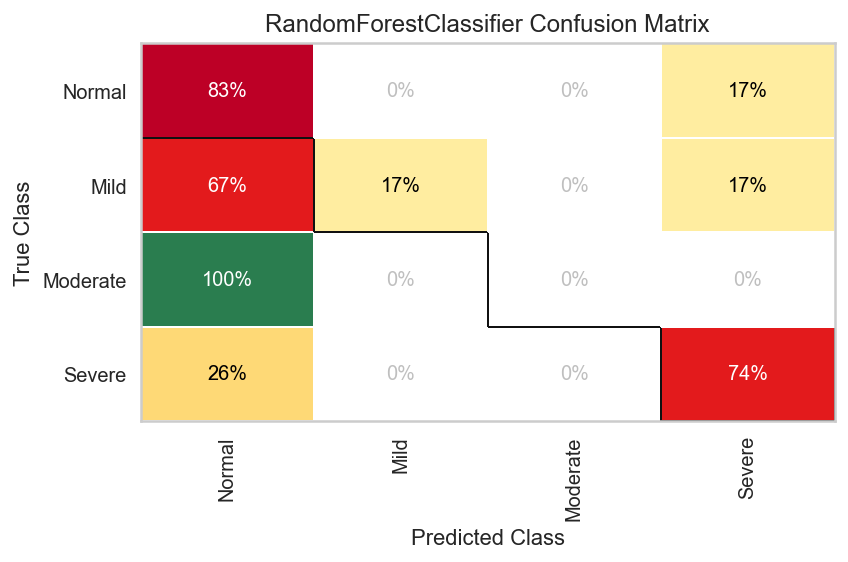

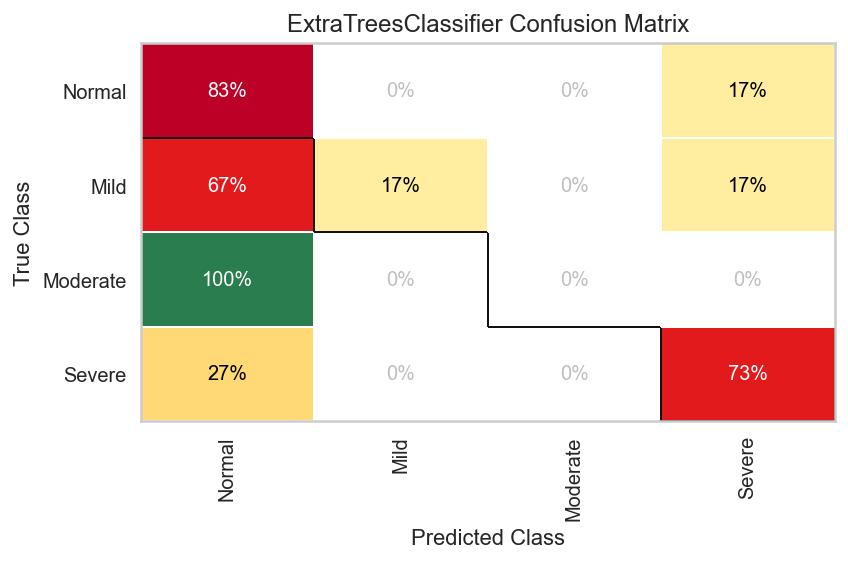

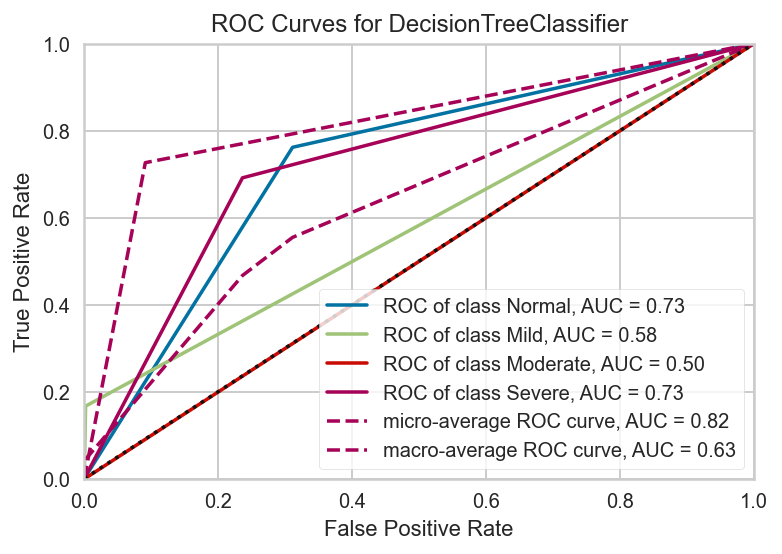

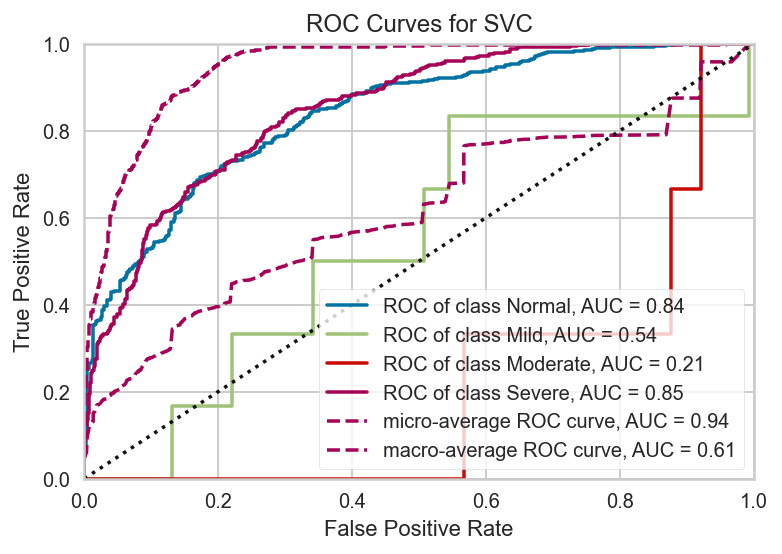

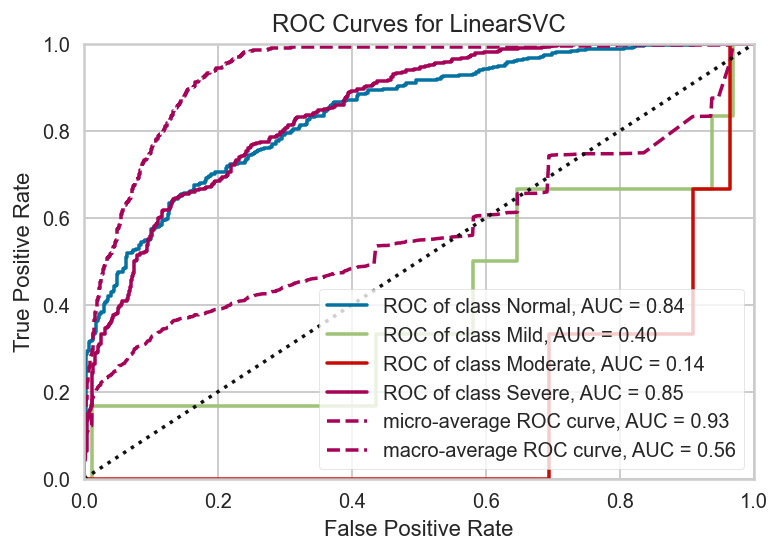

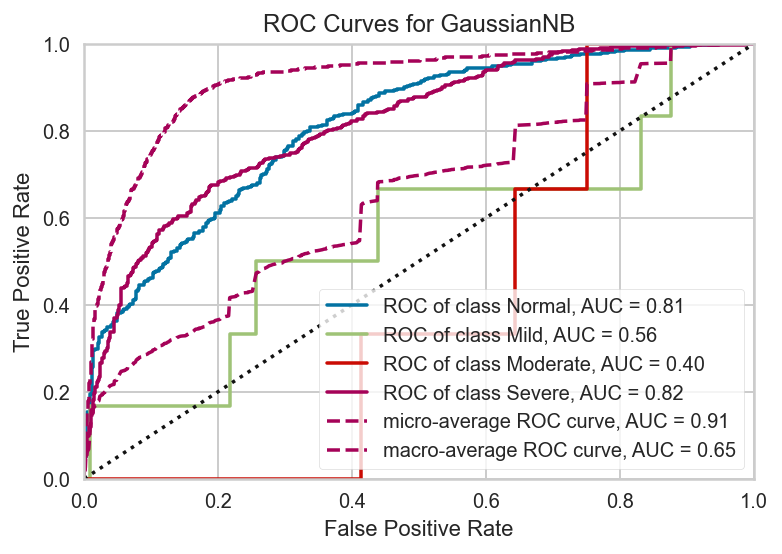

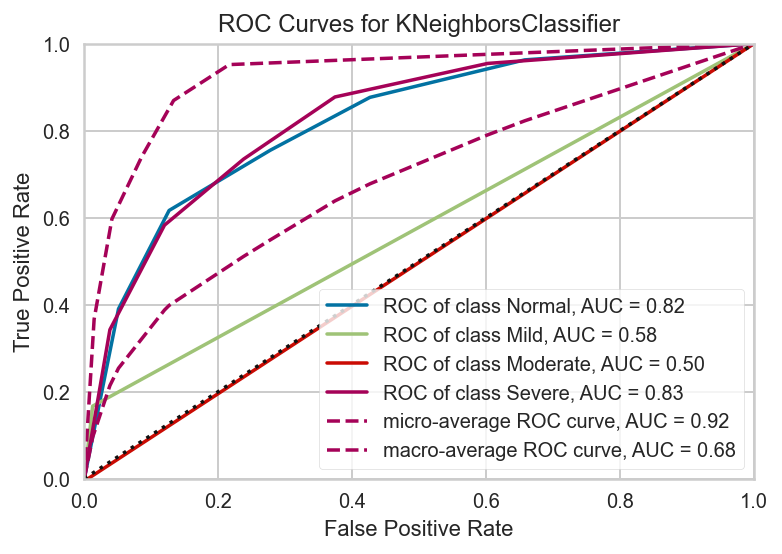

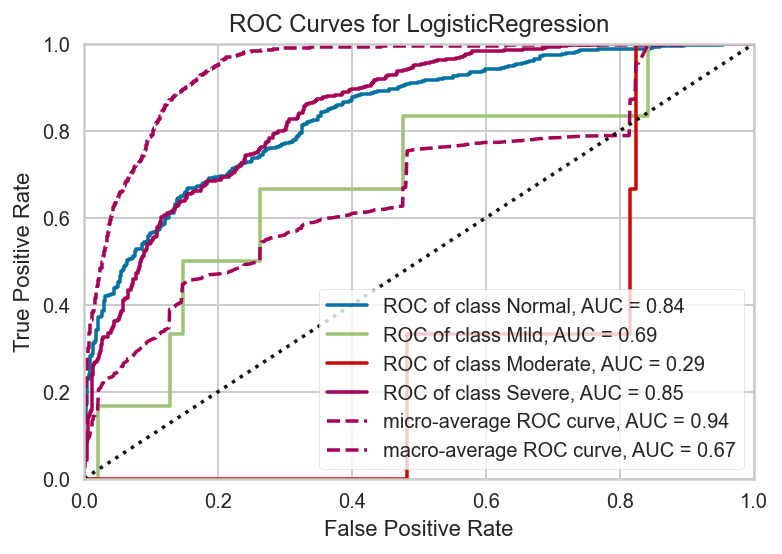

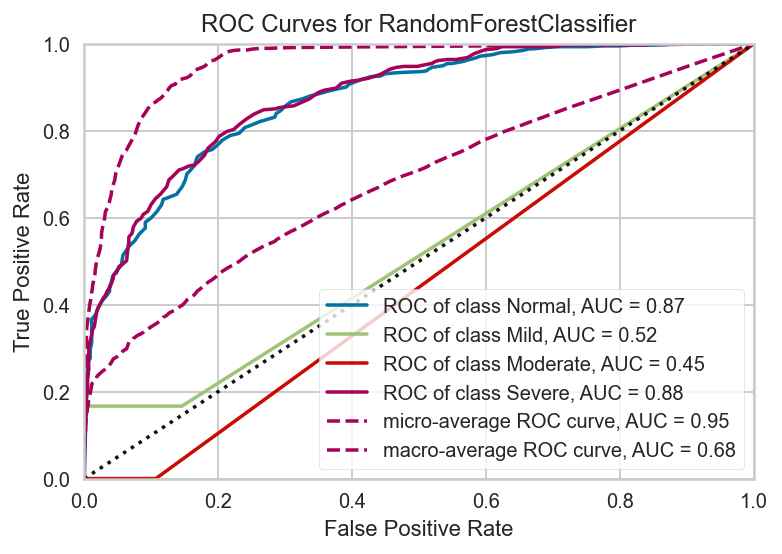

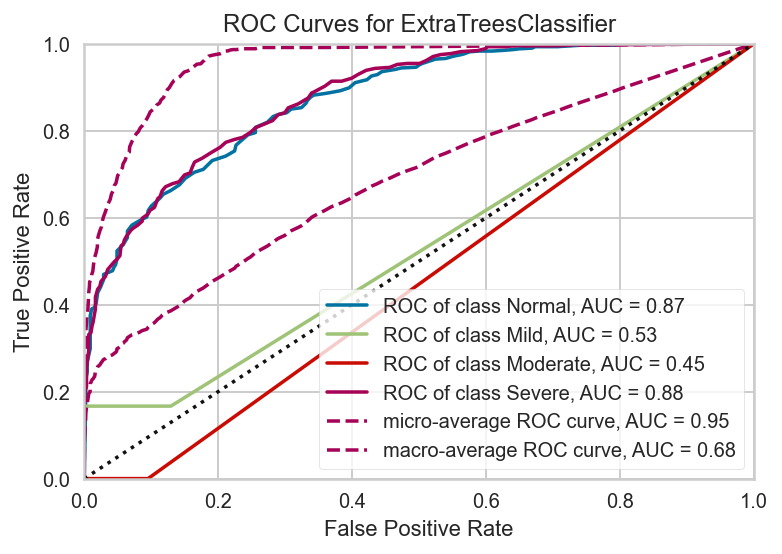

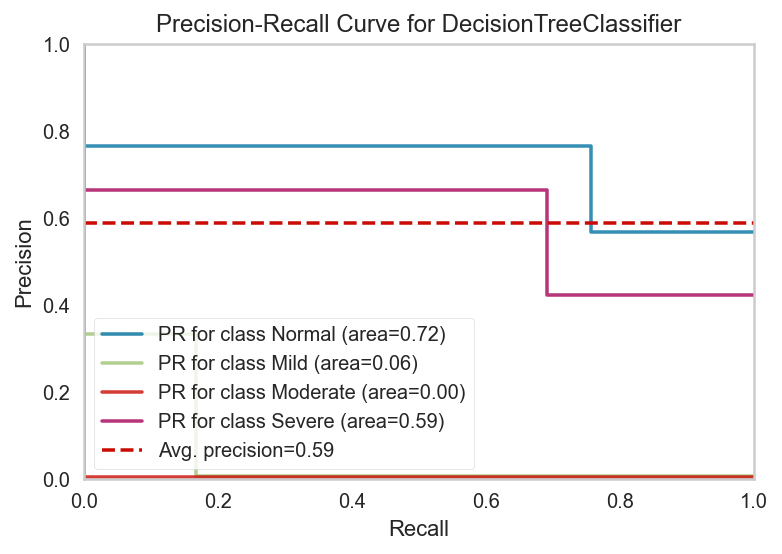

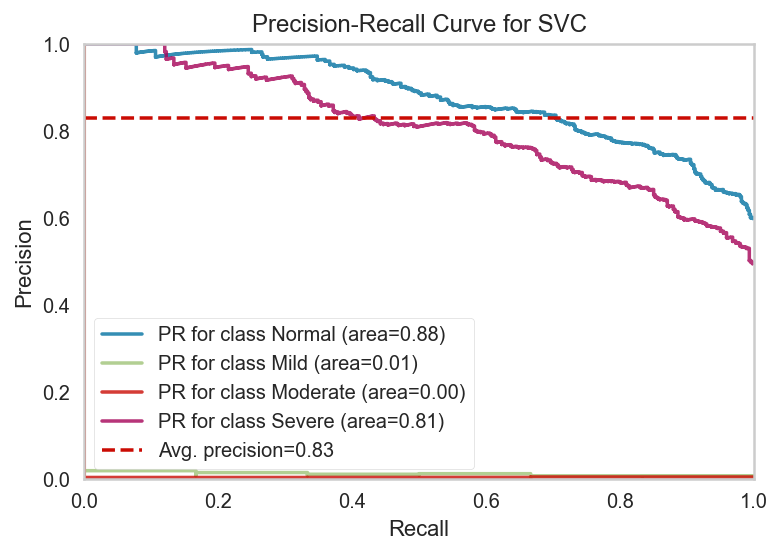

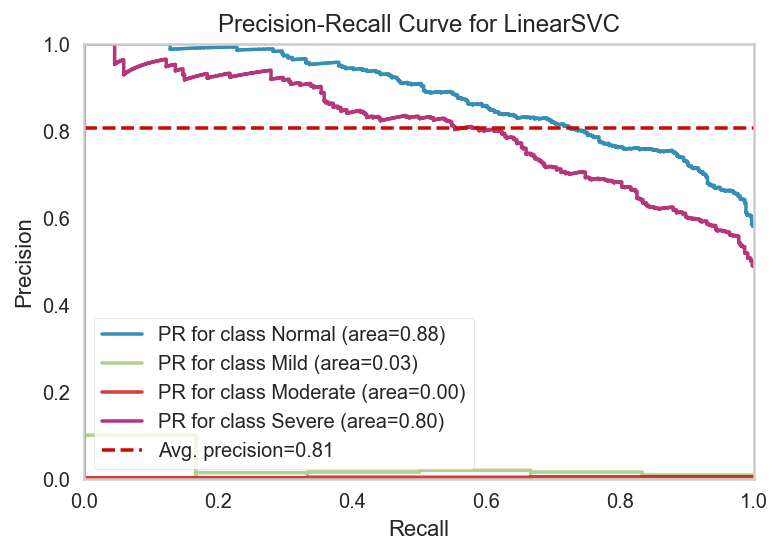

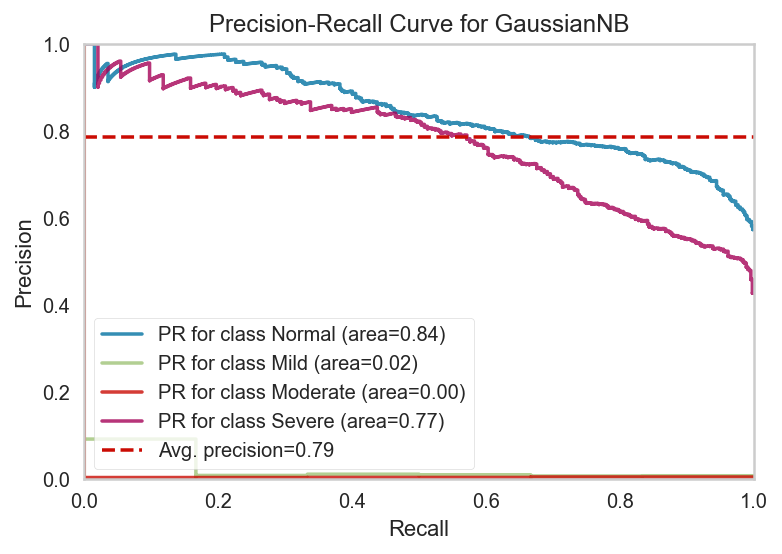

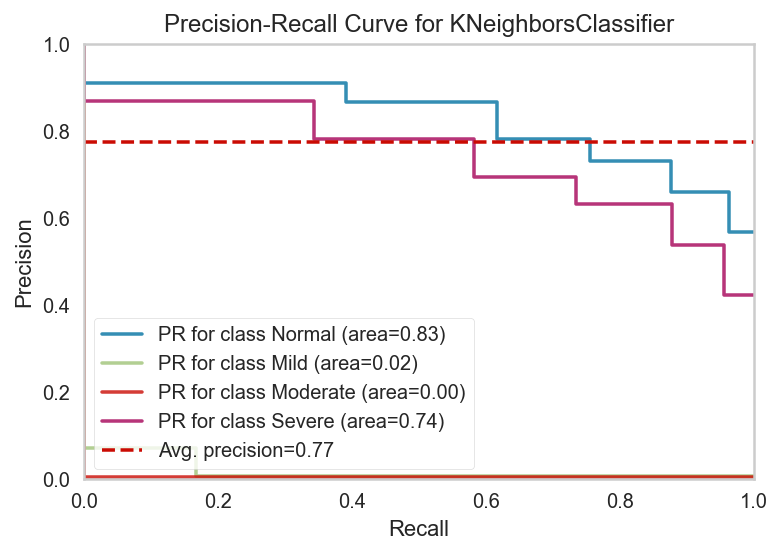

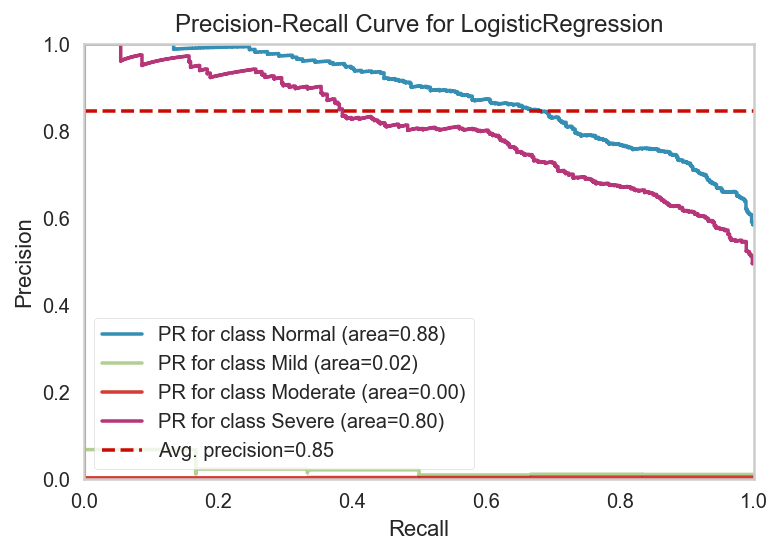

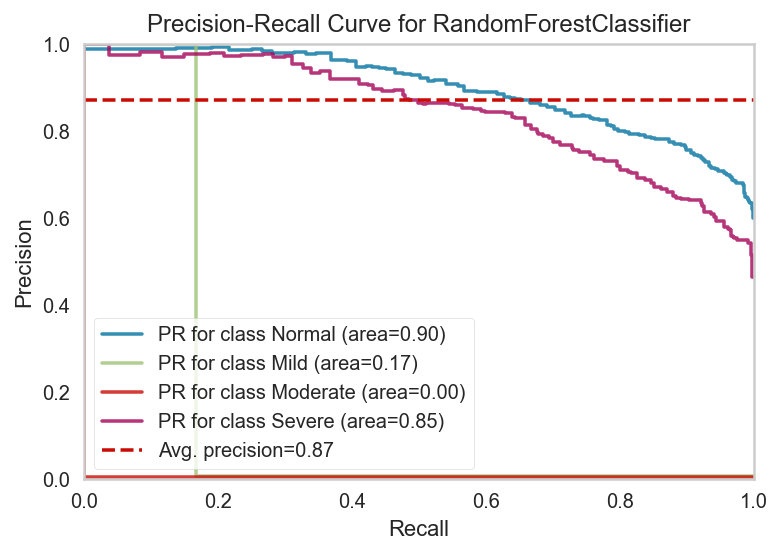

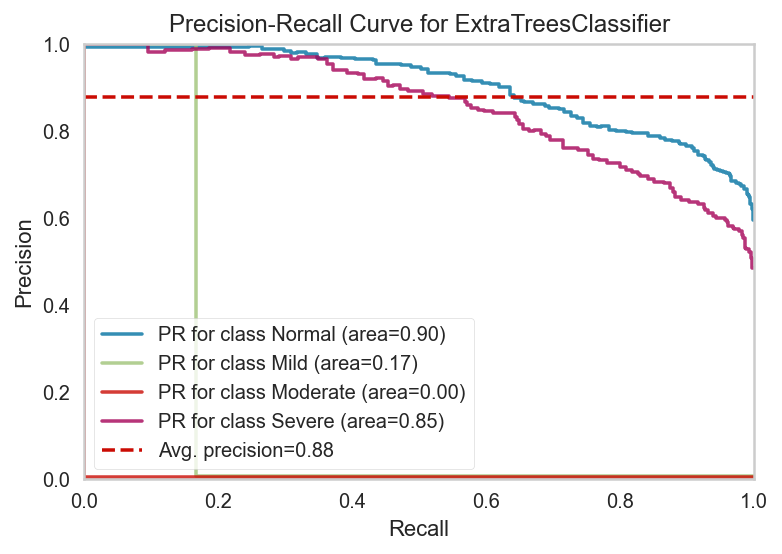

In [61]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [62]:
#Deploy aggregate metrics  
classifier_metrics()

DecisionTreeClassifier(random_state=0)
cohen_kappa_score: 0.449
log_loss: 9.447
zero_one_loss: 0.274
hemming_loss: 0.274
matthews_corrcoef: 0.449

------------------------------------------------------
SVC(random_state=0)
cohen_kappa_score: 0.499
log_loss: 0.000
zero_one_loss: 0.248
hemming_loss: 0.248
matthews_corrcoef: 0.499

------------------------------------------------------
LinearSVC(random_state=0)
cohen_kappa_score: 0.472
log_loss: 0.000
zero_one_loss: 0.272
hemming_loss: 0.272
matthews_corrcoef: 0.491

------------------------------------------------------
GaussianNB()
cohen_kappa_score: 0.451
log_loss: 1.119
zero_one_loss: 0.274
hemming_loss: 0.274
matthews_corrcoef: 0.451

------------------------------------------------------
KNeighborsClassifier()
cohen_kappa_score: 0.482
log_loss: 2.033
zero_one_loss: 0.257
hemming_loss: 0.257
matthews_corrcoef: 0.483

------------------------------------------------------
LogisticRegression(random_state=0)
cohen_kappa_score: 0.476
log_

### IMBLANCED TO BALANCED DATSET

#### CASE-1

In [63]:
X = df.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = df['status']
y

0       0
1       0
2       0
3       0
4       0
       ..
5203    3
5204    3
5205    3
5206    3
5207    0
Name: status, Length: 5208, dtype: int64

### OVERSAMPLING

In [64]:
from imblearn.over_sampling import SMOTE
strategy = {0:2884, 1:2200, 2:2200, 3:2294}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

In [65]:
y
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 2884, 1: 2200, 2: 2200, 3: 2294}

Text(0, 0.5, 'Frequency')

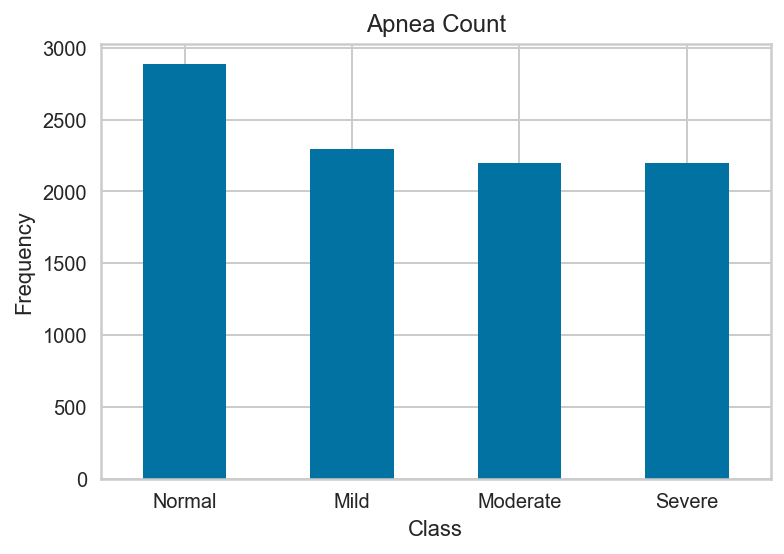

In [66]:
LABELS = ["Normal", "Mild","Moderate","Severe"]

count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Apnea Count")

plt.xticks(range(4), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

0    2884
3    2294
2    2200
1    2200
Name: status, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

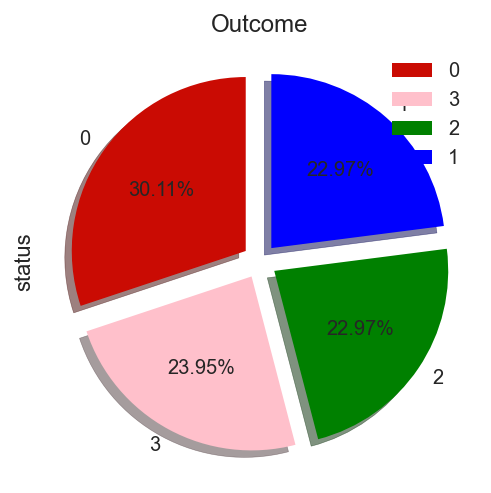

In [67]:
print(y.value_counts())
color=['r',"pink","green","blue"]
y.value_counts().plot.pie(colors=color,startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%').set_title('Outcome')
plt.legend()
plt.show

In [68]:
X.shape

(9578, 11)

In [69]:
X

BQ  ESS        BMI     Weight      Height       Head       Neck  \
0      0   14  29.065927  88.000000  174.000000  57.500000  39.000000   
1      0    8  26.989619  78.000000  170.000000  57.000000  36.500000   
2      0   16  23.939481  75.000000  177.000000  59.000000  39.000000   
3      0   15  22.129740  67.000000  174.000000  57.000000  35.000000   
4      0   15  22.129740  67.000000  174.000000  57.000000  35.000000   
...   ..  ...        ...        ...         ...        ...        ...   
9573   0    9  28.921474  76.841466  163.000000  54.066751  32.100127   
9574   0    9  25.091160  72.273797  169.637552  57.773143  36.273143   
9575   0    9  24.295206  71.361955  171.511229  57.287318  35.787318   
9576   0   13  28.562684  83.487640  171.198315  58.765281  42.272752   
9577   0    4  27.931784  73.282658  161.937902  54.000000  34.124195   

          Waist     Buttock        Age  M  
0     95.500000  106.500000  20.000000  1  
1     90.000000  100.000000  20.000000  1  
2     88.000000  104.000000  20.000000  1  
3     74.000000   94.000000  20.000000  1  
4     74.000000   94.000000  20.000000  1  
...         ...         ...        ... ..  
9573  94.883185  114.649555  60.899873  0  
9574  83.836637   96.636898  32.998693  1  
9575  85.755615   97.755615  38.574637  1  
9576  91.267808  101.214887  35.603370  1  
9577  92.875805  109.955036  57.282658  0  

[9578 rows x 11 columns]

In [70]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    2
9574    2
9575    2
9576    2
9577    2
Name: status, Length: 9578, dtype: int64

In [71]:
df1 = pd.concat([X,y],axis='columns')
df1

BQ  ESS        BMI     Weight      Height       Head       Neck  \
0      0   14  29.065927  88.000000  174.000000  57.500000  39.000000   
1      0    8  26.989619  78.000000  170.000000  57.000000  36.500000   
2      0   16  23.939481  75.000000  177.000000  59.000000  39.000000   
3      0   15  22.129740  67.000000  174.000000  57.000000  35.000000   
4      0   15  22.129740  67.000000  174.000000  57.000000  35.000000   
...   ..  ...        ...        ...         ...        ...        ...   
9573   0    9  28.921474  76.841466  163.000000  54.066751  32.100127   
9574   0    9  25.091160  72.273797  169.637552  57.773143  36.273143   
9575   0    9  24.295206  71.361955  171.511229  57.287318  35.787318   
9576   0   13  28.562684  83.487640  171.198315  58.765281  42.272752   
9577   0    4  27.931784  73.282658  161.937902  54.000000  34.124195   

          Waist     Buttock        Age  M  status  
0     95.500000  106.500000  20.000000  1       0  
1     90.000000  100.000000  20.000000  1       0  
2     88.000000  104.000000  20.000000  1       0  
3     74.000000   94.000000  20.000000  1       0  
4     74.000000   94.000000  20.000000  1       0  
...         ...         ...        ... ..     ...  
9573  94.883185  114.649555  60.899873  0       2  
9574  83.836637   96.636898  32.998693  1       2  
9575  85.755615   97.755615  38.574637  1       2  
9576  91.267808  101.214887  35.603370  1       2  
9577  92.875805  109.955036  57.282658  0       2  

[9578 rows x 12 columns]

In [72]:
df1=df1.round({'BQ' : 0,'ESS' : 0,'BMI' : 5,'Weight' : 0,'Height' : 0,'Head' : 1,'Neck' : 0,'Waist' : 0,'Buttock' : 0,'Age' : 0,'M' : 0,'status' : 0,})

In [73]:
df1

BQ  ESS       BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0      0   14  29.06593    88.0   174.0  57.5  39.0   96.0    106.0  20.0  1   
1      0    8  26.98962    78.0   170.0  57.0  36.0   90.0    100.0  20.0  1   
2      0   16  23.93948    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3      0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4      0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
...   ..  ...       ...     ...     ...   ...   ...    ...      ...   ... ..   
9573   0    9  28.92147    77.0   163.0  54.1  32.0   95.0    115.0  61.0  0   
9574   0    9  25.09116    72.0   170.0  57.8  36.0   84.0     97.0  33.0  1   
9575   0    9  24.29521    71.0   172.0  57.3  36.0   86.0     98.0  39.0  1   
9576   0   13  28.56268    83.0   171.0  58.8  42.0   91.0    101.0  36.0  1   
9577   0    4  27.93178    73.0   162.0  54.0  34.0   93.0    110.0  57.0  0   

      status  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
9573       2  
9574       2  
9575       2  
9576       2  
9577       2  

[9578 rows x 12 columns]

In [74]:
df1.to_csv('D:\MAJOR PROJECT\datasets\sampled_dataset.csv')
df1.shape

(9578, 12)

In [77]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
df1scores = pd.DataFrame(fit.scores_)
df1columns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

      Specs        Score
3    Weight  5962.325342
7     Waist  3990.932776
9       Age  2654.975063
2       BMI  1430.419296
1       ESS   998.357197
8   Buttock   927.241039
6      Neck   905.060547
0        BQ   511.531609
10        M   384.641965
4    Height   244.540816
5      Head    50.582176


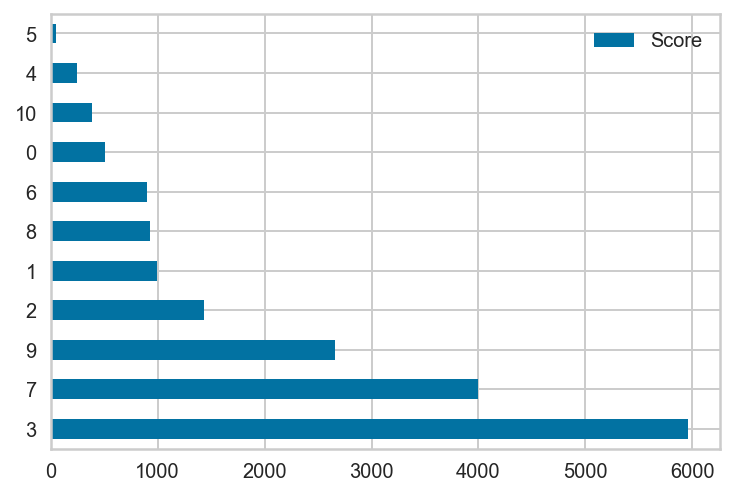

In [78]:
featureScores.nlargest(12,'Score').plot(kind='barh')
plt.show()

[0.02874036 0.09629838 0.09589153 0.10088031 0.09605013 0.09646446
 0.10464415 0.11940467 0.08748598 0.130387   0.04375303]


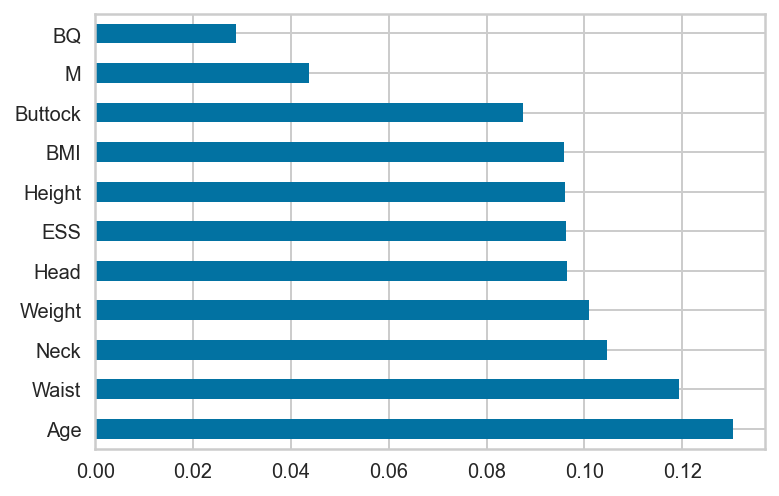

In [79]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [80]:
X = df1.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = df1['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7662, 11)
y_train (7662,)
X_test (1916, 11)
y_test (1916,)


In [81]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)
  #precision    = precision_score(y_test, y_pred1)
 # recall       = recall_score(y_test, y_pred1)
 # f1score      = f1_score(y_test, y_pred1) 
 # rocauc       = roc_auc_score(y_test, y_pred1)
  #logloss      = log_loss(y_test, y_pred1)
  accuracy     = accuracy_score(y_test, y_pred1)
  classification =classification_report(y_test, y_pred1)
  confusion    = confusion_matrix(y_test, y_pred1)

  df_model1 = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                            'classification':[classification],
                             #'precision'    : [precision],
                             #'recall'       : [recall],
                             #'f1score'      : [f1score],
                             #'rocauc'       : [rocauc],
                            # 'logloss'      : [logloss],
                             'timetaken'    : [time2],
                            'confusionmatrix' : [confusion]
                            
                                }) 
  return df_model1

In [82]:
%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier(random_state=0)
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model1 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model1.timetaken[0] = time.time() - time2
print("Random Forest")
print(base_model.get_params())
print(model1)

base model
Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
          model  accuracy                                     classification  \
0  RandomForest  0.873695                precision    recall  f1-score   ...   

   timetaken                                    confusionmatrix  
0   0.719567  [[488, 3, 5, 108], [2, 428, 0, 0], [0, 0, 433,...  
Wall time: 720 ms


In [83]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model1 = ExtraTreesClassifier(random_state=0)
base_model1.fit(X_train, y_train)
model2 = evaluate(base_model1,  X_test,  y_test, 'Extra Tree')
model2.timetaken[0] = time.time() - time2
print("Extra Tree")
print(base_model1.get_params())

base model
Extra Tree
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Wall time: 523 ms


In [84]:
%%time
time2=time.time()
print("base model")
base_model2 = LogisticRegression(random_state=0)
base_model2.fit(X_train, y_train)
model3 = evaluate(base_model2,  X_test,  y_test, 'Logistic Regression')
model3.timetaken[0] = time.time() - time2
print("Logoistic Regression")
print(base_model2.get_params())

base model
Logoistic Regression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Wall time: 330 ms


In [85]:
%%time
time2=time.time()
print("base model")
base_model3 = KNeighborsClassifier()
base_model3.fit(X_train, y_train)
model4 = evaluate(base_model3,  X_test,  y_test, 'KNN')
model4.timetaken[0] = time.time() - time2
print("KNN")
print(base_model3.get_params())
print(X_train.shape)

base model
KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
(7662, 11)
Wall time: 83 ms


In [86]:
%%time
time2=time.time()
print("base model")
base_model4 = LinearSVC(random_state=0)
base_model4.fit(X_train, y_train)
model5 = evaluate(base_model4,  X_test,  y_test, 'LinearSVC')
model5.timetaken[0] = time.time() - time2
print("LinearSVC")
print(base_model4.get_params())

base model
LinearSVC
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}
Wall time: 1.06 s


In [87]:
%%time
time2=time.time()
print("base model")
base_model5 = GaussianNB()
base_model5.fit(X_train, y_train)
model6 = evaluate(base_model5,  X_test,  y_test, 'GaussianNB')
model6.timetaken[0] = time.time() - time2
print("GaussianNB")
print(base_model5.get_params())

base model
GaussianNB
{'priors': None, 'var_smoothing': 1e-09}
Wall time: 19.3 ms


In [88]:
%%time
time2=time.time()
print("base model")
base_model6=SVC(random_state=0)
base_model6.fit(X_train, y_train)
model7 = evaluate(base_model6,  X_test,  y_test, 'SVC')
model7.timetaken[0] = time.time() - time2
print("SVC")
print(base_model6.get_params())

base model
SVC
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Wall time: 2.9 s


In [89]:
%%time
time2=time.time()
print("base model")
base_model7=DecisionTreeClassifier(random_state=0)
base_model7.fit(X_train, y_train)
model8 = evaluate(base_model7,  X_test,  y_test, 'Decision Tree')
model8.timetaken[0] = time.time() - time2
print("Decision Tree")
print(base_model7.get_params())

base model
Decision Tree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
Wall time: 36.1 ms


In [90]:
df_base1= pd.concat([model1,model2,model3,model4,model5,model6,model7,model8],axis = 0).reset_index()
df_base1.drop('index', axis=1, inplace=True)
df_base1

model  accuracy  \
0         RandomForest  0.873695   
1           Extra Tree  0.867432   
2  Logistic Regression  0.521921   
3                  KNN  0.808977   
4            LinearSVC  0.414405   
5           GaussianNB  0.553236   
6                  SVC  0.531837   
7        Decision Tree  0.816806   

                                      classification  timetaken  \
0                precision    recall  f1-score   ...   0.719567   
1                precision    recall  f1-score   ...   0.523337   
2                precision    recall  f1-score   ...   0.329877   
3                precision    recall  f1-score   ...   0.083034   
4                precision    recall  f1-score   ...   1.056942   
5                precision    recall  f1-score   ...   0.011324   
6                precision    recall  f1-score   ...   2.896467   
7                precision    recall  f1-score   ...   0.036079   

                                     confusionmatrix  
0  [[488, 3, 5, 108], [2, 428, 0, 0], [0, 0, 433,...  
1  [[475, 0, 6, 123], [2, 428, 0, 0], [0, 0, 433,...  
2  [[261, 129, 101, 113], [156, 201, 43, 30], [15...  
3  [[381, 61, 40, 122], [0, 429, 1, 0], [0, 0, 43...  
4  [[0, 344, 226, 34], [0, 400, 30, 0], [0, 195, ...  
5  [[231, 182, 79, 112], [41, 343, 39, 7], [63, 1...  
6  [[225, 172, 101, 106], [53, 262, 90, 25], [56,...  
7  [[413, 23, 14, 154], [10, 416, 0, 4], [2, 2, 4...

In [91]:
df_base1
df_base1.to_csv('D:\MAJOR PROJECT\datasets\Balanced_data1_performance_metrics.csv')

In [92]:
# libraries 
#!pip install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [93]:
classes =  ["Normal", "Mild","Moderate","Severe"]
classes

['Normal', 'Mild', 'Moderate', 'Severe']

In [94]:
classifiers=[
DecisionTreeClassifier(random_state=0),
SVC(random_state=0),
LinearSVC(random_state=0),
GaussianNB(),
KNeighborsClassifier(),
LogisticRegression(random_state=0),
RandomForestClassifier(random_state=0),
ExtraTreesClassifier(random_state=0)]


In [95]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        visualizer.score(X_test, y_test)
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test,  x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


In [96]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

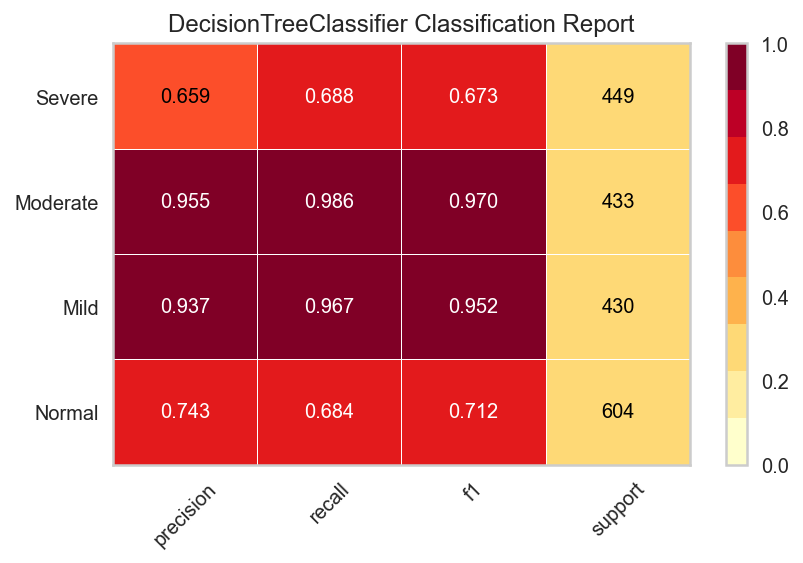

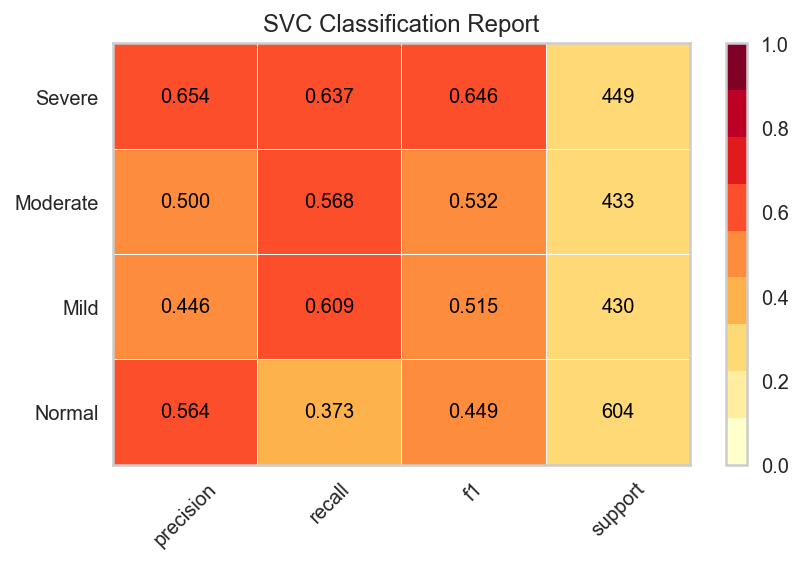

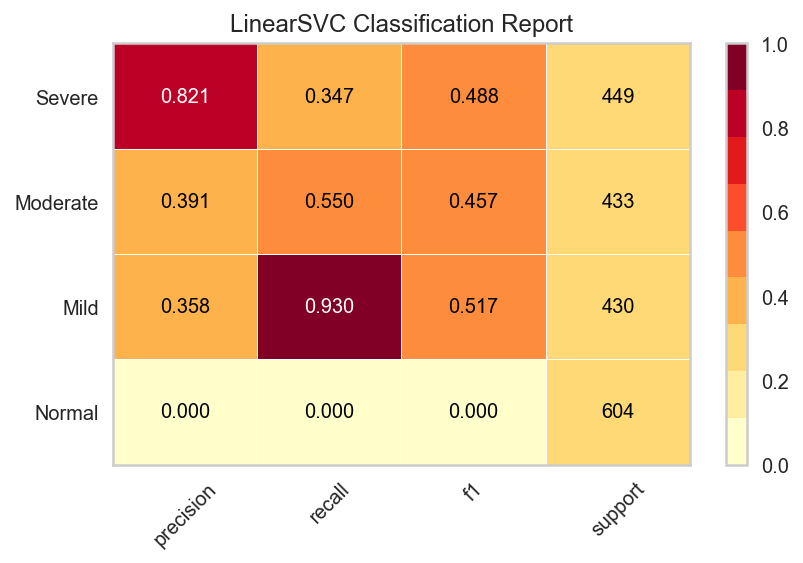

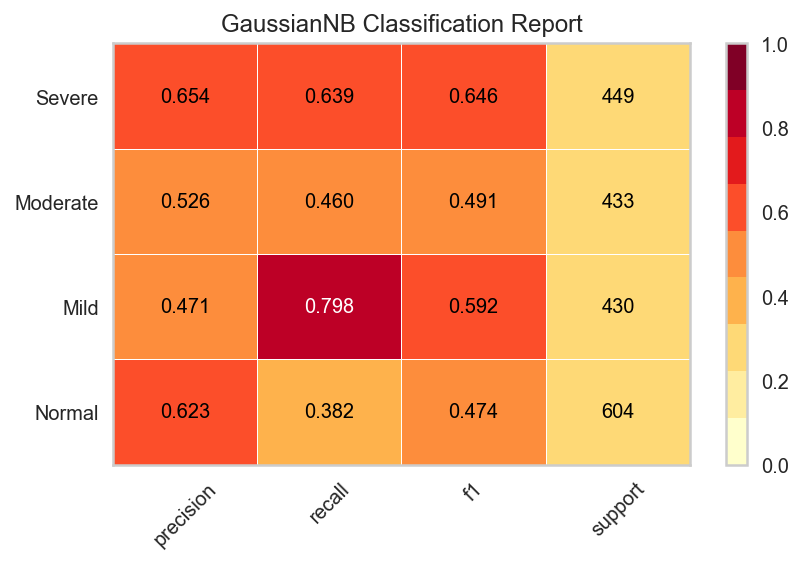

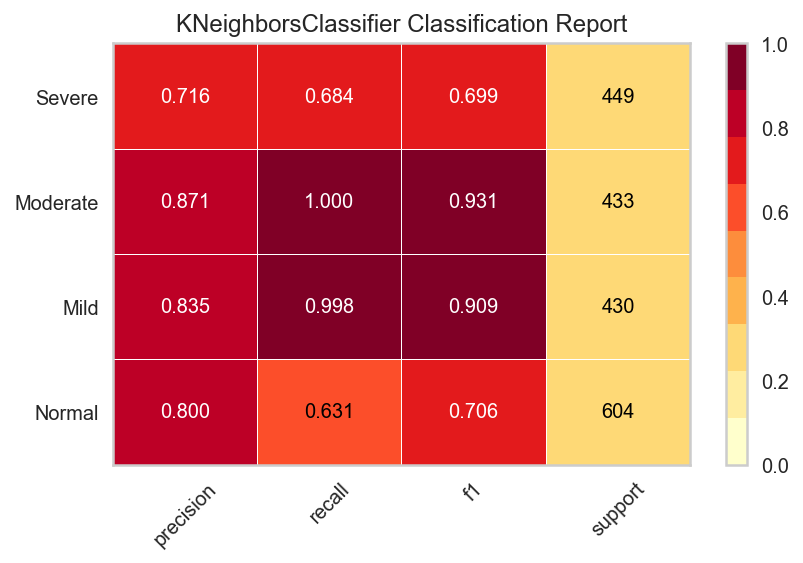

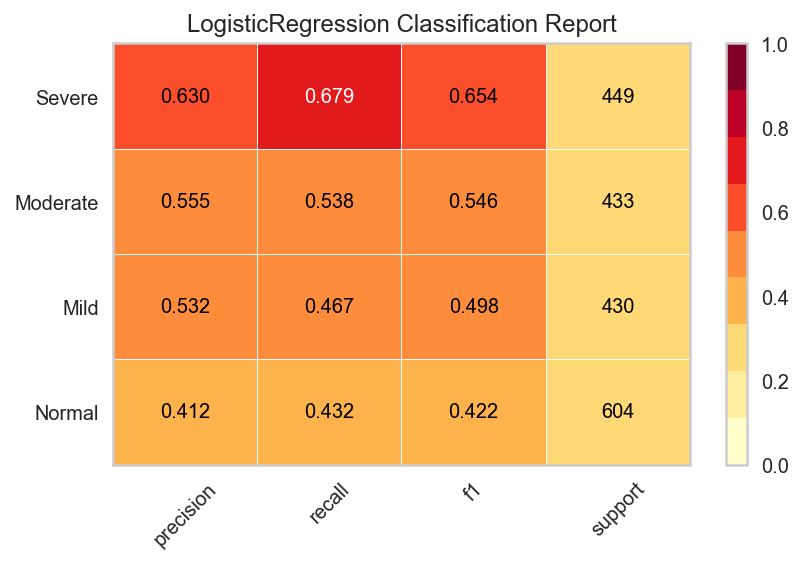

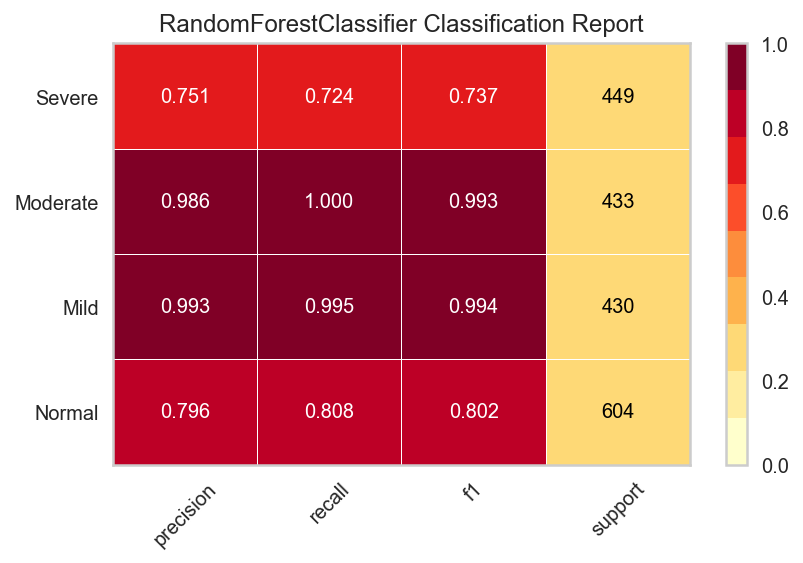

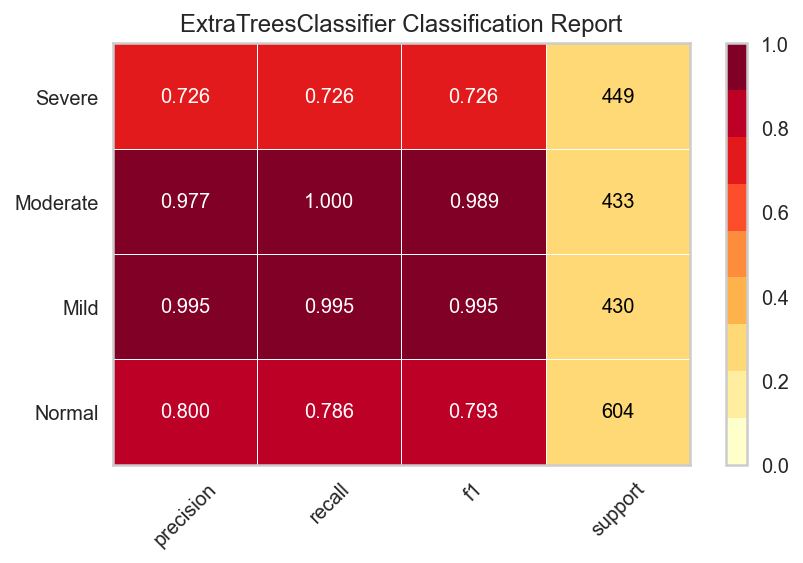

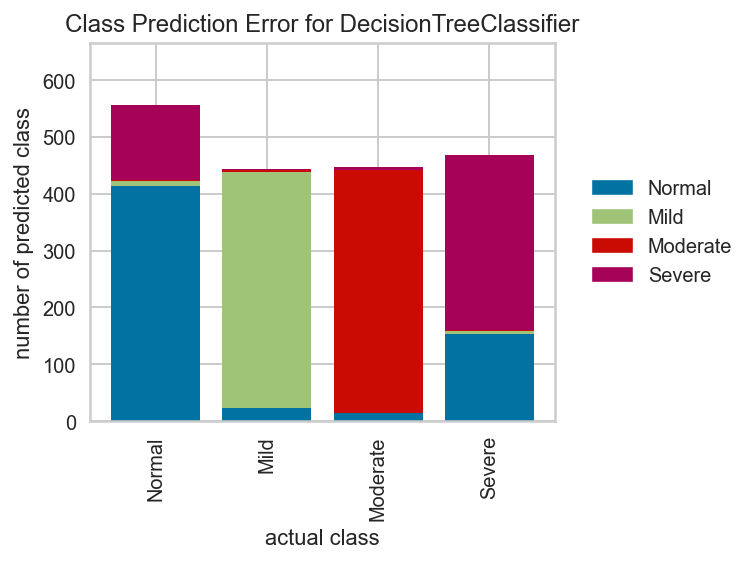

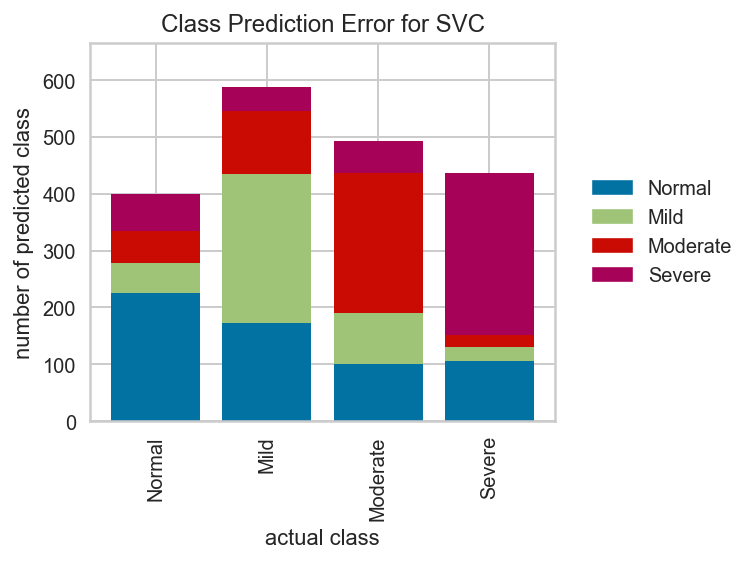

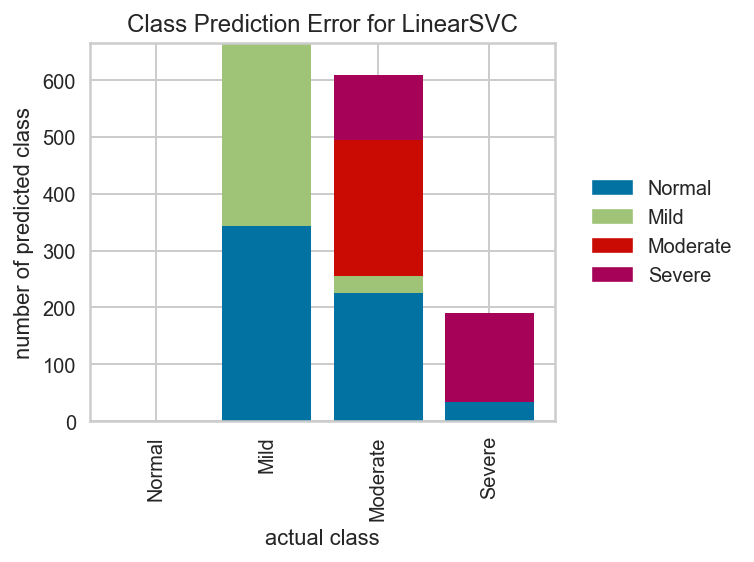

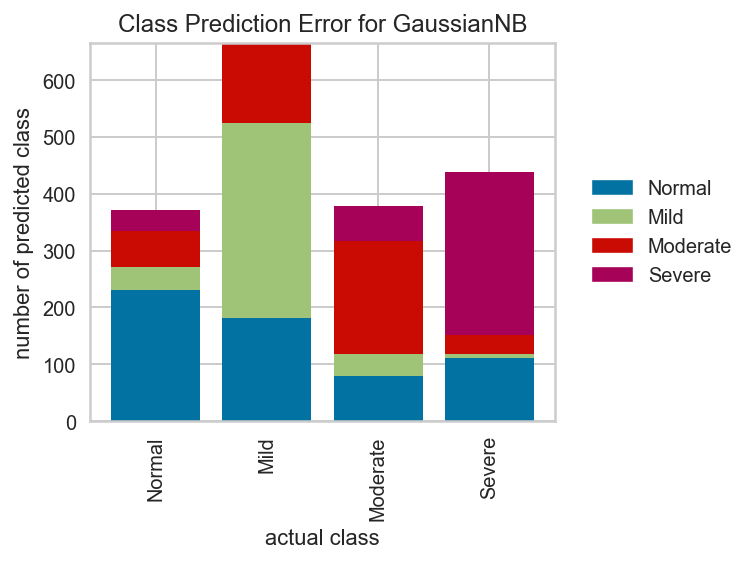

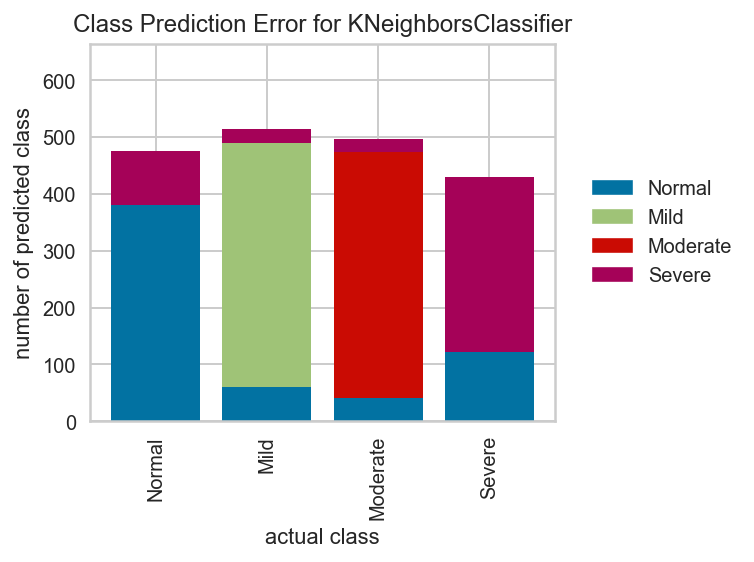

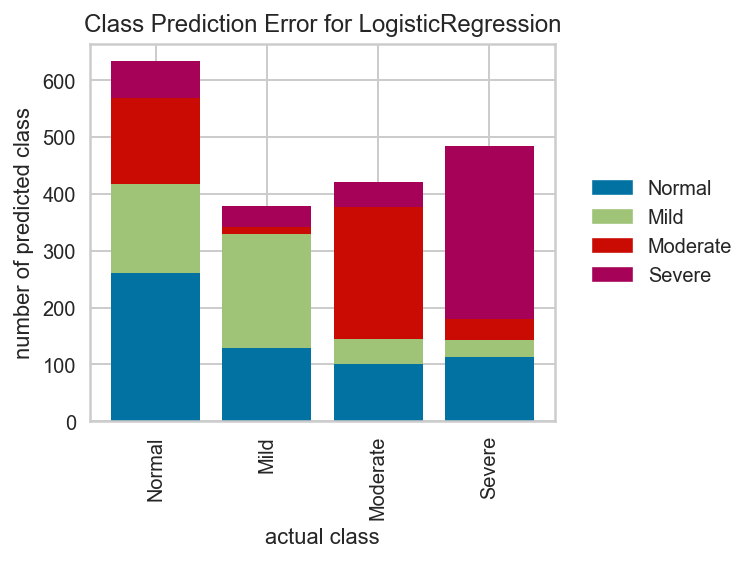

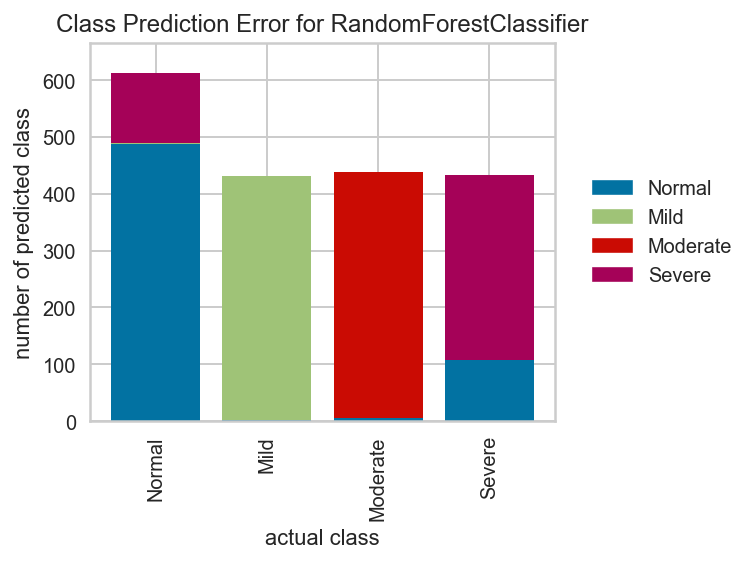

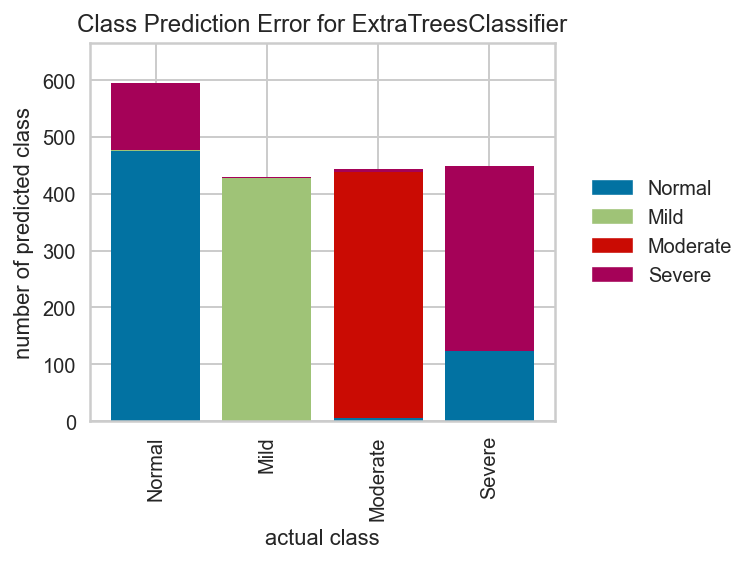

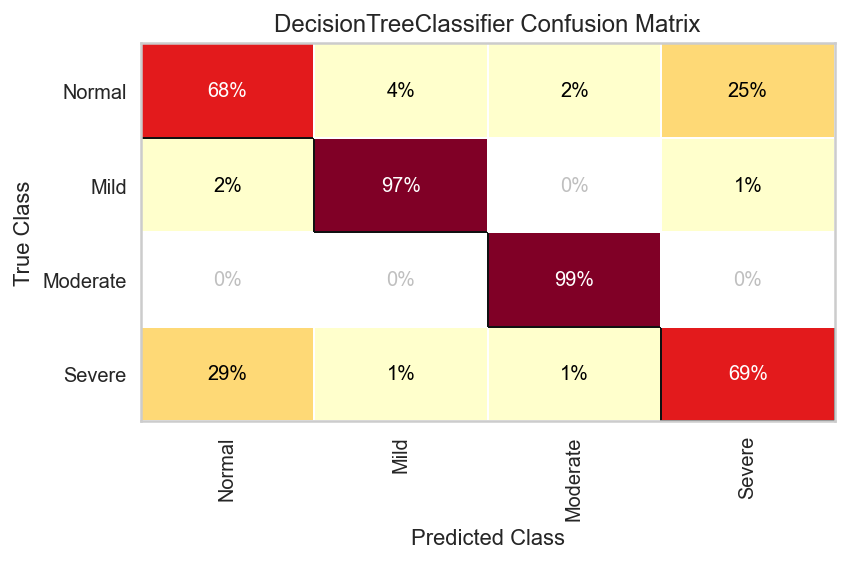

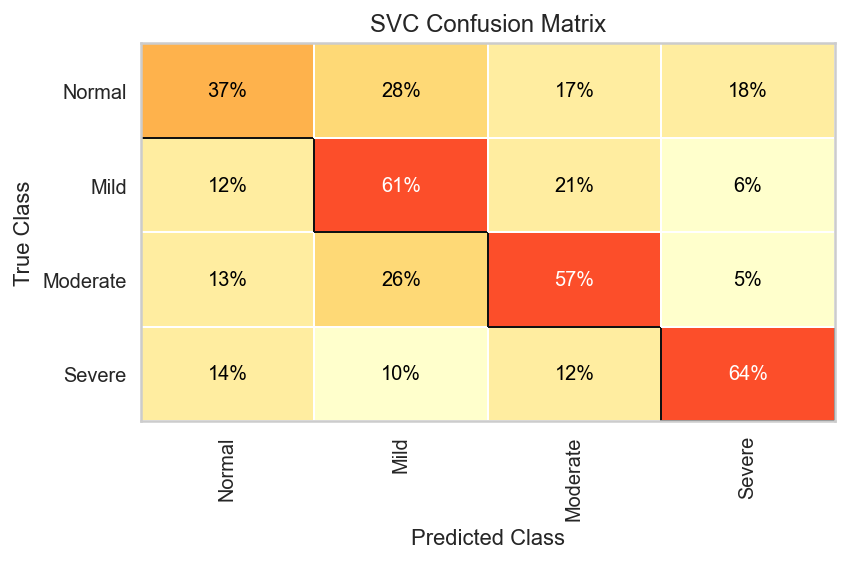

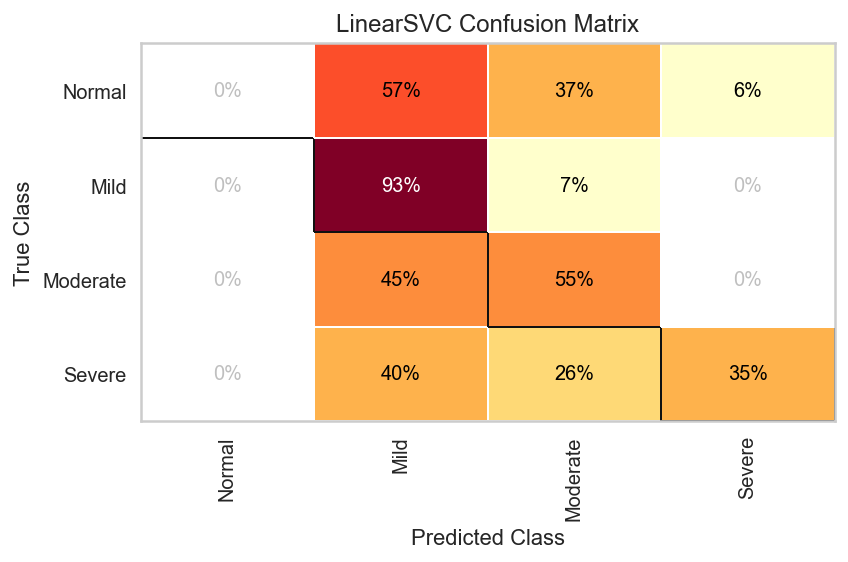

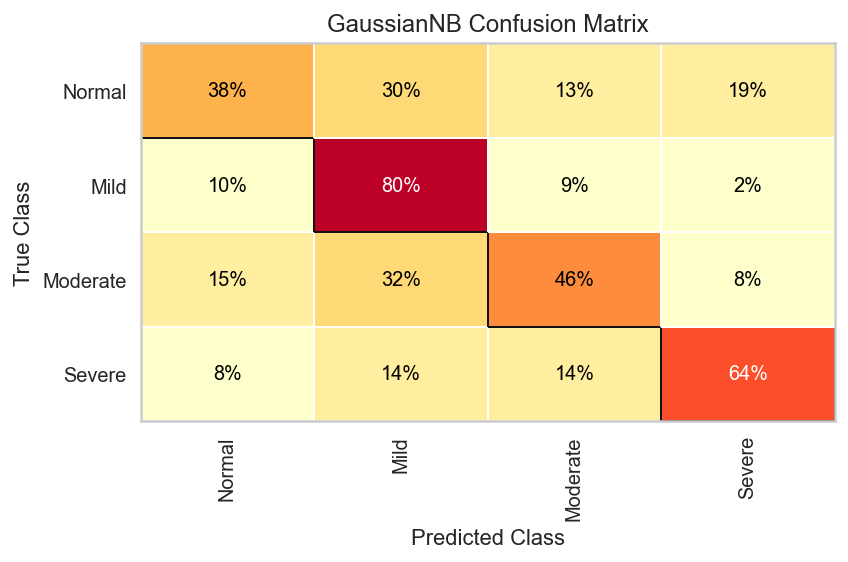

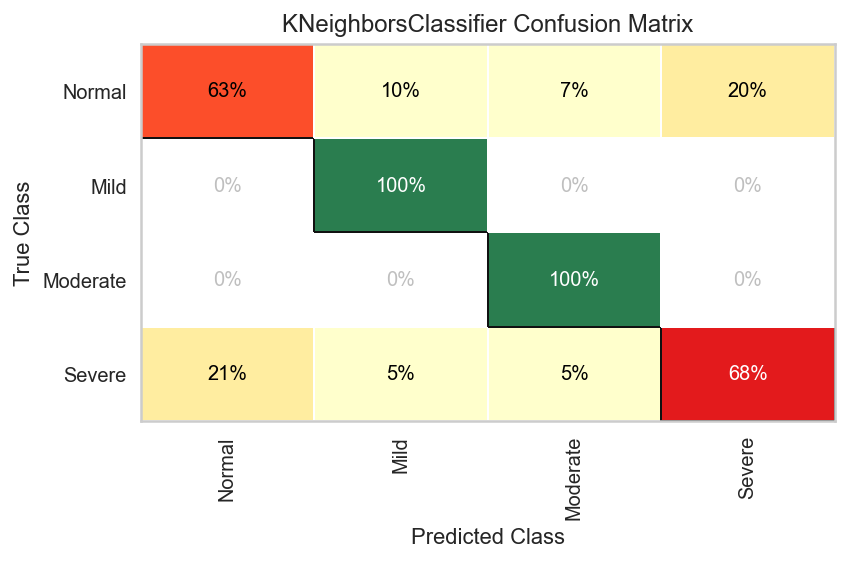

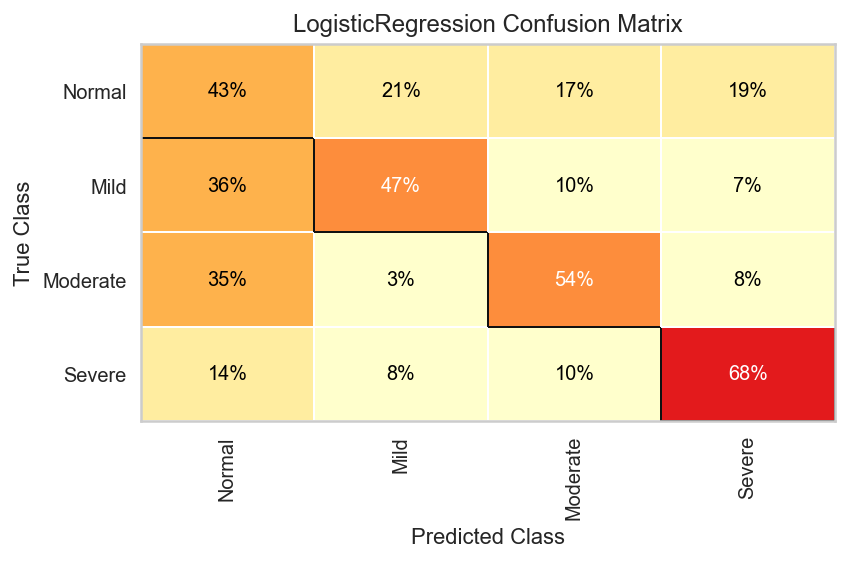

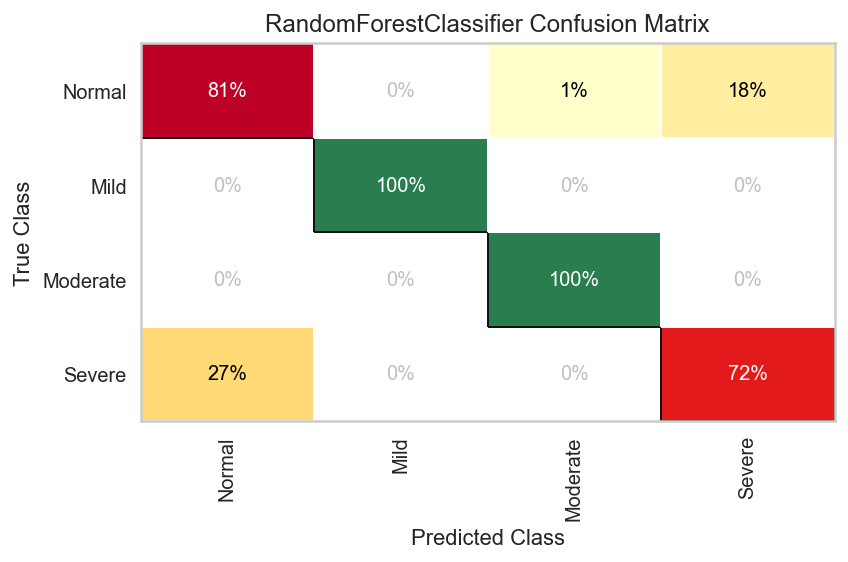

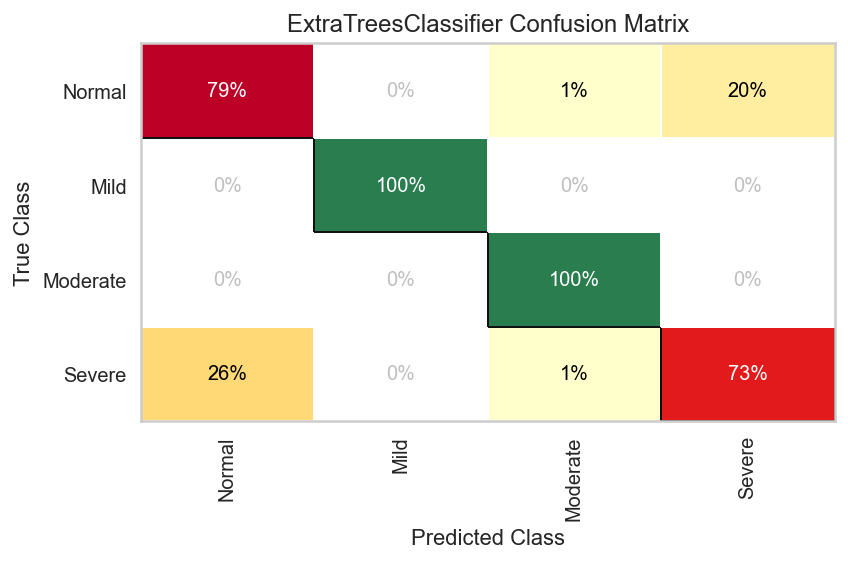

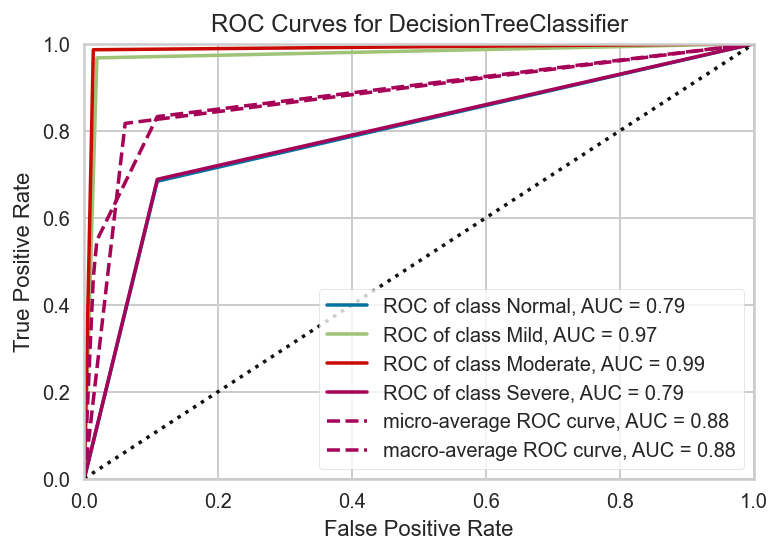

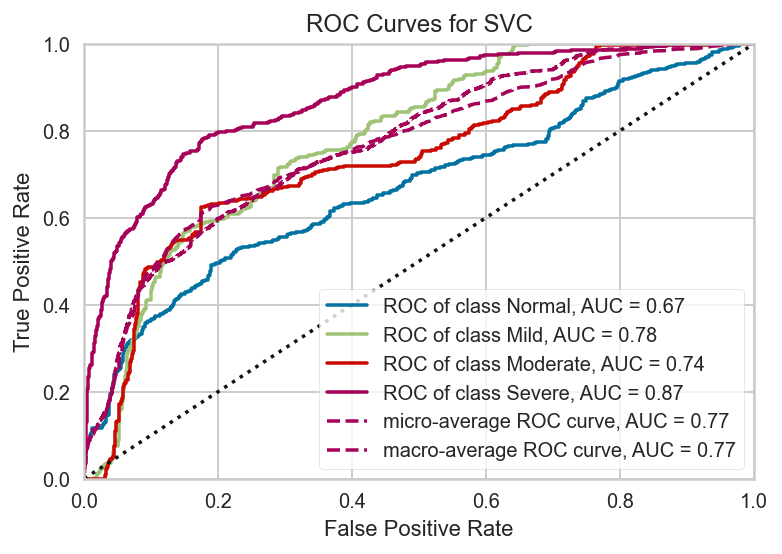

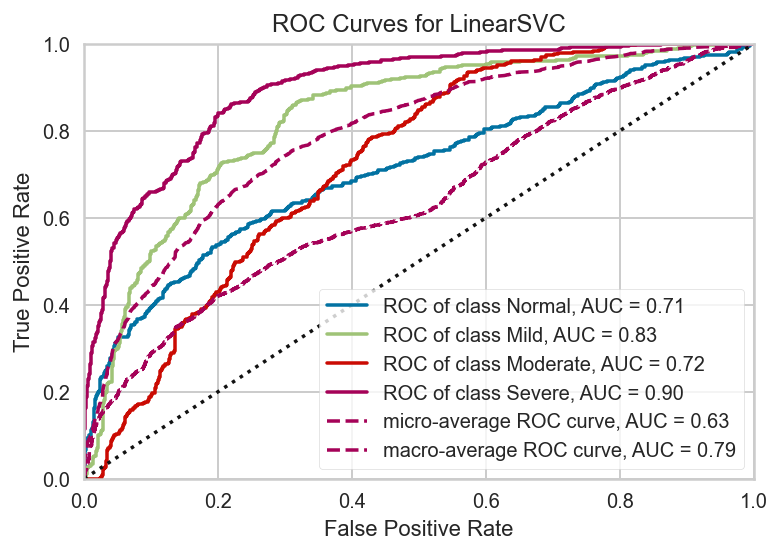

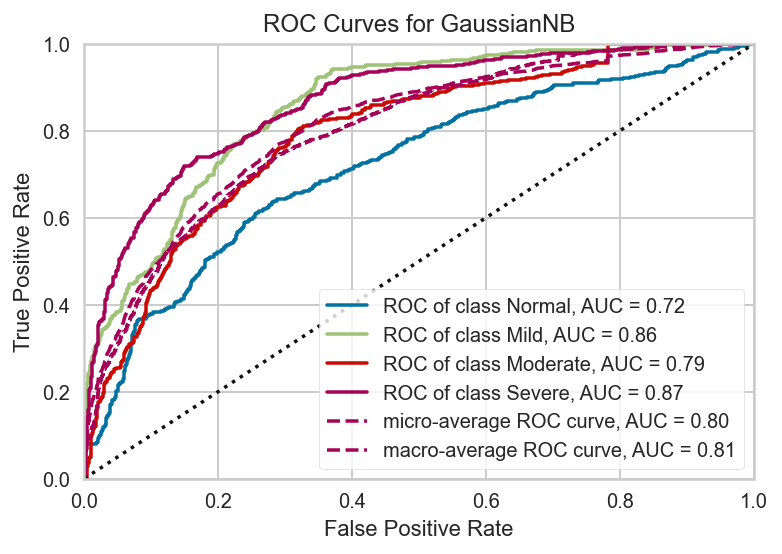

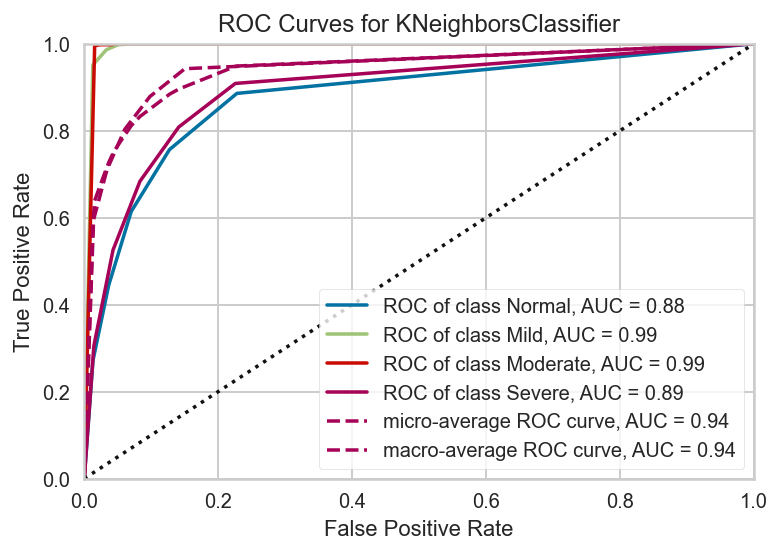

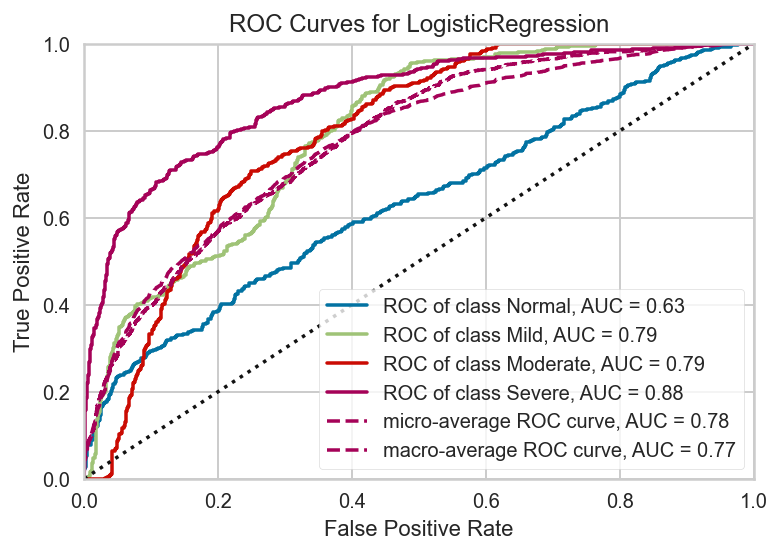

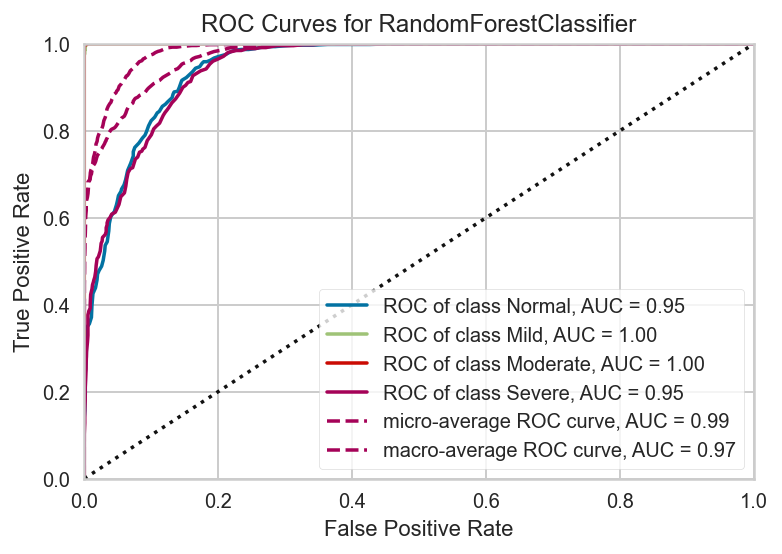

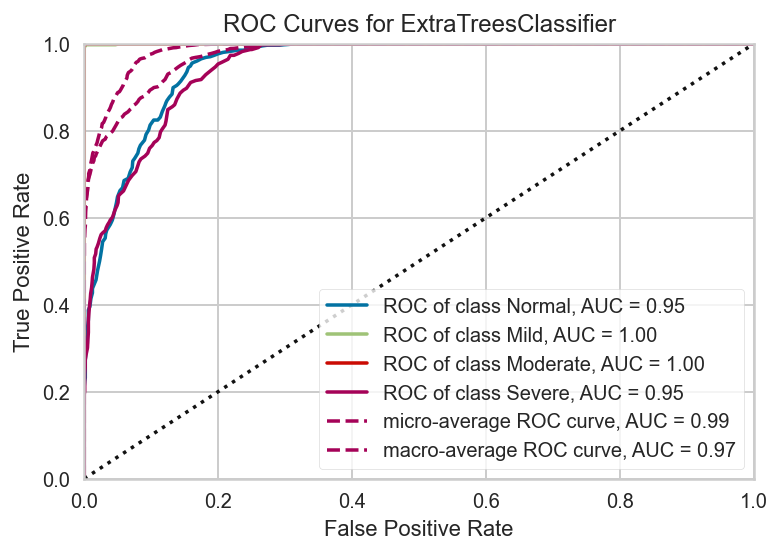

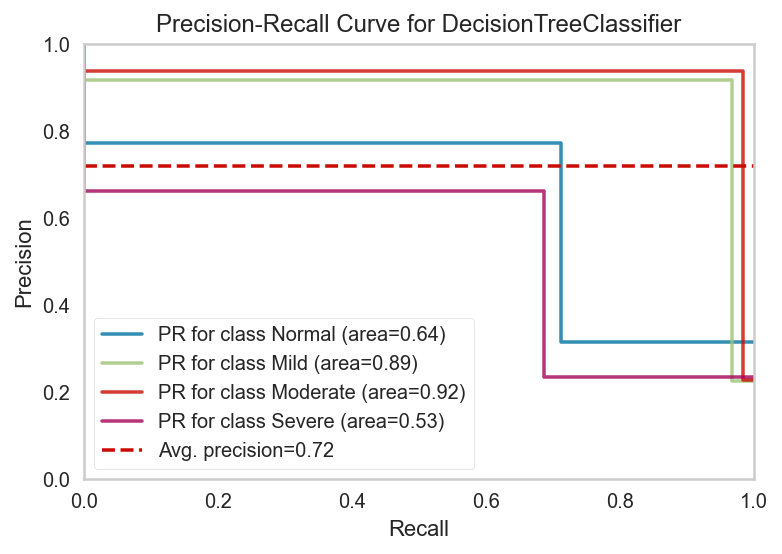

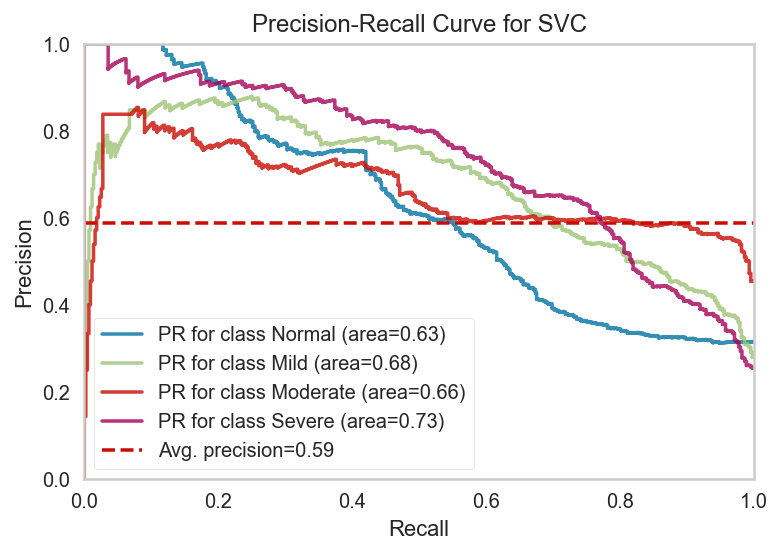

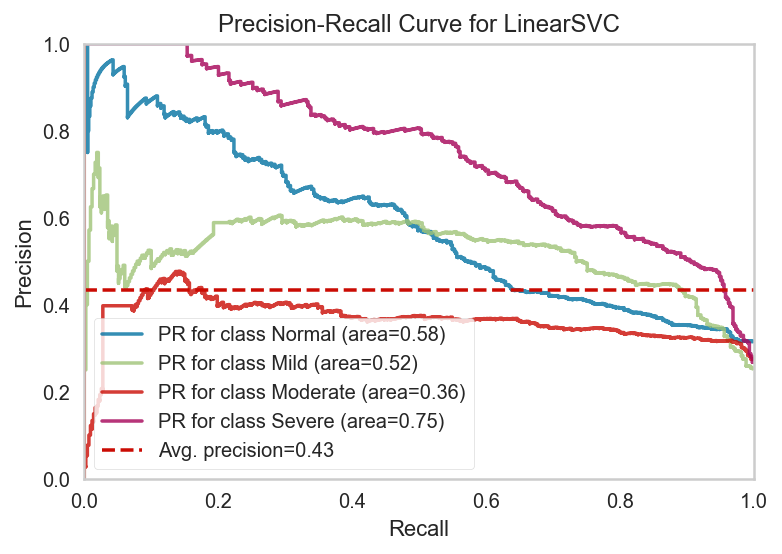

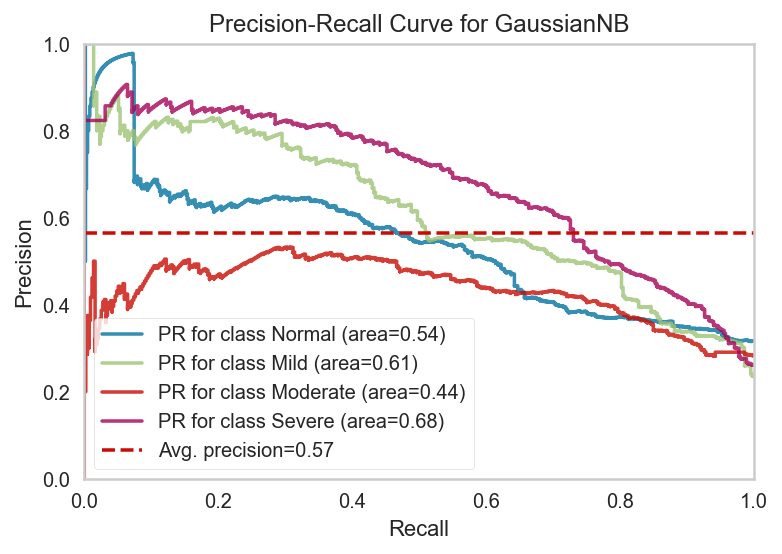

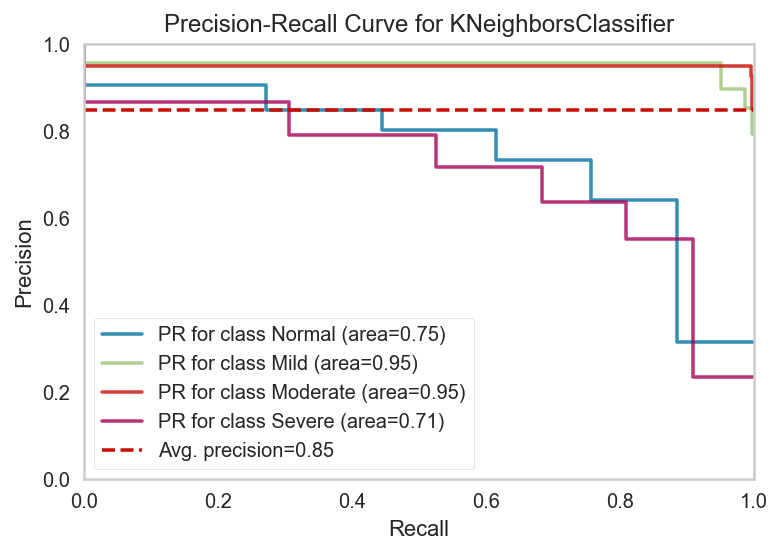

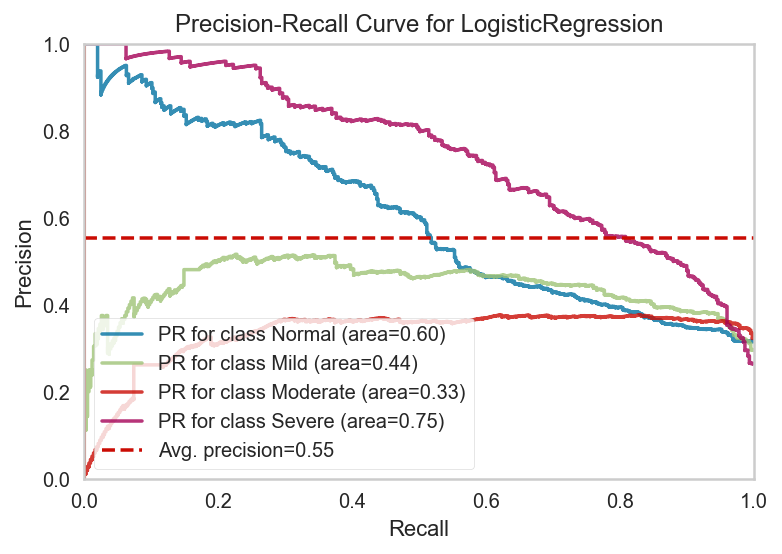

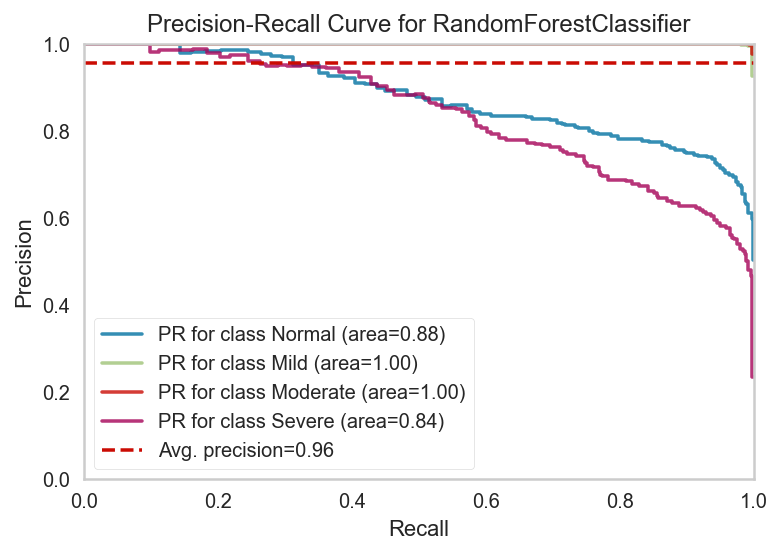

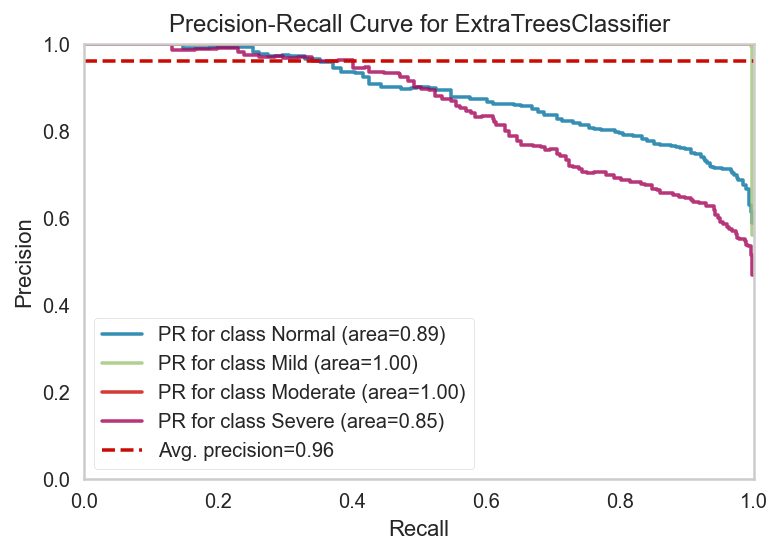

In [97]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [108]:
#Deploy aggregate metrics  
classifier_metrics()

DecisionTreeClassifier(random_state=0)
cohen_kappa_score: 0.755
log_loss: 6.327
zero_one_loss: 0.183
hemming_loss: 0.183
matthews_corrcoef: 0.755

------------------------------------------------------
SVC(random_state=0)
cohen_kappa_score: 0.379
log_loss: 0.000
zero_one_loss: 0.468
hemming_loss: 0.468
matthews_corrcoef: 0.384

------------------------------------------------------
LinearSVC(random_state=0)
cohen_kappa_score: 0.244
log_loss: 0.000
zero_one_loss: 0.586
hemming_loss: 0.586
matthews_corrcoef: 0.295

------------------------------------------------------
GaussianNB()
cohen_kappa_score: 0.409
log_loss: 1.559
zero_one_loss: 0.447
hemming_loss: 0.447
matthews_corrcoef: 0.420

------------------------------------------------------
KNeighborsClassifier()
cohen_kappa_score: 0.745
log_loss: 2.228
zero_one_loss: 0.191
hemming_loss: 0.191
matthews_corrcoef: 0.749

------------------------------------------------------
LogisticRegression(random_state=0)
cohen_kappa_score: 0.356
log_

In [109]:
df1

BQ  ESS       BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0      0   14  29.06593    88.0   174.0  57.5  39.0   96.0    106.0  20.0  1   
1      0    8  26.98962    78.0   170.0  57.0  36.0   90.0    100.0  20.0  1   
2      0   16  23.93948    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3      0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4      0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
...   ..  ...       ...     ...     ...   ...   ...    ...      ...   ... ..   
9573   0    9  28.92147    77.0   163.0  54.1  32.0   95.0    115.0  61.0  0   
9574   0    9  25.09116    72.0   170.0  57.8  36.0   84.0     97.0  33.0  1   
9575   0    9  24.29521    71.0   172.0  57.3  36.0   86.0     98.0  39.0  1   
9576   0   13  28.56268    83.0   171.0  58.8  42.0   91.0    101.0  36.0  1   
9577   0    4  27.93178    73.0   162.0  54.0  34.0   93.0    110.0  57.0  0   

      status  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
9573       2  
9574       2  
9575       2  
9576       2  
9577       2  

[9578 rows x 12 columns]

In [110]:
df1.describe()

BQ          ESS          BMI       Weight       Height  \
count  9578.000000  9578.000000  9578.000000  9578.000000  9578.000000   
mean      0.152119     9.476509    25.945434    72.873878   167.275945   
std       0.359155     5.184426     4.377741    14.416932     8.163118   
min       0.000000     0.000000    14.765500    37.000000   140.000000   
25%       0.000000     6.000000    23.274365    65.000000   162.000000   
50%       0.000000     9.000000    25.342710    72.000000   168.000000   
75%       0.000000    13.000000    27.816097    79.000000   173.000000   
max       1.000000    48.000000    59.637310   161.000000   198.000000   

              Head         Neck        Waist      Buttock          Age  \
count  9578.000000  9578.000000  9578.000000  9578.000000  9578.000000   
mean     56.201169    36.848925    88.869701    99.892671    44.131969   
std       1.967288     3.652557    11.113384     8.185140    12.259248   
min      47.000000    26.000000    56.000000    70.000000    20.000000   
25%      55.000000    35.000000    83.000000    95.000000    34.000000   
50%      56.200000    37.000000    88.000000    99.000000    42.000000   
75%      57.500000    38.000000    94.000000   104.000000    55.000000   
max      66.000000    57.000000   156.000000   150.000000    80.000000   

                 M       status  
count  9578.000000  9578.000000  
mean      0.650449     1.407601  
std       0.476853     1.150143  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     1.000000  
75%       1.000000     2.000000  
max       1.000000     3.000000

#### CASE-2

In [111]:
df2=pd.read_csv('preprocessed_datset.csv') 
df2.head()


BQ  ESS        BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0   0   14  29.065927    88.0   174.0  57.5  39.0   95.5    106.5  20.0  1   
1   0    8  26.989619    78.0   170.0  57.0  36.5   90.0    100.0  20.0  1   
2   0   16  23.939481    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3   0   15  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4   0   15  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   

   status  
0       0  
1       0  
2       0  
3       0  
4       0

In [112]:
p=df2.drop('status',axis=1)
q=df2['status']

In [113]:
oversample = SMOTE()
p, q = oversample.fit_resample(p, q)

Class=0, n=2884 (25.000%)
Class=3, n=2884 (25.000%)
Class=2, n=2884 (25.000%)
Class=1, n=2884 (25.000%)


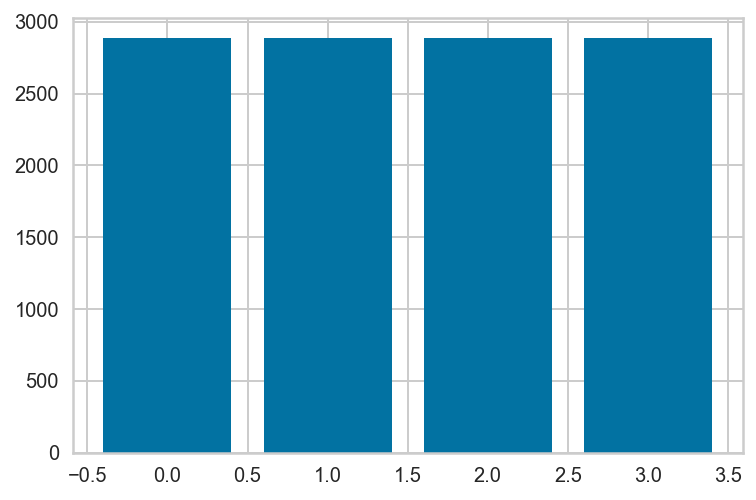

In [114]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(q)
for k,v in counter.items():
	per = v / len(q) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Text(0, 0.5, 'Frequency')

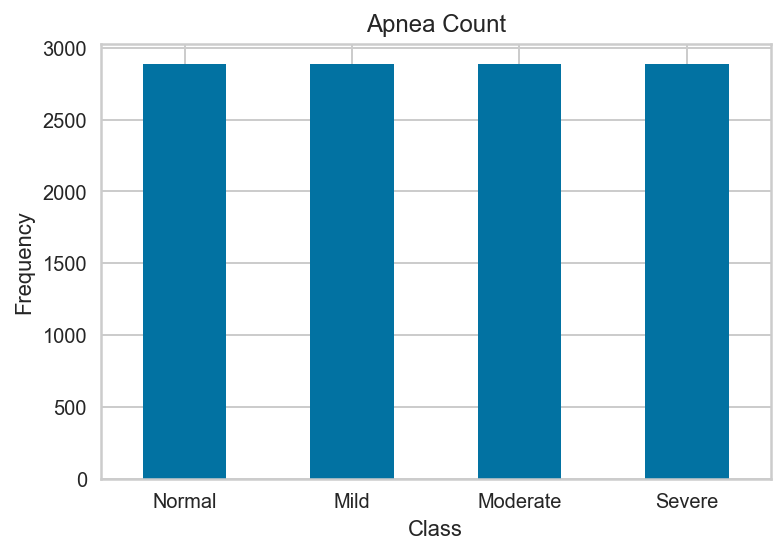

In [115]:
LABELS = ["Normal", "Mild","Moderate","Severe"]

count_classes = pd.value_counts(q, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Apnea Count")

plt.xticks(range(4), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

0    2884
3    2884
2    2884
1    2884
Name: status, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

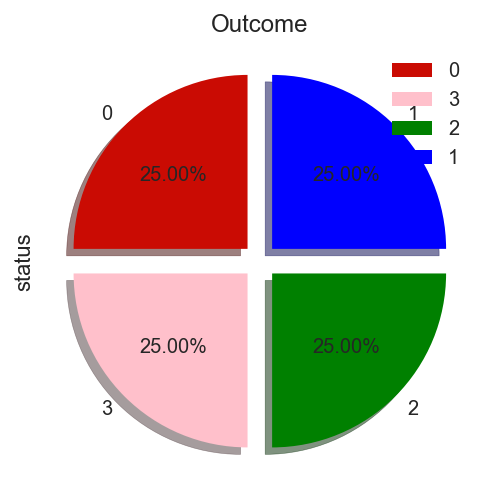

In [116]:
print(q.value_counts())
color=['r',"pink","green","blue"]
q.value_counts().plot.pie(colors=color,startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%').set_title('Outcome')
plt.legend()
plt.show

In [119]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(p,q)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(p.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

      Specs        Score
3    Weight  7028.466193
7     Waist  4808.670672
9       Age  3297.752247
2       BMI  1716.831315
1       ESS  1267.422211
6      Neck  1098.857615
8   Buttock  1098.080624
0        BQ   628.948187
10        M   444.591756
4    Height   268.618163
5      Head    63.117477


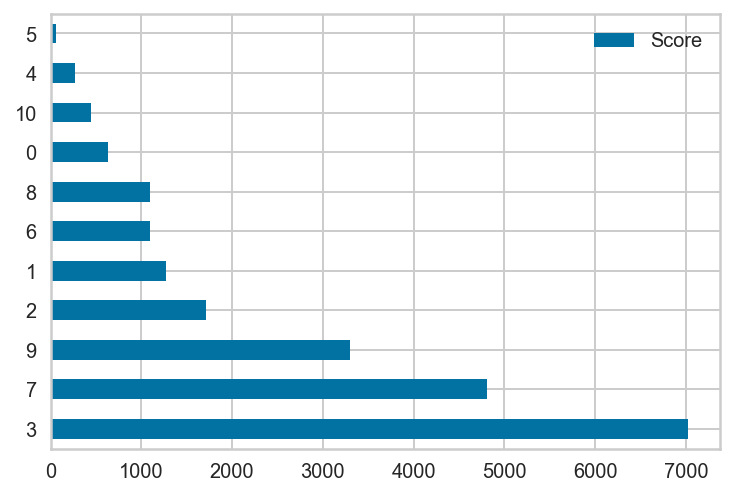

In [120]:
featureScores.nlargest(12,'Score').plot(kind='barh')
plt.show()

[0.02850769 0.09514469 0.09565291 0.09339346 0.09875257 0.09630912
 0.09823627 0.13429837 0.08405075 0.13008826 0.0455659 ]


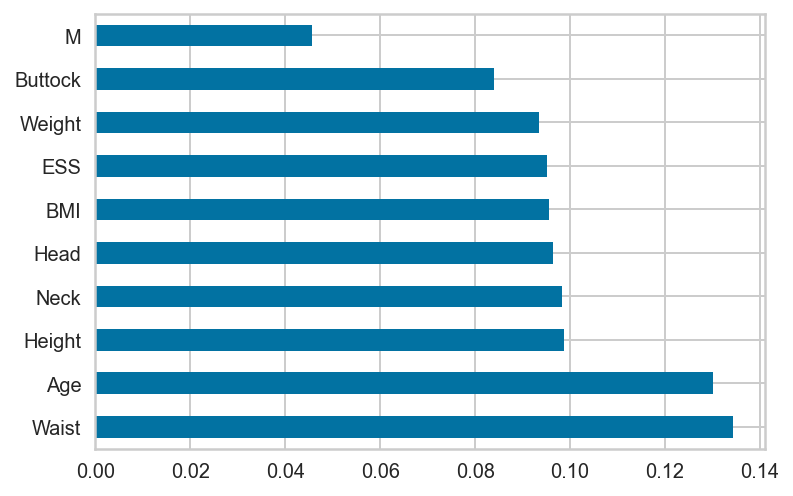

In [121]:
model = ExtraTreesClassifier()
model.fit(p,q)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [122]:
p

BQ  ESS        BMI      Weight      Height       Head       Neck  \
0       0   14  29.065927   88.000000  174.000000  57.500000  39.000000   
1       0    8  26.989619   78.000000  170.000000  57.000000  36.500000   
2       0   16  23.939481   75.000000  177.000000  59.000000  39.000000   
3       0   15  22.129740   67.000000  174.000000  57.000000  35.000000   
4       0   15  22.129740   67.000000  174.000000  57.000000  35.000000   
...    ..  ...        ...         ...         ...        ...        ...   
11531   0   16  29.486496   98.833438  183.066750  57.116656  41.513287   
11532   0   11  25.073825   65.576373  161.729119  55.096539  35.749285   
11533   0    6  28.666129   96.000000  183.000000  58.000000  39.400730   
11534   0   15  28.731747   85.000000  172.000000  60.240374  39.759626   
11535   0    1  45.263555  140.202293  176.055964  60.973028  46.134862   

            Waist     Buttock        Age  M  
0       95.500000  106.500000  20.000000  1  
1       90.000000  100.000000  20.000000  1  
2       88.000000  104.000000  20.000000  1  
3       74.000000   94.000000  20.000000  1  
4       74.000000   94.000000  20.000000  1  
...           ...         ...        ... ..  
11531  110.733312  109.416719  55.533375  1  
11532   91.288186   95.729119  60.847254  1  
11533   99.330900  108.334550  36.330900  1  
11534  102.557756  104.557756  63.077007  1  
11535  146.055964  132.011467  42.865138  1  

[11536 rows x 11 columns]

In [123]:
q

0        0
1        0
2        0
3        0
4        0
        ..
11531    3
11532    3
11533    3
11534    3
11535    3
Name: status, Length: 11536, dtype: int64

In [124]:
df2 = pd.concat([p,q],axis='columns')
df2

BQ  ESS        BMI      Weight      Height       Head       Neck  \
0       0   14  29.065927   88.000000  174.000000  57.500000  39.000000   
1       0    8  26.989619   78.000000  170.000000  57.000000  36.500000   
2       0   16  23.939481   75.000000  177.000000  59.000000  39.000000   
3       0   15  22.129740   67.000000  174.000000  57.000000  35.000000   
4       0   15  22.129740   67.000000  174.000000  57.000000  35.000000   
...    ..  ...        ...         ...         ...        ...        ...   
11531   0   16  29.486496   98.833438  183.066750  57.116656  41.513287   
11532   0   11  25.073825   65.576373  161.729119  55.096539  35.749285   
11533   0    6  28.666129   96.000000  183.000000  58.000000  39.400730   
11534   0   15  28.731747   85.000000  172.000000  60.240374  39.759626   
11535   0    1  45.263555  140.202293  176.055964  60.973028  46.134862   

            Waist     Buttock        Age  M  status  
0       95.500000  106.500000  20.000000  1       0  
1       90.000000  100.000000  20.000000  1       0  
2       88.000000  104.000000  20.000000  1       0  
3       74.000000   94.000000  20.000000  1       0  
4       74.000000   94.000000  20.000000  1       0  
...           ...         ...        ... ..     ...  
11531  110.733312  109.416719  55.533375  1       3  
11532   91.288186   95.729119  60.847254  1       3  
11533   99.330900  108.334550  36.330900  1       3  
11534  102.557756  104.557756  63.077007  1       3  
11535  146.055964  132.011467  42.865138  1       3  

[11536 rows x 12 columns]

In [125]:
df2=df2.round({'BQ' : 0,'ESS' : 0,'BMI' : 5,'Weight' : 0,'Height' : 0,'Head' : 1,'Neck' : 0,'Waist' : 0,'Buttock' : 0,'Age' : 0,'M' : 0,'status' : 0,})

In [126]:
df2

BQ  ESS       BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0       0   14  29.06593    88.0   174.0  57.5  39.0   96.0    106.0  20.0  1   
1       0    8  26.98962    78.0   170.0  57.0  36.0   90.0    100.0  20.0  1   
2       0   16  23.93948    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3       0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4       0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
...    ..  ...       ...     ...     ...   ...   ...    ...      ...   ... ..   
11531   0   16  29.48650    99.0   183.0  57.1  42.0  111.0    109.0  56.0  1   
11532   0   11  25.07382    66.0   162.0  55.1  36.0   91.0     96.0  61.0  1   
11533   0    6  28.66613    96.0   183.0  58.0  39.0   99.0    108.0  36.0  1   
11534   0   15  28.73175    85.0   172.0  60.2  40.0  103.0    105.0  63.0  1   
11535   0    1  45.26355   140.0   176.0  61.0  46.0  146.0    132.0  43.0  1   

       status  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
11531       3  
11532       3  
11533       3  
11534       3  
11535       3  

[11536 rows x 12 columns]

In [127]:
df2.describe()

BQ           ESS           BMI        Weight        Height  \
count  11536.000000  11536.000000  11536.000000  11536.000000  11536.000000   
mean       0.133842      9.444782     26.025743     73.260229    167.482750   
std        0.340497      5.102647      4.322666     14.193599      7.999375   
min        0.000000      0.000000     14.765500     37.000000    140.000000   
25%        0.000000      6.000000     23.409580     66.000000    163.000000   
50%        0.000000      9.000000     25.390620     73.000000    168.000000   
75%        0.000000     13.000000     27.877980     79.000000    173.000000   
max        1.000000     48.000000     59.637310    161.000000    198.000000   

              Head          Neck         Waist       Buttock           Age  \
count  11536.00000  11536.000000  11536.000000  11536.000000  11536.000000   
mean      56.25404     36.927358     89.114771    100.081917     44.058859   
std        1.92952      3.603557     10.935013      8.070107     12.129095   
min       47.00000     26.000000     56.000000     70.000000     20.000000   
25%       55.00000     35.000000     83.000000     95.000000     34.000000   
50%       56.30000     37.000000     88.000000    100.000000     42.000000   
75%       57.50000     38.000000     94.000000    104.000000     55.000000   
max       66.00000     57.000000    156.000000    150.000000     80.000000   

                  M        status  
count  11536.000000  11536.000000  
mean       0.656120      1.500000  
std        0.475022      1.118082  
min        0.000000      0.000000  
25%        0.000000      0.750000  
50%        1.000000      1.500000  
75%        1.000000      2.250000  
max        1.000000      3.000000

In [128]:
df2.to_csv('D:\MAJOR PROJECT\datasets\sampled1_dataset.csv')

In [129]:
p=df2.drop('status',axis=1)
q=df2['status']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (9228, 11)
y_train (9228,)
X_test (2308, 11)
y_test (2308,)


In [131]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)
  #precision    = precision_score(y_test, y_pred1)
 # recall       = recall_score(y_test, y_pred1)
 # f1score      = f1_score(y_test, y_pred1) 
 # rocauc       = roc_auc_score(y_test, y_pred1)
  #logloss      = log_loss(y_test, y_pred1)
  accuracy     = accuracy_score(y_test, y_pred1)
  classification=classification_report(y_test, y_pred1)
  confusion    = confusion_matrix(y_test, y_pred1)
  df_model2 = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                           'classification':[classification],
                             #'precision'    : [precision],
                             #'recall'       : [recall],
                             #'f1score'      : [f1score],
                             #'rocauc'       : [rocauc],
                            # 'logloss'      : [logloss],
                             'timetaken'    : [time2],
                            'confusionmatrix' : [confusion]
                            
                                }) 
  return df_model2

In [132]:
%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier(random_state=0)
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model11 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model11.timetaken[0] = time.time() - time2
print("Random Forest")
print(base_model.get_params())
print(model1)



base model
Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
          model  accuracy                                     classification  \
0  RandomForest  0.873695                precision    recall  f1-score   ...   

   timetaken                                    confusionmatrix  
0   0.719567  [[488, 3, 5, 108], [2, 428, 0, 0], [0, 0, 433,...  
Wall time: 820 ms


In [133]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model12 = ExtraTreesClassifier(random_state=0)
base_model12.fit(X_train, y_train)
model12 = evaluate(base_model12,  X_test,  y_test, 'Extra Tree')
model12.timetaken[0] = time.time() - time2
print("Extra Tree")
print(base_model12.get_params())

base model
Extra Tree
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Wall time: 572 ms


In [134]:
%%time
time2=time.time()
print("base model")
base_model13 = LogisticRegression(random_state=0)
base_model13.fit(X_train, y_train)
model13 = evaluate(base_model13,  X_test,  y_test, 'Logistic Regression')
model13.timetaken[0] = time.time() - time2
print("Logoistic Regression")
print(base_model13.get_params())

base model
Logoistic Regression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Wall time: 381 ms


In [135]:
%%time
time2=time.time()
print("base model")
base_model14 = KNeighborsClassifier()
base_model14.fit(X_train, y_train)
model14 = evaluate(base_model14,  X_test,  y_test, 'KNN')
model14.timetaken[0] = time.time() - time2
print("KNN")
print(base_model14.get_params())

base model
KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Wall time: 113 ms


In [136]:
%%time
time2=time.time()
print("base model")
base_model15 = LinearSVC(random_state=0)
base_model15.fit(X_train, y_train)
model15 = evaluate(base_model15,  X_test,  y_test, 'LinearSVC')
model15.timetaken[0] = time.time() - time2
print("LinearSVC")
print(base_model15.get_params())

base model
LinearSVC
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}
Wall time: 1.32 s


In [137]:
%%time
time2=time.time()
print("base model")
base_model16 = GaussianNB()
base_model16.fit(X_train, y_train)
model16 = evaluate(base_model16,  X_test,  y_test, 'GaussianNB')
model16.timetaken[0] = time.time() - time2
print("GaussianNB")
print(base_model16.get_params())

base model
GaussianNB
{'priors': None, 'var_smoothing': 1e-09}
Wall time: 19 ms


In [138]:
%%time
time2=time.time()
print("base model")
base_model17=SVC(random_state=0)
base_model17.fit(X_train, y_train)
model17 = evaluate(base_model17,  X_test,  y_test, 'SVC')
model17.timetaken[0] = time.time() - time2
print("SVC")
print(base_model17.get_params())

base model
SVC
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Wall time: 3.88 s


In [139]:
%%time
time2=time.time()
print("base model")
base_model18=DecisionTreeClassifier(random_state=0)
base_model18.fit(X_train, y_train)
model18 = evaluate(base_model18,  X_test,  y_test, 'Decision Tree')
model18.timetaken[0] = time.time() - time2
print("Decision Tree")
print(base_model18.get_params())


base model
Decision Tree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
Wall time: 46 ms


In [140]:
df_base2= pd.concat([model11,model12,model13,model14,model15,model16,model17,model18],axis = 0).reset_index()
df_base2.drop('index', axis=1, inplace=True)
df_base2

model  accuracy  \
0         RandomForest  0.910745   
1           Extra Tree  0.903813   
2  Logistic Regression  0.522964   
3                  KNN  0.831023   
4            LinearSVC  0.313692   
5           GaussianNB  0.575823   
6                  SVC  0.561958   
7        Decision Tree  0.862218   

                                      classification  timetaken  \
0                precision    recall  f1-score   ...   0.820323   
1                precision    recall  f1-score   ...   0.572246   
2                precision    recall  f1-score   ...   0.380659   
3                precision    recall  f1-score   ...   0.112811   
4                precision    recall  f1-score   ...   1.323091   
5                precision    recall  f1-score   ...   0.019033   
6                precision    recall  f1-score   ...   3.875884   
7                precision    recall  f1-score   ...   0.045983   

                                     confusionmatrix  
0  [[487, 1, 1, 99], [2, 602, 0, 0], [0, 0, 544, ...  
1  [[475, 2, 2, 109], [2, 602, 0, 0], [0, 0, 544,...  
2  [[169, 171, 129, 119], [108, 310, 142, 44], [5...  
3  [[337, 74, 43, 134], [0, 602, 2, 0], [0, 0, 54...  
4  [[576, 1, 0, 11], [604, 0, 0, 0], [544, 0, 0, ...  
5  [[196, 221, 84, 87], [63, 464, 68, 9], [66, 13...  
6  [[155, 209, 122, 102], [38, 388, 141, 37], [26...  
7  [[421, 10, 14, 143], [14, 588, 0, 2], [0, 1, 5...

In [141]:
classifiers=[
DecisionTreeClassifier(random_state=0),
SVC(random_state=0),
GaussianNB(),
KNeighborsClassifier(),
LogisticRegression(random_state=0),
RandomForestClassifier(random_state=0),
ExtraTreesClassifier(random_state=0)]

In [142]:
classes =  ["Normal", "Mild","Moderate","Severe"]
classes

['Normal', 'Mild', 'Moderate', 'Severe']

In [143]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


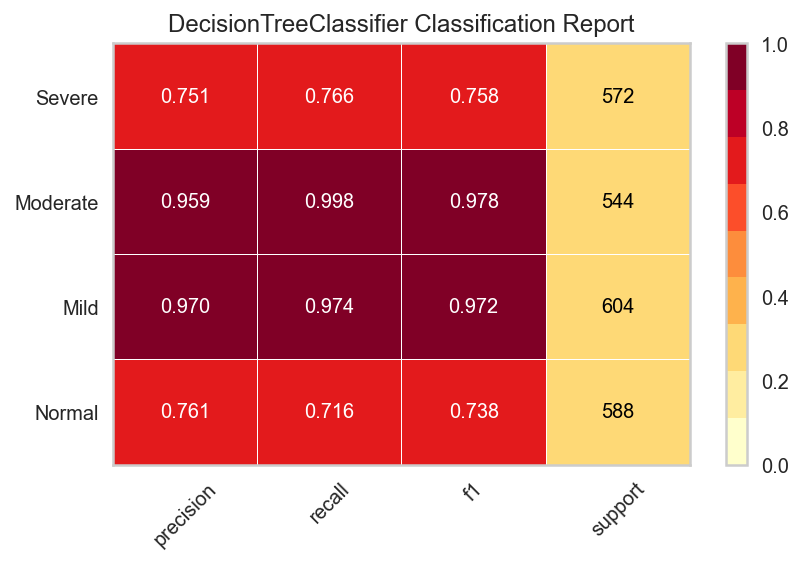

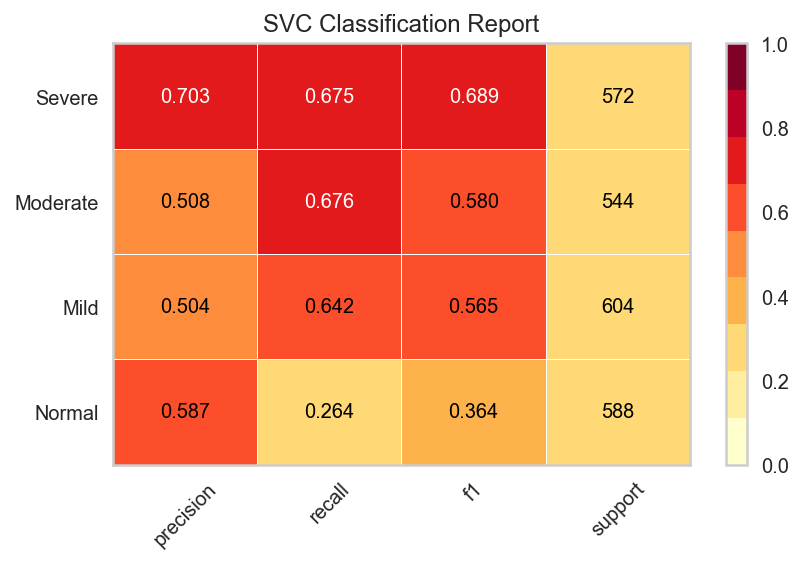

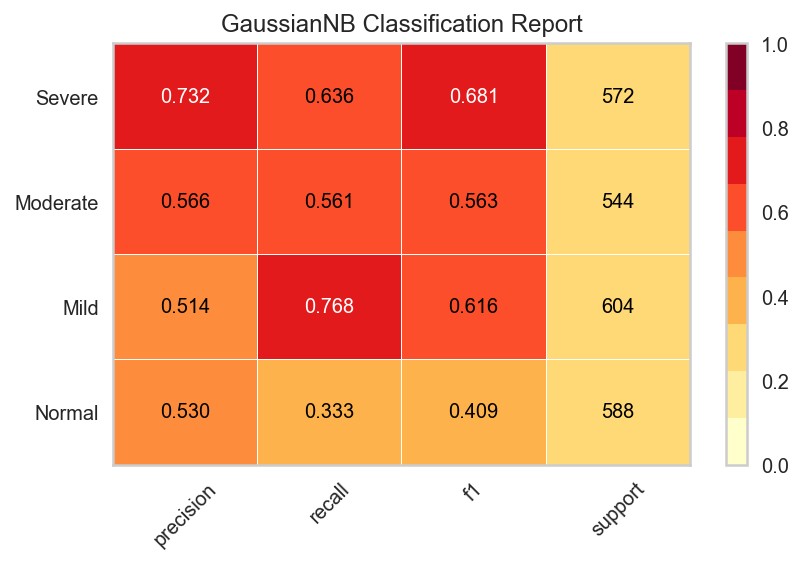

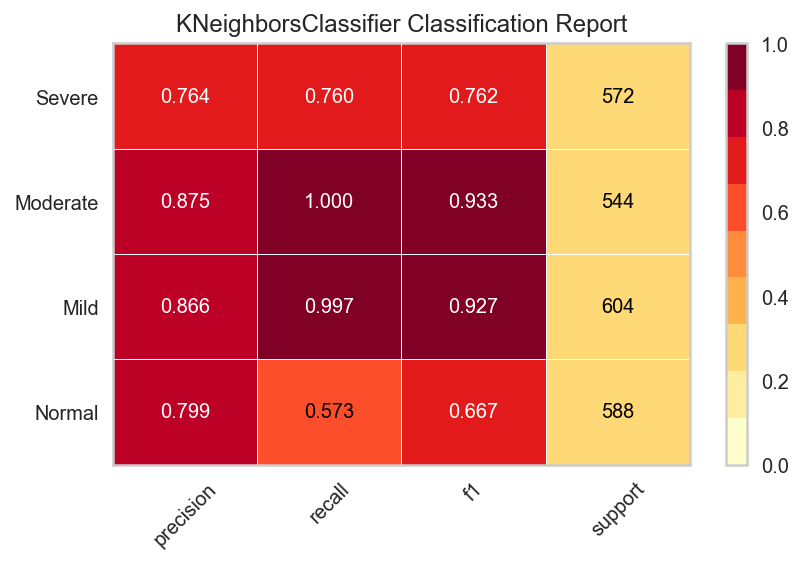

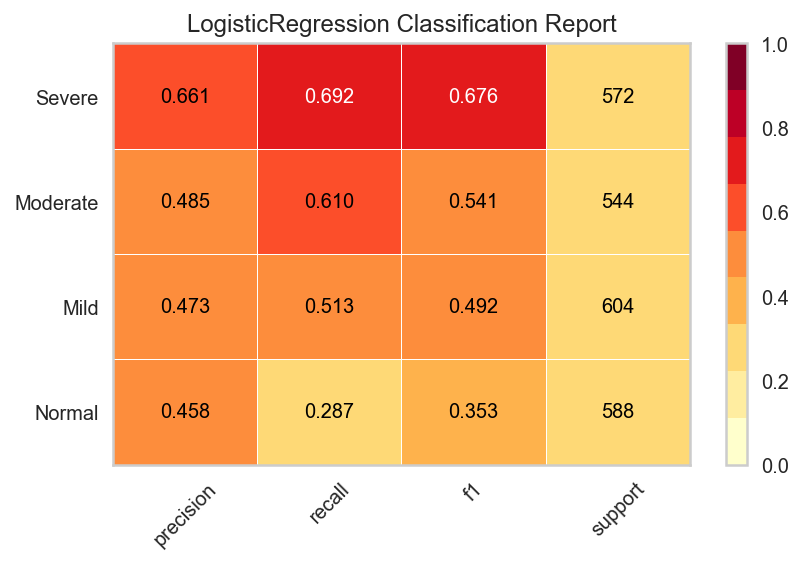

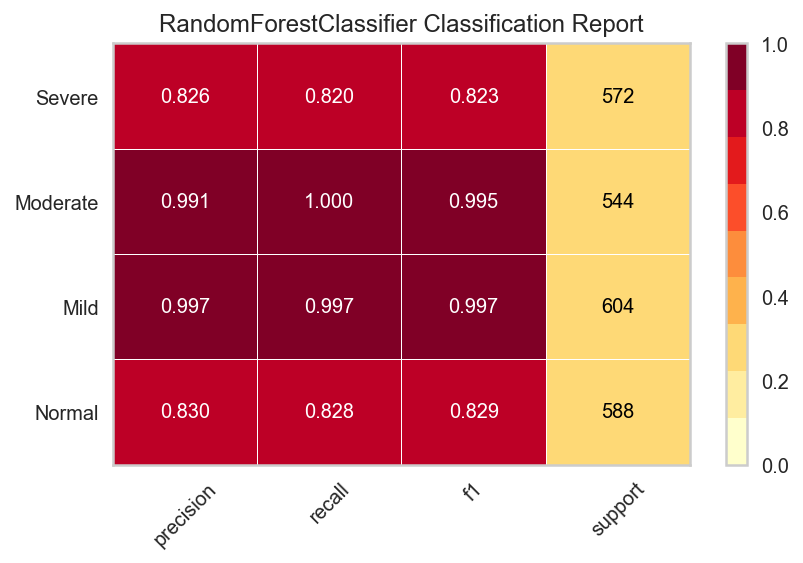

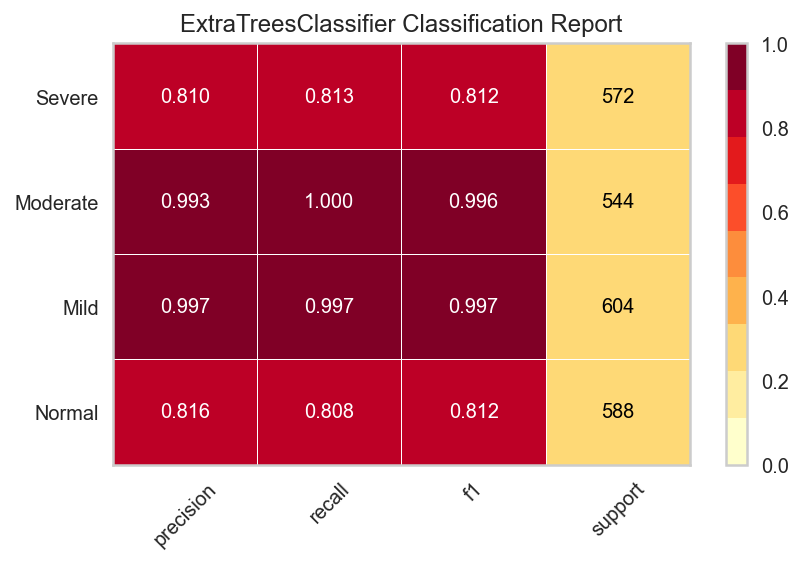

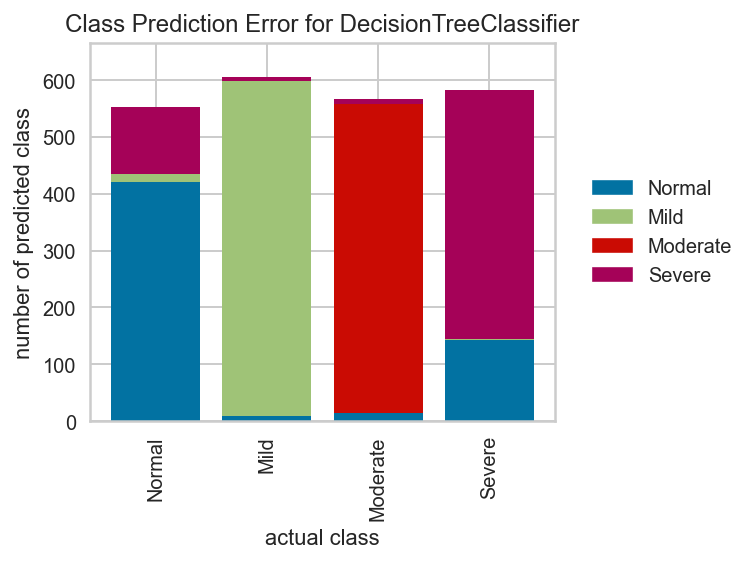

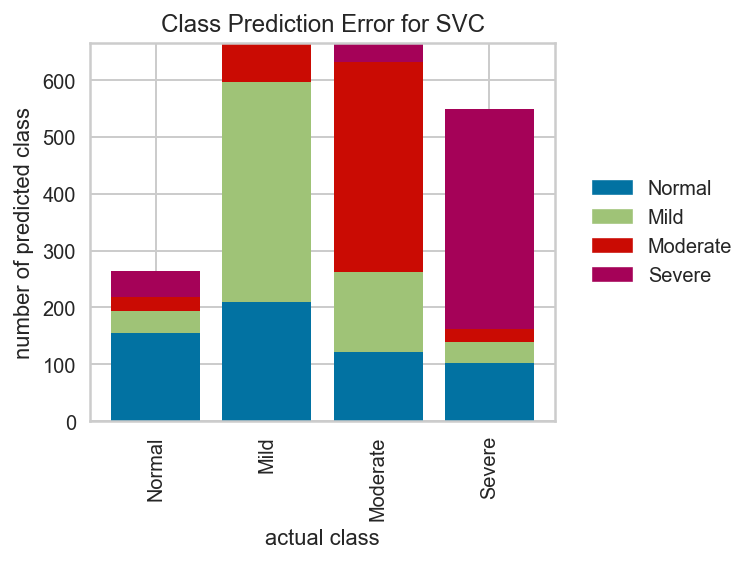

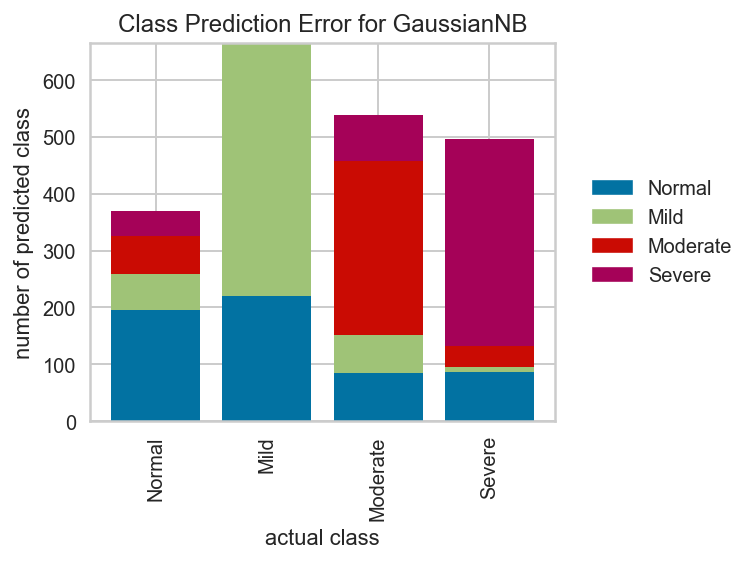

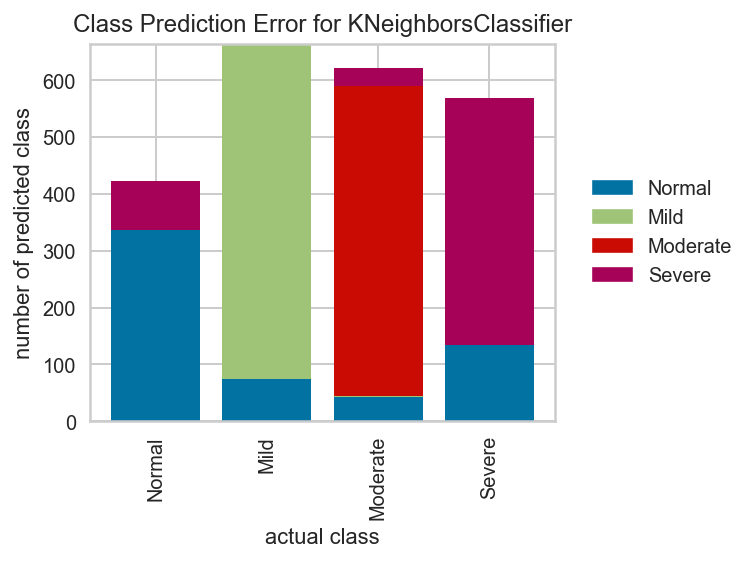

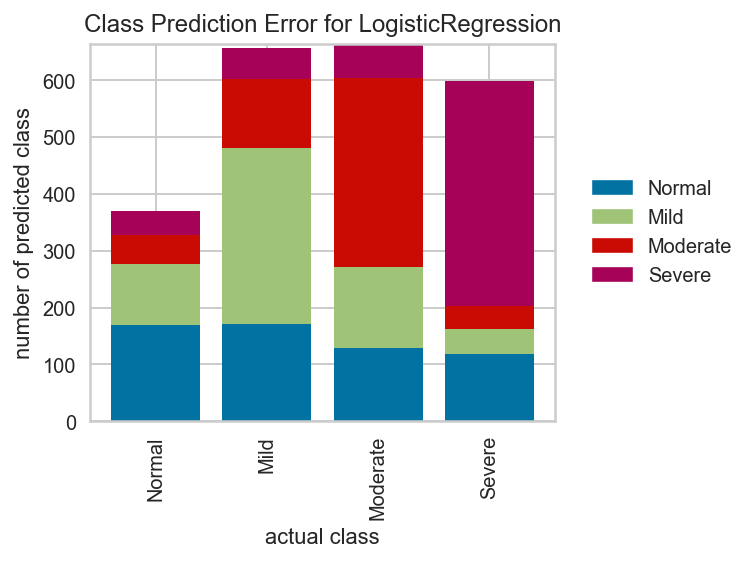

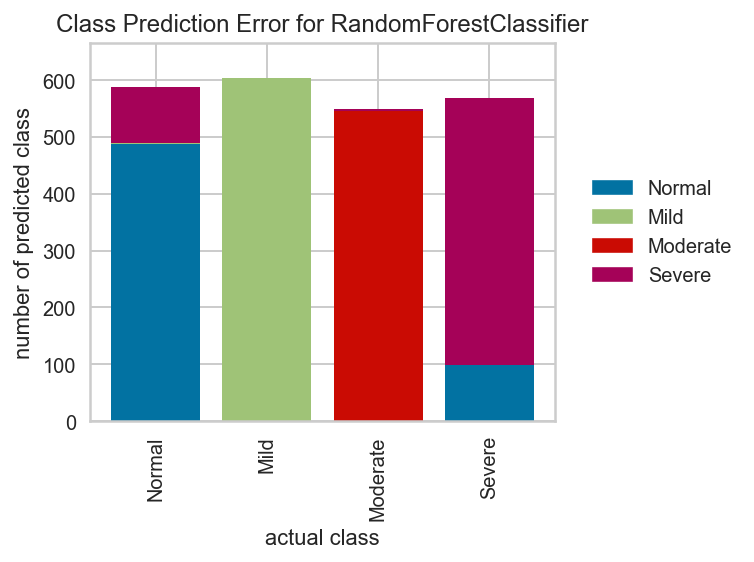

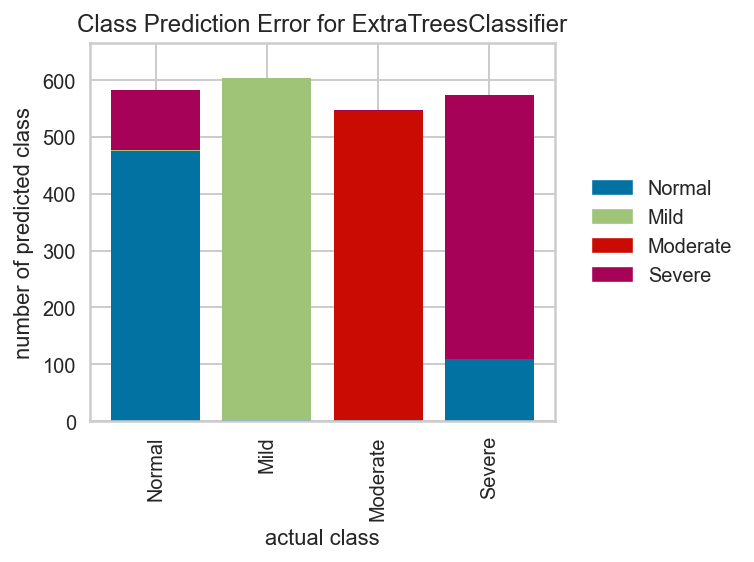

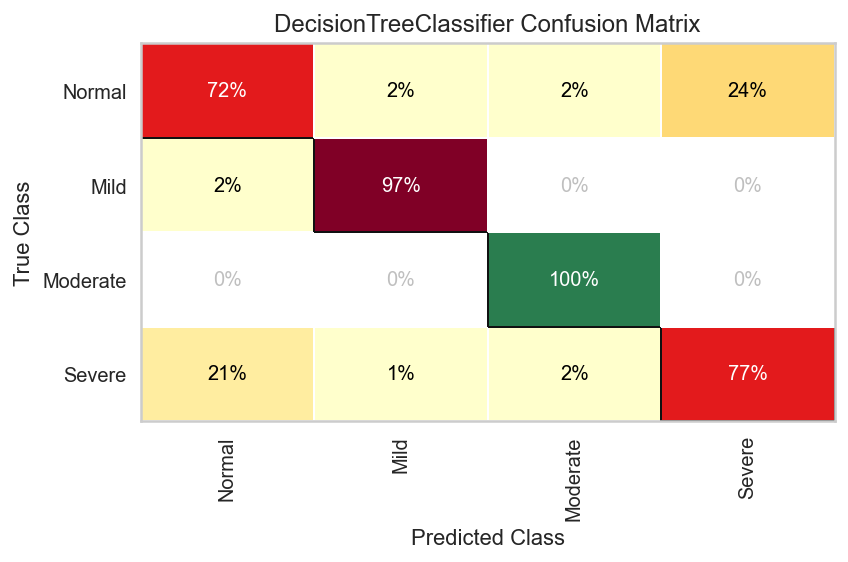

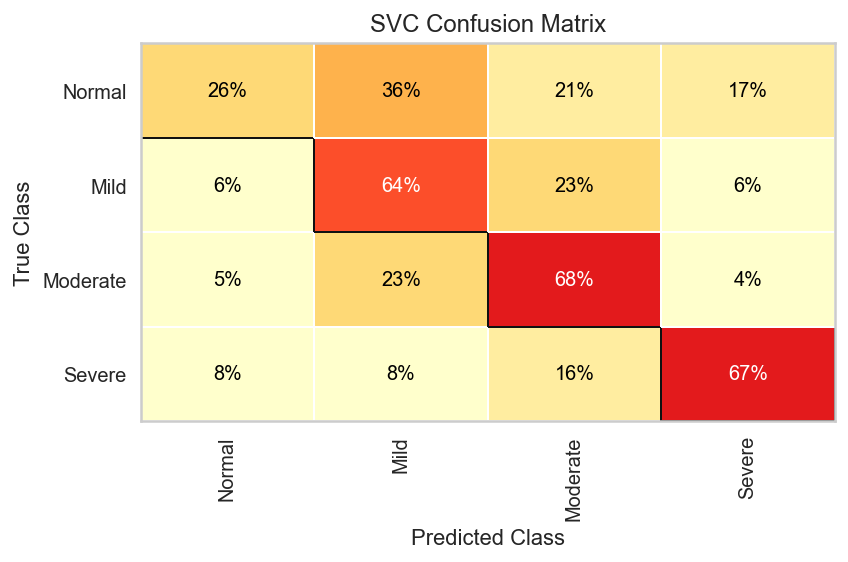

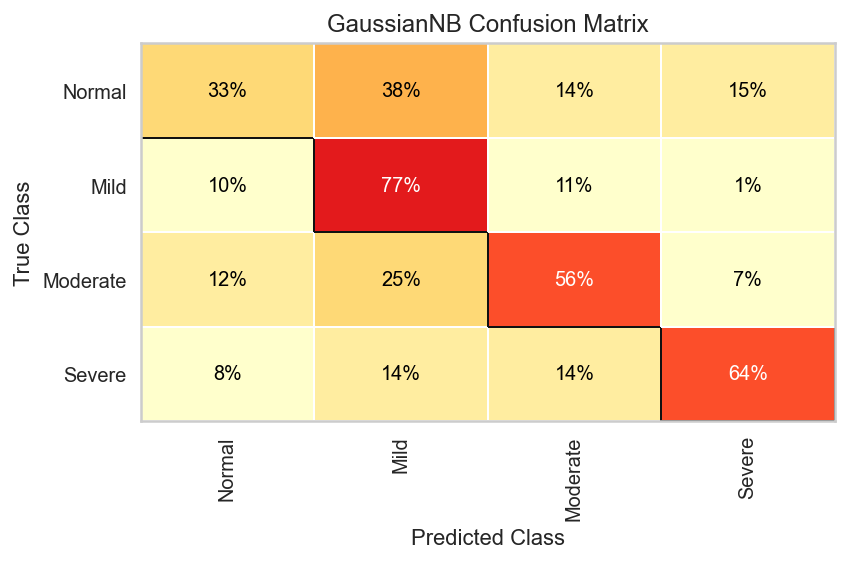

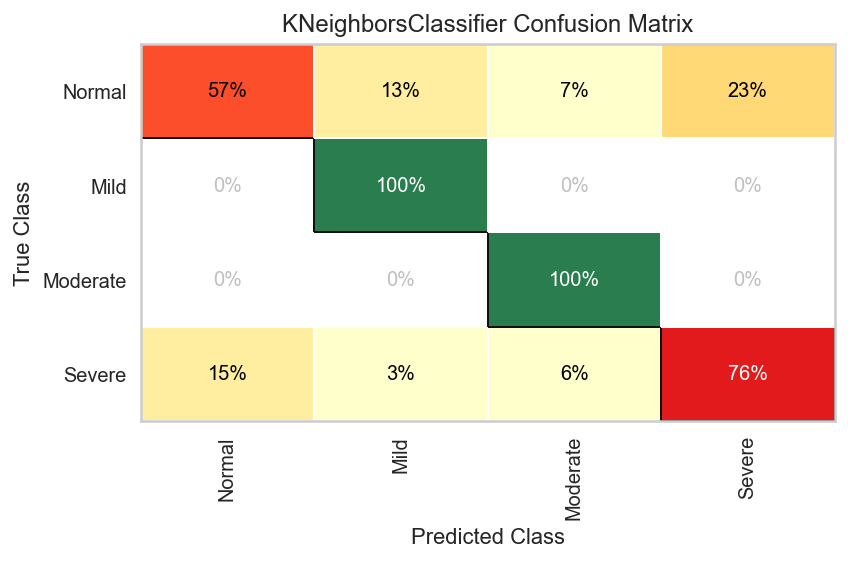

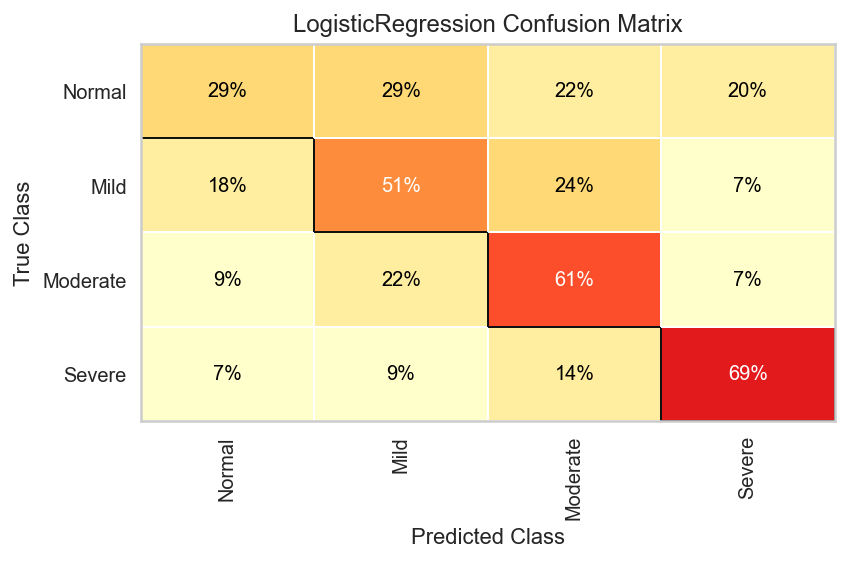

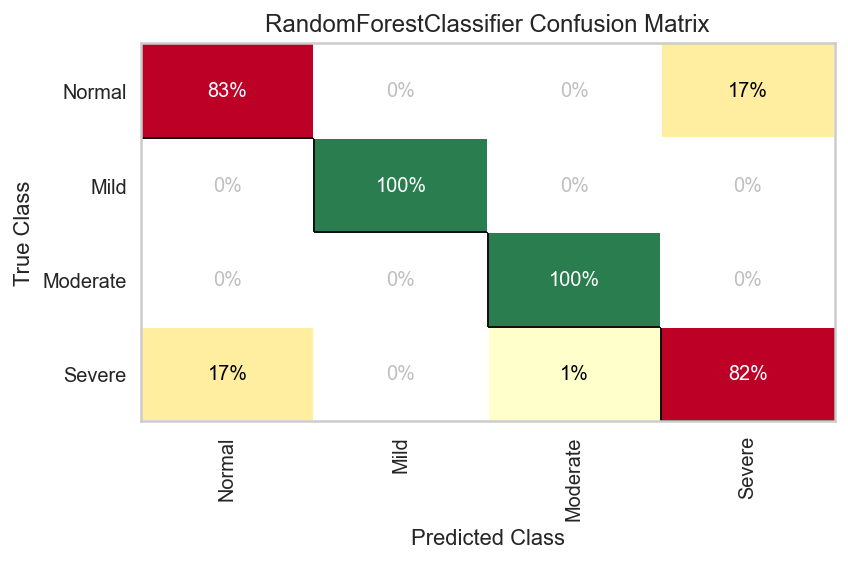

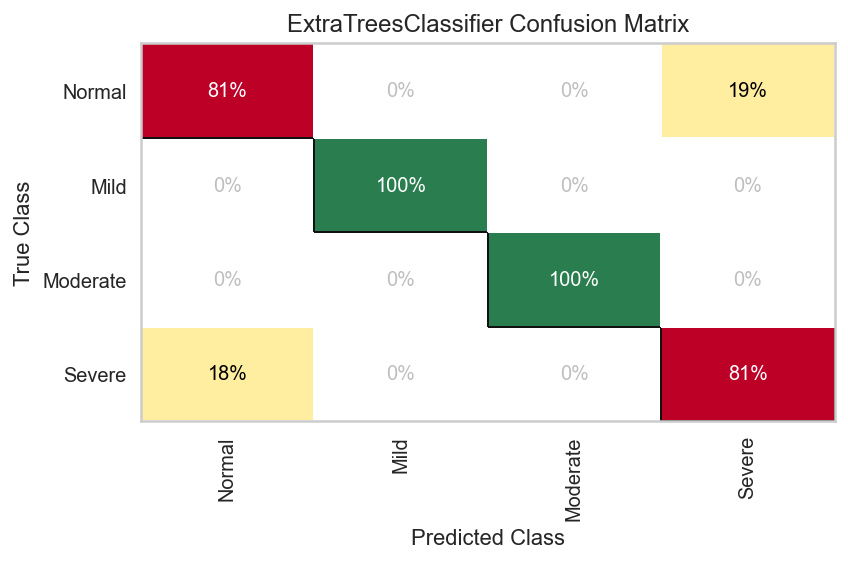

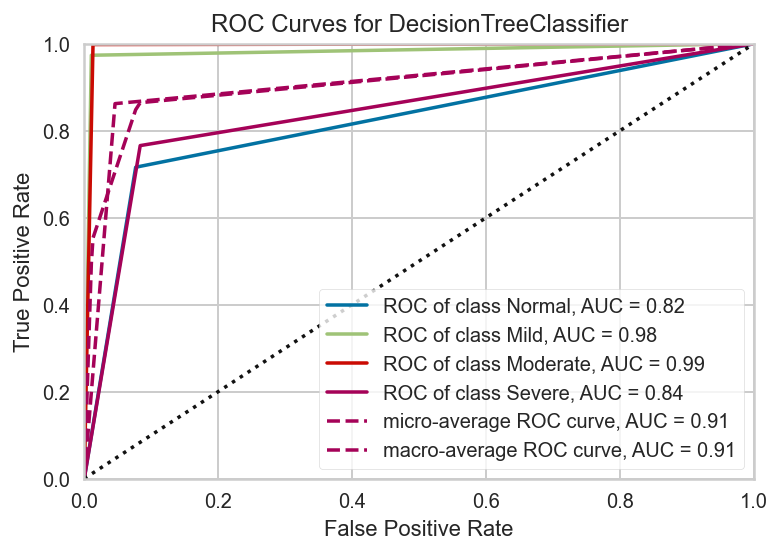

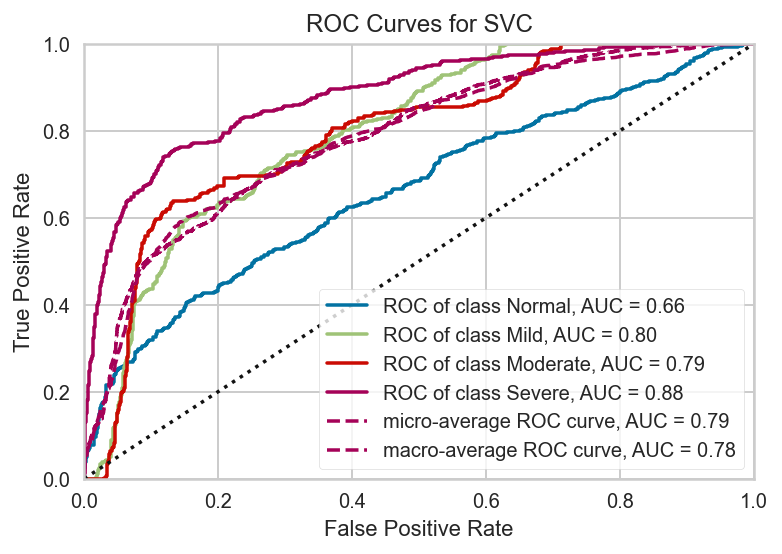

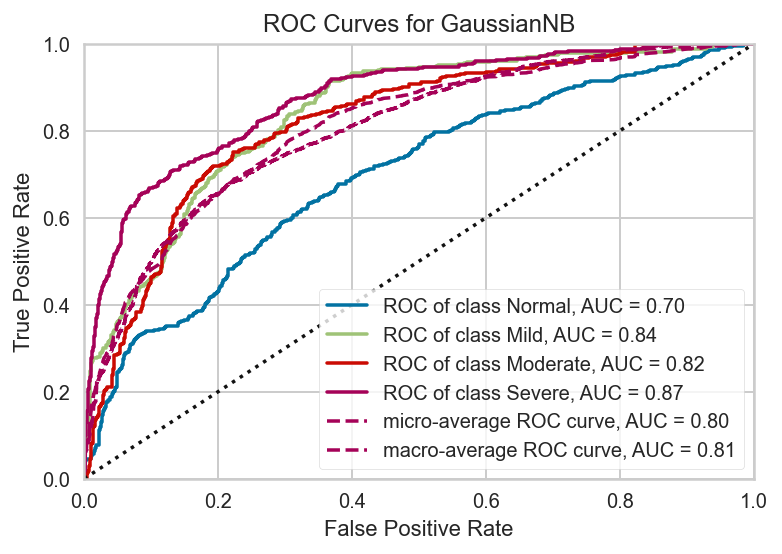

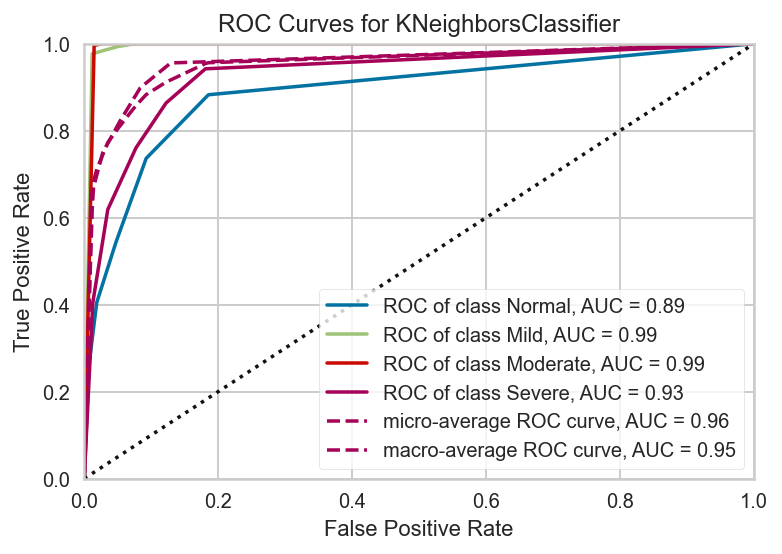

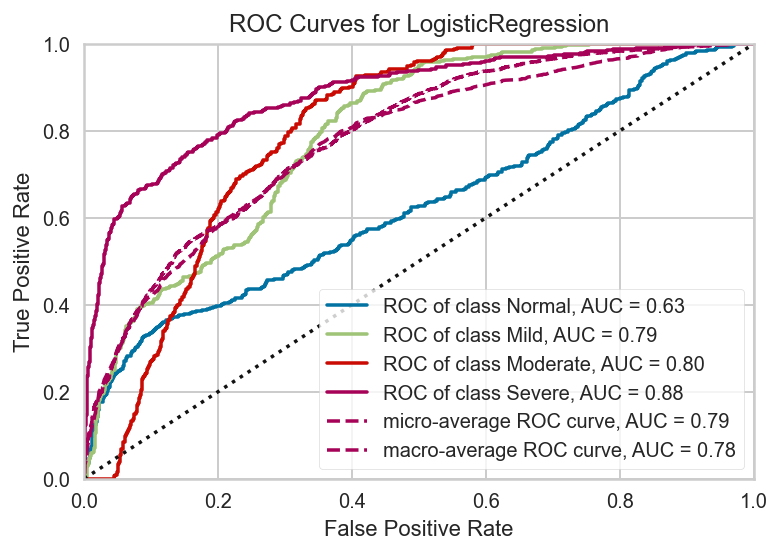

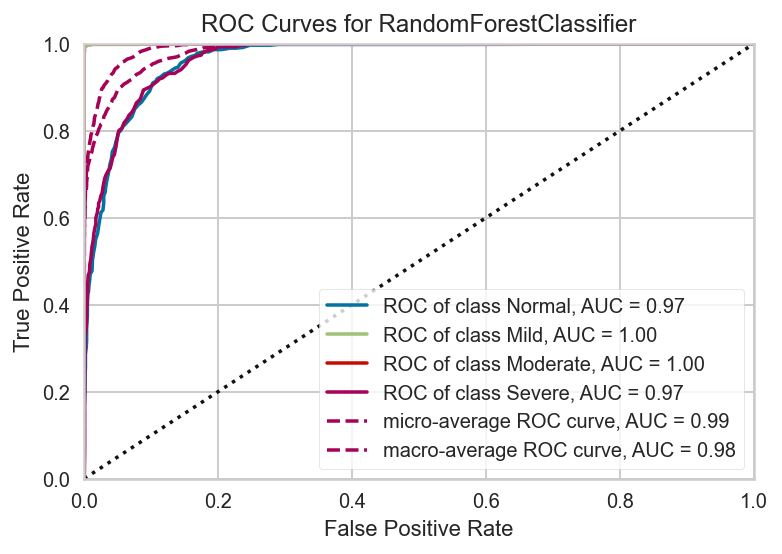

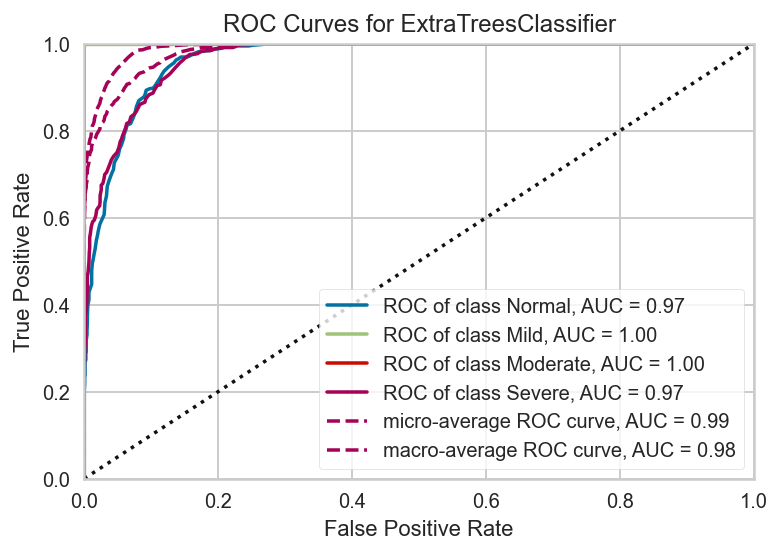

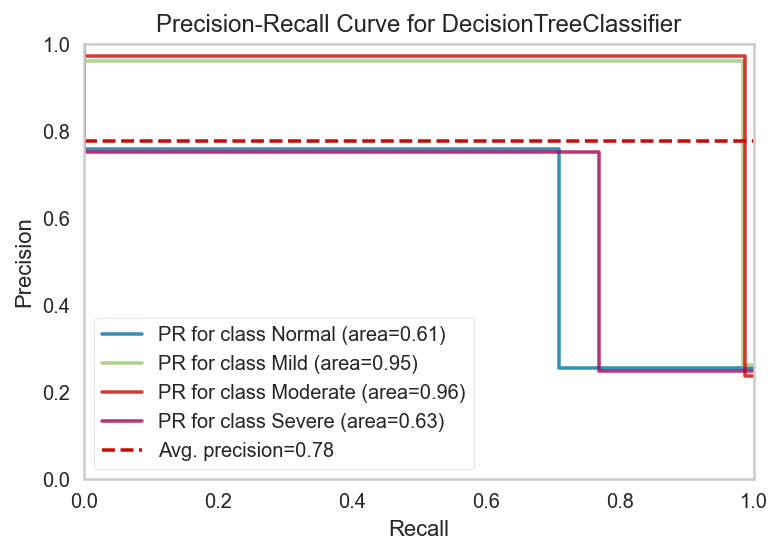

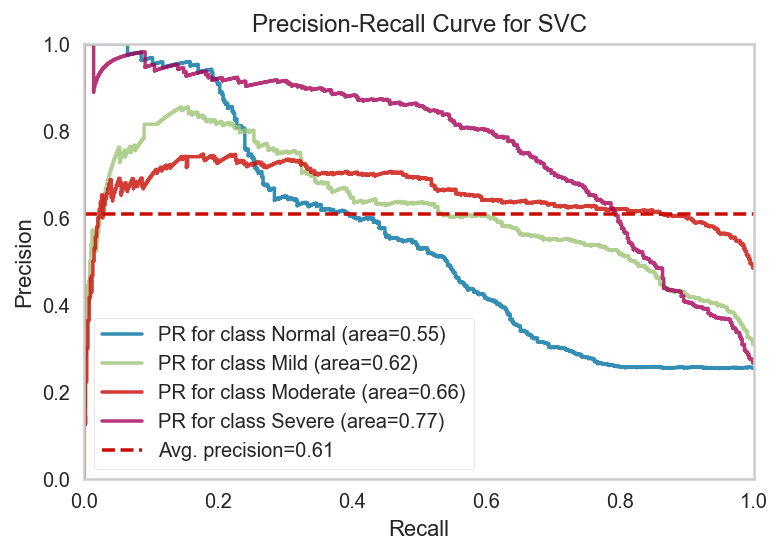

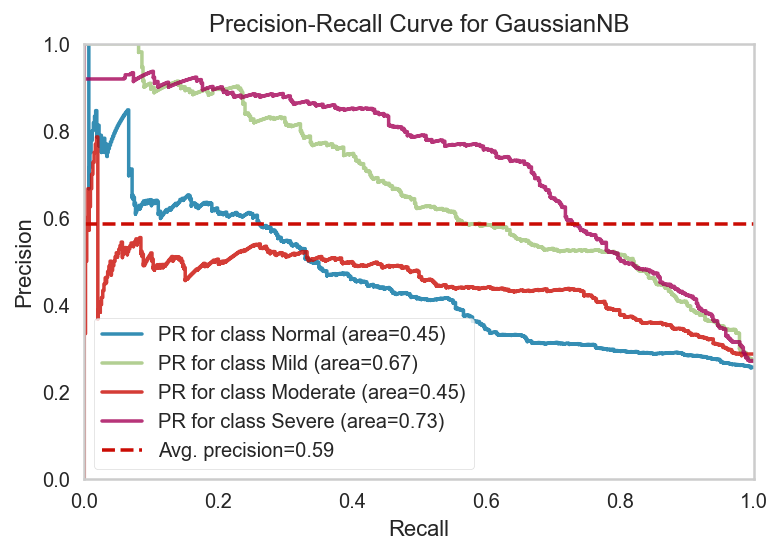

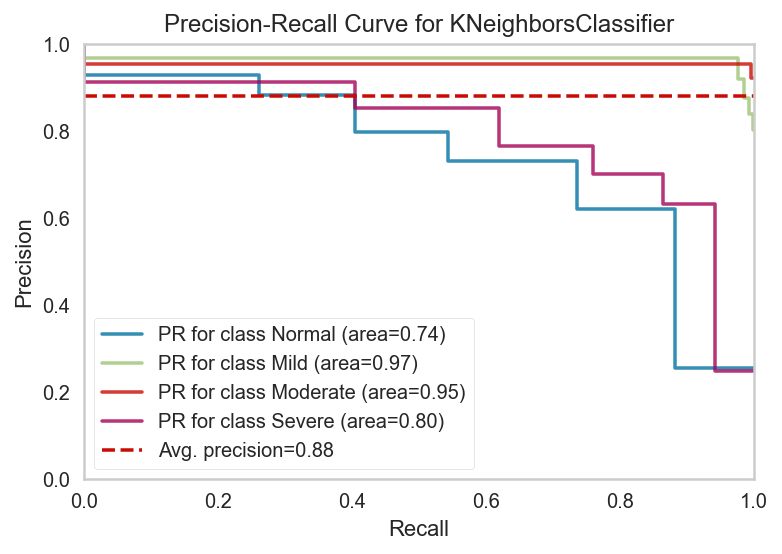

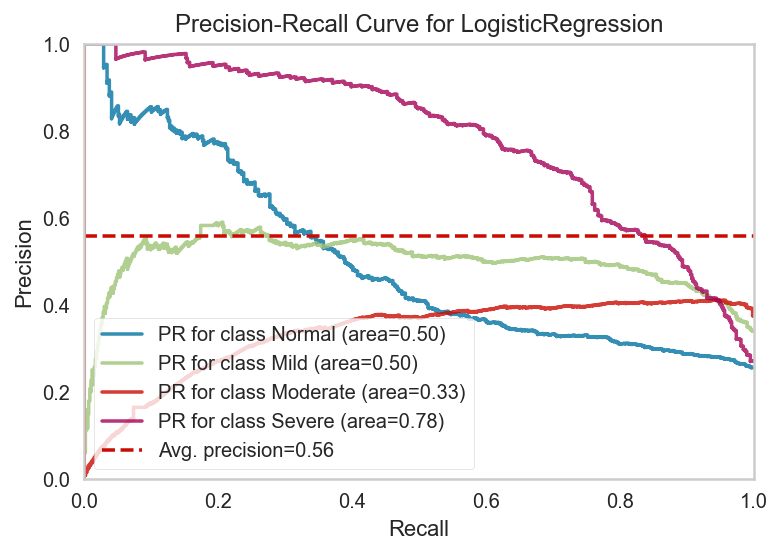

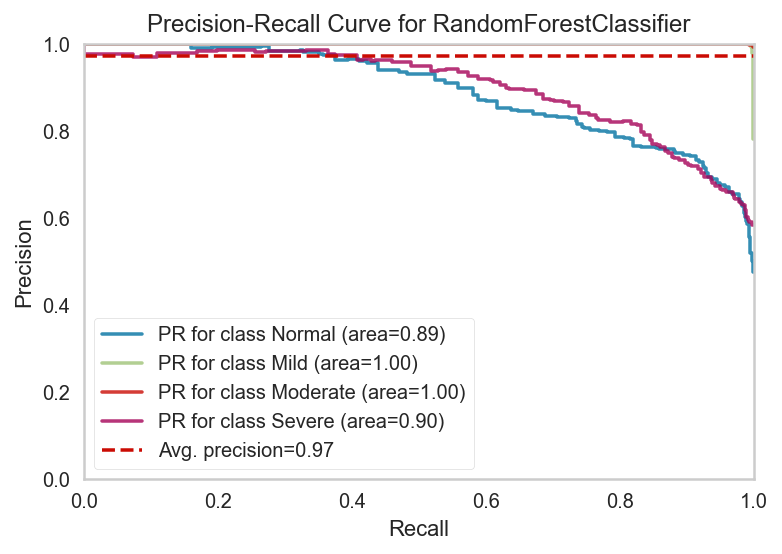

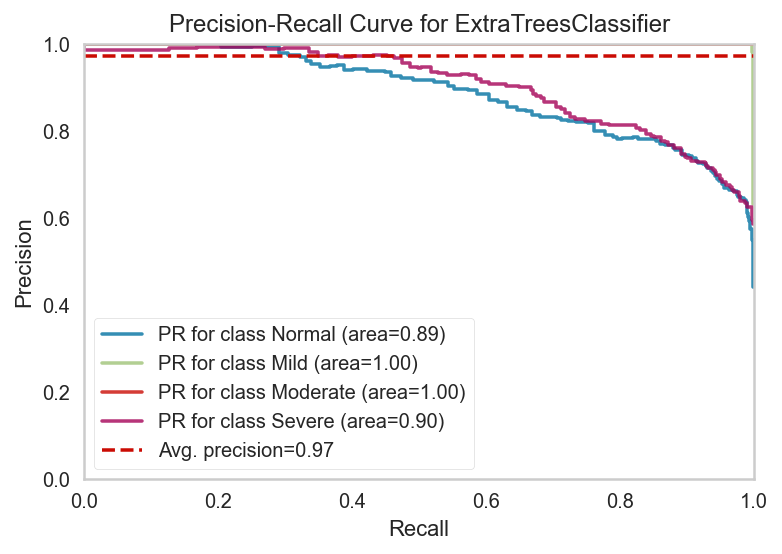

In [144]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [145]:
#Deploy aggregate metrics  
classifier_metrics()

DecisionTreeClassifier(random_state=0)
cohen_kappa_score: 0.816
log_loss: 4.759
zero_one_loss: 0.138
hemming_loss: 0.138
matthews_corrcoef: 0.816

------------------------------------------------------
SVC(random_state=0)
cohen_kappa_score: 0.416
log_loss: 0.000
zero_one_loss: 0.438
hemming_loss: 0.438
matthews_corrcoef: 0.425

------------------------------------------------------
GaussianNB()
cohen_kappa_score: 0.433
log_loss: 1.643
zero_one_loss: 0.424
hemming_loss: 0.424
matthews_corrcoef: 0.441

------------------------------------------------------
KNeighborsClassifier()
cohen_kappa_score: 0.775
log_loss: 1.746
zero_one_loss: 0.169
hemming_loss: 0.169
matthews_corrcoef: 0.779

------------------------------------------------------
LogisticRegression(random_state=0)
cohen_kappa_score: 0.365
log_loss: 1.084
zero_one_loss: 0.477
hemming_loss: 0.477
matthews_corrcoef: 0.368

------------------------------------------------------
RandomForestClassifier(random_state=0)
cohen_kappa_scor

In [146]:
df_base2['confusionmatrix']
df_base2.to_csv('D:\MAJOR PROJECT\datasets\Balanced_data2_performance_metrics.csv')

In [147]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(5208, 12)
(9578, 12)
(11536, 12)


## NEURAL NETWORK

In [148]:
df=pd.read_csv('preprocessed_datset.csv')  
df

BQ  ESS        BMI  Weight  Height       Head  Neck  Waist  Buttock  \
0      0   14  29.065927    88.0   174.0  57.500000  39.0   95.5    106.5   
1      0    8  26.989619    78.0   170.0  57.000000  36.5   90.0    100.0   
2      0   16  23.939481    75.0   177.0  59.000000  39.0   88.0    104.0   
3      0   15  22.129740    67.0   174.0  57.000000  35.0   74.0     94.0   
4      0   15  22.129740    67.0   174.0  57.000000  35.0   74.0     94.0   
...   ..  ...        ...     ...     ...        ...   ...    ...      ...   
5203   1    6  24.005487    63.0   162.0  57.000000  33.0   99.0    101.5   
5204   0   13  29.964328    63.0   145.0  53.000000  35.8  102.0    112.0   
5205   0   13  29.964328    63.0   145.0  53.000000  35.8  102.0    112.0   
5206   0    0  24.654832    60.0   156.0  54.500000  35.0   83.5     99.0   
5207   1   17  20.077748    47.0   153.0  54.799999  30.5   68.0     88.0   

       Age  M  status  
0     20.0  1       0  
1     20.0  1       0  
2     20.0  1       0  
3     20.0  1       0  
4     20.0  1       0  
...    ... ..     ...  
5203  77.0  0       3  
5204  77.0  0       3  
5205  77.0  0       3  
5206  79.0  0       3  
5207  80.0  0       0  

[5208 rows x 12 columns]

In [149]:
x = df.drop("status", axis = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = df["status"]
print(x)

            0         1         2         3         4         5         6   \
0    -0.544805  0.727665  0.471981  0.732869  0.730835  0.493004  0.317320   
1    -0.544805 -0.307861  0.076874  0.150404  0.240260  0.252957 -0.284501   
2    -0.544805  1.072840 -0.503545 -0.024335  1.098766  1.213143  0.317320   
3    -0.544805  0.900252 -0.847926 -0.490308  0.730835  0.252957 -0.645594   
4    -0.544805  0.900252 -0.847926 -0.490308  0.730835  0.252957 -0.645594   
...        ...       ...       ...       ...       ...       ...       ...   
5203  1.835518 -0.653036 -0.490985 -0.723294 -0.740890  0.252957 -1.127051   
5204 -0.544805  0.555077  0.642940 -0.723294 -2.825833 -1.667416 -0.453011   
5205 -0.544805  0.555077  0.642940 -0.723294 -2.825833 -1.667416 -0.453011   
5206 -0.544805 -1.688561 -0.367419 -0.898033 -1.476752 -0.947276 -0.645594   
5207  1.835518  1.245427 -1.238405 -1.655238 -1.844684 -0.803249 -1.728872   

            7         8         9         10  
0     0.322288  

In [150]:
from keras.utils.np_utils import to_categorical
y_cate = to_categorical(y)
y_cate

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cate, test_size=0.2)

In [152]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4166, 11)
(4166, 4)
(1042, 11)
(1042, 4)


In [153]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adadelta,Adagrad

## Adaptive Moment Estimation

In [154]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [155]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
131/131 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.7573
Epoch 2/25
131/131 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.7741
Epoch 3/25
131/131 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7796
Epoch 4/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7820
Epoch 5/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7772
Epoch 6/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7763
Epoch 7/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7717
Epoch 8/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7753
Epoch 9/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.7856
Epoch 10/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7844

In [156]:
model.evaluate(x_test,y_test)

33/33 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7726


[0.5211806893348694, 0.7725527882575989]

In [157]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [158]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([0, 0, 3, 3, 0, 0, 0, 0, 3, 3], dtype=int64)

In [159]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([0, 0, 3, 3, 3, 0, 0, 0, 0, 3], dtype=int64)

In [160]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[496,   0,   0, 113],
       [  6,   0,   0,   1],
       [  3,   0,   0,   0],
       [114,   0,   0, 309]], dtype=int64)

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))


Accuracy: 0.77



In [162]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
p=(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))
print(p)
model1=p



Classification Report

              precision    recall  f1-score   support

      Normal       0.80      0.81      0.81       609
        Mild       0.00      0.00      0.00         7
    Moderate       0.00      0.00      0.00         3
      Severe       0.73      0.73      0.73       423

    accuracy                           0.77      1042
   macro avg       0.38      0.39      0.38      1042
weighted avg       0.76      0.77      0.77      1042



## Stochastic Gradient Descent

In [163]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(SGD(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                768       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [164]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
131/131 [==============================] - 0s 1ms/step - loss: 1.0777 - accuracy: 0.4726
Epoch 2/25
131/131 [==============================] - 0s 1ms/step - loss: 0.7288 - accuracy: 0.7213
Epoch 3/25
131/131 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.7470
Epoch 4/25
131/131 [==============================] - 0s 1ms/step - loss: 0.5427 - accuracy: 0.7547
Epoch 5/25
131/131 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7643
Epoch 6/25
131/131 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7712
Epoch 7/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.7799
Epoch 8/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7756
Epoch 9/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7777
Epoch 10/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7789

In [165]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [166]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 3], dtype=int64)

In [167]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([0, 0, 3, 3, 3, 0, 0, 0, 0, 3], dtype=int64)

In [168]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[534,   0,   0,  75],
       [  6,   0,   0,   1],
       [  3,   0,   0,   0],
       [148,   0,   0, 275]], dtype=int64)

In [169]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))


Accuracy: 0.78



In [170]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
q=(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))
model2=q
print(q)


Classification Report

              precision    recall  f1-score   support

      Normal       0.77      0.88      0.82       609
        Mild       0.00      0.00      0.00         7
    Moderate       0.00      0.00      0.00         3
      Severe       0.78      0.65      0.71       423

    accuracy                           0.78      1042
   macro avg       0.39      0.38      0.38      1042
weighted avg       0.77      0.78      0.77      1042



## AdaDelta

In [171]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(Adadelta(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                768       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [172]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
131/131 [==============================] - 0s 1ms/step - loss: 1.3743 - accuracy: 0.3601
Epoch 2/25
131/131 [==============================] - 0s 1ms/step - loss: 1.3509 - accuracy: 0.4244
Epoch 3/25
131/131 [==============================] - 0s 1ms/step - loss: 1.3287 - accuracy: 0.4772
Epoch 4/25
131/131 [==============================] - 0s 1ms/step - loss: 1.3062 - accuracy: 0.5053
Epoch 5/25
131/131 [==============================] - 0s 1ms/step - loss: 1.2814 - accuracy: 0.5233
Epoch 6/25
131/131 [==============================] - 0s 1ms/step - loss: 1.2523 - accuracy: 0.5374
Epoch 7/25
131/131 [==============================] - 0s 1ms/step - loss: 1.2173 - accuracy: 0.5427
Epoch 8/25
131/131 [==============================] - 0s 1ms/step - loss: 1.1760 - accuracy: 0.5451
Epoch 9/25
131/131 [==============================] - 0s 2ms/step - loss: 1.1285 - accuracy: 0.5458
Epoch 10/25
131/131 [==============================] - 0s 1ms/step - loss: 1.0772 - accuracy: 0.5461

In [173]:
model.evaluate(x_test,y_test)

33/33 [==============================] - 0s 1ms/step - loss: 0.7092 - accuracy: 0.5845


[0.7092231512069702, 0.5844529867172241]

In [174]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [175]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [176]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([0, 0, 3, 3, 3, 0, 0, 0, 0, 3], dtype=int64)

In [177]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[609,   0,   0,   0],
       [  7,   0,   0,   0],
       [  3,   0,   0,   0],
       [423,   0,   0,   0]], dtype=int64)

In [178]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
r=(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))
print(r)
model3=r


Classification Report

              precision    recall  f1-score   support

      Normal       0.58      1.00      0.74       609
        Mild       0.00      0.00      0.00         7
    Moderate       0.00      0.00      0.00         3
      Severe       0.00      0.00      0.00       423

    accuracy                           0.58      1042
   macro avg       0.15      0.25      0.18      1042
weighted avg       0.34      0.58      0.43      1042



## Adaptive Gradient Descent

In [179]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(Adagrad(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                768       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [180]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
131/131 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.6567
Epoch 2/25
131/131 [==============================] - 0s 1ms/step - loss: 0.5493 - accuracy: 0.7609
Epoch 3/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4981 - accuracy: 0.7681
Epoch 4/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7724
Epoch 5/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7787
Epoch 6/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7792
Epoch 7/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7804
Epoch 8/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7796
Epoch 9/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.7811
Epoch 10/25
131/131 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7861

In [181]:
model.evaluate(x_test,y_test)

33/33 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7668


[0.48757073283195496, 0.7667946219444275]

In [182]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [183]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([0, 0, 3, 3, 0, 0, 0, 0, 3, 3], dtype=int64)

In [184]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([0, 0, 3, 3, 3, 0, 0, 0, 0, 3], dtype=int64)

In [185]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[478,   0,   0, 131],
       [  6,   0,   0,   1],
       [  3,   0,   0,   0],
       [102,   0,   0, 321]], dtype=int64)

In [186]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
s=(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))
print(s)
model4=s


Classification Report

              precision    recall  f1-score   support

      Normal       0.81      0.78      0.80       609
        Mild       0.00      0.00      0.00         7
    Moderate       0.00      0.00      0.00         3
      Severe       0.71      0.76      0.73       423

    accuracy                           0.77      1042
   macro avg       0.38      0.39      0.38      1042
weighted avg       0.76      0.77      0.76      1042



## Case -1 Balanced Dataset

In [187]:
d=pd.read_csv("D:\MAJOR PROJECT\datasets\sampled_dataset.csv",index_col=[0])  
d

BQ  ESS       BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0      0   14  29.06593    88.0   174.0  57.5  39.0   96.0    106.0  20.0  1   
1      0    8  26.98962    78.0   170.0  57.0  36.0   90.0    100.0  20.0  1   
2      0   16  23.93948    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3      0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4      0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
...   ..  ...       ...     ...     ...   ...   ...    ...      ...   ... ..   
9573   0    9  28.92147    77.0   163.0  54.1  32.0   95.0    115.0  61.0  0   
9574   0    9  25.09116    72.0   170.0  57.8  36.0   84.0     97.0  33.0  1   
9575   0    9  24.29521    71.0   172.0  57.3  36.0   86.0     98.0  39.0  1   
9576   0   13  28.56268    83.0   171.0  58.8  42.0   91.0    101.0  36.0  1   
9577   0    4  27.93178    73.0   162.0  54.0  34.0   93.0    110.0  57.0  0   

      status  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
9573       2  
9574       2  
9575       2  
9576       2  
9577       2  

[9578 rows x 12 columns]

In [188]:
x = d.drop("status", axis = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = d["status"]
print(x)

           0         1         2         3         4         5         6   \
0    -0.42357  0.872561  0.712847  1.049246  0.823755  0.660248  0.588954   
1    -0.42357 -0.284812  0.238534  0.355581  0.333720  0.406078 -0.232431   
2    -0.42357  1.258352 -0.458241  0.147482  1.191280  1.422759  0.588954   
3    -0.42357  1.065456 -0.871658 -0.407450  0.823755  0.406078 -0.506227   
4    -0.42357  1.065456 -0.871658 -0.407450  0.823755  0.406078 -0.506227   
...       ...       ...       ...       ...       ...       ...       ...   
9573 -0.42357 -0.091916  0.679846  0.286215 -0.523840 -1.068110 -1.327612   
9574 -0.42357 -0.091916 -0.195151 -0.060618  0.333720  0.812751 -0.232431   
9575 -0.42357 -0.091916 -0.376978 -0.129984  0.578737  0.558580 -0.232431   
9576 -0.42357  0.679665  0.597884  0.702414  0.456229  1.321091  1.410339   
9577 -0.42357 -1.056394  0.453761  0.008749 -0.646349 -1.118944 -0.780022   

            7         8         9         10  
0     0.641629  0.746187 -1.

In [189]:
from keras.utils.np_utils import to_categorical
y_cate = to_categorical(y)
y_cate

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [190]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cate, test_size=0.2)

In [191]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7662, 11)
(7662, 4)
(1916, 11)
(1916, 4)


## Adam

In [192]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                768       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [193]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
240/240 [==============================] - 1s 2ms/step - loss: 0.7525 - accuracy: 0.6772
Epoch 2/25
240/240 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7965
Epoch 3/25
240/240 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8282
Epoch 4/25
240/240 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8346
Epoch 5/25
240/240 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8474
Epoch 6/25
240/240 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8536
Epoch 7/25
240/240 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8546
Epoch 8/25
240/240 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.8632
Epoch 9/25
240/240 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8636
Epoch 10/25
240/240 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8705

In [194]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8481


[0.3299691081047058, 0.8481211066246033]

In [195]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [196]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([3, 2, 3, 1, 2, 3, 2, 2, 3, 2], dtype=int64)

In [197]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([3, 2, 3, 0, 2, 0, 2, 2, 0, 2], dtype=int64)

In [198]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[398,  18,   2, 168],
       [  1, 447,   0,   0],
       [ 13,   0, 415,   0],
       [ 86,   1,   2, 365]], dtype=int64)

In [199]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))


Classification Report

              precision    recall  f1-score   support

      Normal       0.80      0.68      0.73       586
        Mild       0.96      1.00      0.98       448
    Moderate       0.99      0.97      0.98       428
      Severe       0.68      0.80      0.74       454

    accuracy                           0.85      1916
   macro avg       0.86      0.86      0.86      1916
weighted avg       0.85      0.85      0.85      1916



## SGD

In [200]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(SGD(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                768       
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [201]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
240/240 [==============================] - 1s 1ms/step - loss: 1.3393 - accuracy: 0.3609
Epoch 2/25
240/240 [==============================] - 0s 1ms/step - loss: 1.2501 - accuracy: 0.4593
Epoch 3/25
240/240 [==============================] - 0s 1ms/step - loss: 1.1606 - accuracy: 0.5076
Epoch 4/25
240/240 [==============================] - 0s 1ms/step - loss: 1.0862 - accuracy: 0.5486
Epoch 5/25
240/240 [==============================] - 0s 1ms/step - loss: 1.0140 - accuracy: 0.5925
Epoch 6/25
240/240 [==============================] - 0s 1ms/step - loss: 0.9327 - accuracy: 0.6389
Epoch 7/25
240/240 [==============================] - 0s 1ms/step - loss: 0.8456 - accuracy: 0.6731
Epoch 8/25
240/240 [==============================] - 0s 1ms/step - loss: 0.7611 - accuracy: 0.7082
Epoch 9/25
240/240 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.7301
Epoch 10/25
240/240 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.7545

In [202]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8643


[0.32701611518859863, 0.8643006086349487]

In [203]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [204]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([3, 2, 3, 1, 2, 3, 2, 2, 3, 1], dtype=int64)

In [205]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([3, 2, 3, 0, 2, 0, 2, 2, 0, 2], dtype=int64)

In [206]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[449,  31,   8,  98],
       [  3, 443,   0,   2],
       [  0,   2, 426,   0],
       [105,   4,   7, 338]], dtype=int64)

In [207]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))


Classification Report

              precision    recall  f1-score   support

      Normal       0.81      0.77      0.79       586
        Mild       0.92      0.99      0.95       448
    Moderate       0.97      1.00      0.98       428
      Severe       0.77      0.74      0.76       454

    accuracy                           0.86      1916
   macro avg       0.87      0.87      0.87      1916
weighted avg       0.86      0.86      0.86      1916



## AdaDelta

In [208]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(Adadelta(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                768       
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 16)                528       
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [209]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
240/240 [==============================] - 1s 1ms/step - loss: 1.3721 - accuracy: 0.2914
Epoch 2/25
240/240 [==============================] - 0s 1ms/step - loss: 1.3608 - accuracy: 0.2984
Epoch 3/25
240/240 [==============================] - 0s 1ms/step - loss: 1.3506 - accuracy: 0.3037
Epoch 4/25
240/240 [==============================] - 0s 1ms/step - loss: 1.3407 - accuracy: 0.3074
Epoch 5/25
240/240 [==============================] - 0s 1ms/step - loss: 1.3296 - accuracy: 0.3147
Epoch 6/25
240/240 [==============================] - 0s 1ms/step - loss: 1.3162 - accuracy: 0.3275
Epoch 7/25
240/240 [==============================] - 0s 1ms/step - loss: 1.3012 - accuracy: 0.3481
Epoch 8/25
240/240 [==============================] - 0s 1ms/step - loss: 1.2854 - accuracy: 0.3743
Epoch 9/25
240/240 [==============================] - 0s 1ms/step - loss: 1.2693 - accuracy: 0.3975
Epoch 10/25
240/240 [==============================] - 0s 1ms/step - loss: 1.2533 - accuracy: 0.4143

In [210]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 1ms/step - loss: 1.0804 - accuracy: 0.5277


[1.080377221107483, 0.5276618003845215]

In [211]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [212]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([3, 0, 3, 0, 0, 1, 3, 3, 3, 0], dtype=int64)

In [213]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([3, 2, 3, 0, 2, 0, 2, 2, 0, 2], dtype=int64)

In [214]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[414,  67,   2, 103],
       [155, 252,   5,  36],
       [233, 119,  20,  56],
       [111,  16,   2, 325]], dtype=int64)

In [215]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))


Classification Report

              precision    recall  f1-score   support

      Normal       0.45      0.71      0.55       586
        Mild       0.56      0.56      0.56       448
    Moderate       0.69      0.05      0.09       428
      Severe       0.62      0.72      0.67       454

    accuracy                           0.53      1916
   macro avg       0.58      0.51      0.47      1916
weighted avg       0.57      0.53      0.48      1916



## Adaptive Gradient Descent

In [216]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(Adagrad(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                768       
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dense_39 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [217]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
240/240 [==============================] - 1s 1ms/step - loss: 1.1879 - accuracy: 0.4175
Epoch 2/25
240/240 [==============================] - 0s 1ms/step - loss: 0.9720 - accuracy: 0.6125
Epoch 3/25
240/240 [==============================] - 0s 1ms/step - loss: 0.8165 - accuracy: 0.7006
Epoch 4/25
240/240 [==============================] - 0s 1ms/step - loss: 0.7102 - accuracy: 0.7403
Epoch 5/25
240/240 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.7622
Epoch 6/25
240/240 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.7760
Epoch 7/25
240/240 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.7904
Epoch 8/25
240/240 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.7991
Epoch 9/25
240/240 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.8080
Epoch 10/25
240/240 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8148

In [218]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8434


[0.3682177662849426, 0.8434237837791443]

In [219]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [220]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([3, 2, 3, 1, 2, 0, 2, 2, 3, 2], dtype=int64)

In [221]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([3, 2, 3, 0, 2, 0, 2, 2, 0, 2], dtype=int64)

In [222]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[416,  29,  24, 117],
       [  6, 441,   0,   1],
       [  0,   1, 427,   0],
       [ 97,   7,  18, 332]], dtype=int64)

In [223]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))


Classification Report

              precision    recall  f1-score   support

      Normal       0.80      0.71      0.75       586
        Mild       0.92      0.98      0.95       448
    Moderate       0.91      1.00      0.95       428
      Severe       0.74      0.73      0.73       454

    accuracy                           0.84      1916
   macro avg       0.84      0.86      0.85      1916
weighted avg       0.84      0.84      0.84      1916



## CASE -2 Balanced Dataset

In [224]:
d=pd.read_csv("D:\MAJOR PROJECT\datasets\sampled1_dataset.csv",index_col=[0])  
d

BQ  ESS       BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0       0   14  29.06593    88.0   174.0  57.5  39.0   96.0    106.0  20.0  1   
1       0    8  26.98962    78.0   170.0  57.0  36.0   90.0    100.0  20.0  1   
2       0   16  23.93948    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3       0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4       0   15  22.12974    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
...    ..  ...       ...     ...     ...   ...   ...    ...      ...   ... ..   
11531   0   16  29.48650    99.0   183.0  57.1  42.0  111.0    109.0  56.0  1   
11532   0   11  25.07382    66.0   162.0  55.1  36.0   91.0     96.0  61.0  1   
11533   0    6  28.66613    96.0   183.0  58.0  39.0   99.0    108.0  36.0  1   
11534   0   15  28.73175    85.0   172.0  60.2  40.0  103.0    105.0  63.0  1   
11535   0    1  45.26355   140.0   176.0  61.0  46.0  146.0    132.0  43.0  1   

       status  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
11531       3  
11532       3  
11533       3  
11534       3  
11535       3  

[11536 rows x 12 columns]

In [225]:
x = d.drop("status", axis = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = d["status"]
print(x)

             0         1         2         3         4         5         6   \
0     -0.393095  0.892756  0.703343  1.038525  0.814755  0.645764  0.575191   
1     -0.393095 -0.283156  0.222992  0.333952  0.314695  0.386621 -0.257356   
2     -0.393095  1.284726 -0.482654  0.122580  1.189801  1.423193  0.575191   
3     -0.393095  1.088741 -0.901335 -0.441079  0.814755  0.386621 -0.534872   
4     -0.393095  1.088741 -0.901335 -0.441079  0.814755  0.386621 -0.534872   
...         ...       ...       ...       ...       ...       ...       ...   
11531 -0.393095  1.284726  0.800642  1.813556  1.939892  0.438450  1.407738   
11532 -0.393095  0.304800 -0.220226 -0.511536 -0.685427 -0.598123 -0.257356   
11533 -0.393095 -0.675126  0.610850  1.602184  1.939892  0.904907  0.575191   
11534 -0.393095  1.088741  0.626031  0.827153  0.564725  2.045136  0.852706   
11535 -0.393095 -1.655052  4.450642  4.702307  1.064786  2.459765  2.517800   

             7         8         9         10  
0  

In [226]:
from keras.utils.np_utils import to_categorical
y_cate = to_categorical(y)
y_cate

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cate, test_size=0.2)

In [228]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9228, 11)
(9228, 4)
(2308, 11)
(2308, 4)


In [229]:
x_train

array([[-0.39309492,  0.30479984, -2.00146565, ..., -1.24934587,
        -0.00485294,  0.72395546],
       [-0.39309492,  0.10881461,  1.07476442, ...,  1.10512406,
        -0.66445256,  0.72395546],
       [-0.39309492, -0.08717061, -0.20288203, ..., -0.25799011,
        -1.32405218,  0.72395546],
       ...,
       [-0.39309492,  0.89275551, -0.11927029, ..., -0.25799011,
         0.24249692,  0.72395546],
       [-0.39309492,  0.89275551, -0.236652  , ...,  0.23768777,
        -1.32405218,  0.72395546],
       [-0.39309492, -1.65505241, -0.97601476, ..., -0.75366799,
        -0.82935246,  0.72395546]])

In [230]:
y_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

## Adam

In [231]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                768       
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 8)                 136       
                                                                 
 dense_44 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [232]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
289/289 [==============================] - 1s 1ms/step - loss: 0.6479 - accuracy: 0.7345
Epoch 2/25
289/289 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8376
Epoch 3/25
289/289 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8522
Epoch 4/25
289/289 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8562
Epoch 5/25
289/289 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8658
Epoch 6/25
289/289 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8674
Epoch 7/25
289/289 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.8749
Epoch 8/25
289/289 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8701
Epoch 9/25
289/289 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.8775
Epoch 10/25
289/289 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.8765

In [233]:
model.evaluate(x_test,y_test)

73/73 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8756


[0.2912445664405823, 0.8756499290466309]

In [234]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [235]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([1, 2, 1, 2, 1, 2, 3, 3, 2, 0], dtype=int64)

In [236]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([1, 0, 1, 2, 1, 2, 3, 0, 2, 0], dtype=int64)

In [237]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[367,  15,   5, 169],
       [  3, 577,   1,   0],
       [  0,   0, 581,   0],
       [ 90,   2,   2, 496]], dtype=int64)

In [238]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))


Classification Report

              precision    recall  f1-score   support

      Normal       0.80      0.66      0.72       556
        Mild       0.97      0.99      0.98       581
    Moderate       0.99      1.00      0.99       581
      Severe       0.75      0.84      0.79       590

    accuracy                           0.88      2308
   macro avg       0.88      0.87      0.87      2308
weighted avg       0.88      0.88      0.87      2308



## SGD

In [239]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(SGD(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                768       
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 16)                528       
                                                                 
 dense_48 (Dense)            (None, 8)                 136       
                                                                 
 dense_49 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [240]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
289/289 [==============================] - 1s 1ms/step - loss: 1.2919 - accuracy: 0.4053
Epoch 2/25
289/289 [==============================] - 0s 1ms/step - loss: 1.1092 - accuracy: 0.5305
Epoch 3/25
289/289 [==============================] - 0s 1ms/step - loss: 0.9767 - accuracy: 0.6319
Epoch 4/25
289/289 [==============================] - 0s 1ms/step - loss: 0.8547 - accuracy: 0.6774
Epoch 5/25
289/289 [==============================] - 0s 1ms/step - loss: 0.7368 - accuracy: 0.7187
Epoch 6/25
289/289 [==============================] - 0s 998us/step - loss: 0.6392 - accuracy: 0.7612
Epoch 7/25
289/289 [==============================] - 0s 1ms/step - loss: 0.5645 - accuracy: 0.7858
Epoch 8/25
289/289 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.8075
Epoch 9/25
289/289 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.8249
Epoch 10/25
289/289 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.83

In [241]:
model.evaluate(x_test,y_test)

73/73 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8679


[0.2958236634731293, 0.8678509593009949]

In [242]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [243]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([1, 0, 1, 2, 1, 2, 3, 0, 2, 0], dtype=int64)

In [244]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([1, 0, 1, 2, 1, 2, 3, 0, 2, 0], dtype=int64)

In [245]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[407,  32,  10, 107],
       [  1, 580,   0,   0],
       [  0,   0, 581,   0],
       [130,  15,  10, 435]], dtype=int64)

In [246]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))


Classification Report

              precision    recall  f1-score   support

      Normal       0.76      0.73      0.74       556
        Mild       0.93      1.00      0.96       581
    Moderate       0.97      1.00      0.98       581
      Severe       0.80      0.74      0.77       590

    accuracy                           0.87      2308
   macro avg       0.86      0.87      0.86      2308
weighted avg       0.86      0.87      0.86      2308



## AdaDelta

In [247]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(Adadelta(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                768       
                                                                 
 dense_51 (Dense)            (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 16)                528       
                                                                 
 dense_53 (Dense)            (None, 8)                 136       
                                                                 
 dense_54 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [248]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
289/289 [==============================] - 1s 1ms/step - loss: 1.3736 - accuracy: 0.3085
Epoch 2/25
289/289 [==============================] - 0s 1ms/step - loss: 1.3552 - accuracy: 0.3558
Epoch 3/25
289/289 [==============================] - 0s 1ms/step - loss: 1.3348 - accuracy: 0.3959
Epoch 4/25
289/289 [==============================] - 0s 1ms/step - loss: 1.3147 - accuracy: 0.4261
Epoch 5/25
289/289 [==============================] - 0s 1ms/step - loss: 1.2946 - accuracy: 0.4541
Epoch 6/25
289/289 [==============================] - 0s 1ms/step - loss: 1.2742 - accuracy: 0.4744
Epoch 7/25
289/289 [==============================] - 0s 1ms/step - loss: 1.2542 - accuracy: 0.4912
Epoch 8/25
289/289 [==============================] - 0s 1ms/step - loss: 1.2344 - accuracy: 0.5005
Epoch 9/25
289/289 [==============================] - 0s 1ms/step - loss: 1.2156 - accuracy: 0.5069
Epoch 10/25
289/289 [==============================] - 0s 1ms/step - loss: 1.1979 - accuracy: 0.5121

In [249]:
model.evaluate(x_test,y_test)

73/73 [==============================] - 0s 1ms/step - loss: 1.0157 - accuracy: 0.5585


[1.015650987625122, 0.5584921836853027]

In [250]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [251]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([1, 0, 1, 2, 1, 0, 0, 3, 3, 2], dtype=int64)

In [252]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([1, 0, 1, 2, 1, 2, 3, 0, 2, 0], dtype=int64)

In [253]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[278, 156,   8, 114],
       [ 41, 502,   0,  38],
       [293, 130,  98,  60],
       [126,  41,  12, 411]], dtype=int64)

In [254]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))


Classification Report

              precision    recall  f1-score   support

      Normal       0.38      0.50      0.43       556
        Mild       0.61      0.86      0.71       581
    Moderate       0.83      0.17      0.28       581
      Severe       0.66      0.70      0.68       590

    accuracy                           0.56      2308
   macro avg       0.62      0.56      0.52      2308
weighted avg       0.62      0.56      0.53      2308



## Adapative Gradient Descent

In [255]:
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
#model.add(Dense(2, activation = "softmax"))
model.compile(Adagrad(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 64)                768       
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dense_57 (Dense)            (None, 16)                528       
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 4)                 36        
                                                                 
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [256]:
%%time
model.fit(x_train, y_train,epochs=25)

Epoch 1/25
289/289 [==============================] - 1s 1ms/step - loss: 1.2802 - accuracy: 0.4012
Epoch 2/25
289/289 [==============================] - 0s 1ms/step - loss: 1.1164 - accuracy: 0.5130
Epoch 3/25
289/289 [==============================] - 0s 1ms/step - loss: 0.9665 - accuracy: 0.5426
Epoch 4/25
289/289 [==============================] - 0s 1ms/step - loss: 0.8418 - accuracy: 0.6362
Epoch 5/25
289/289 [==============================] - 0s 1ms/step - loss: 0.7465 - accuracy: 0.7291
Epoch 6/25
289/289 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.7618
Epoch 7/25
289/289 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.7866
Epoch 8/25
289/289 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.8078
Epoch 9/25
289/289 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.8209
Epoch 10/25
289/289 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.8299

In [257]:
model.evaluate(x_test,y_test)

73/73 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8653


[0.32484790682792664, 0.8652513027191162]

In [258]:
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

In [259]:
y_pred = np.argmax(predictions, axis=-1)
y_pred[:10]

array([1, 2, 1, 2, 1, 2, 0, 0, 2, 2], dtype=int64)

In [260]:
y_true=np.argmax(y_test, axis=-1)
y_true[:10]

array([1, 0, 1, 2, 1, 2, 3, 0, 2, 0], dtype=int64)

In [261]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[415,  23,  17, 101],
       [  3, 575,   0,   3],
       [  3,   0, 578,   0],
       [142,   8,  11, 429]], dtype=int64)

In [262]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=["Normal", "Mild","Moderate","Severe"]))


Classification Report

              precision    recall  f1-score   support

      Normal       0.74      0.75      0.74       556
        Mild       0.95      0.99      0.97       581
    Moderate       0.95      0.99      0.97       581
      Severe       0.80      0.73      0.76       590

    accuracy                           0.87      2308
   macro avg       0.86      0.86      0.86      2308
weighted avg       0.86      0.87      0.86      2308

